In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from math import log
#Вариант 21.
Nd  = 1e14                  # см^-3 - концентрация доноров
Na  = 0                     # см^-3 - концентрация акцепторв
tox = 100*1e-9*100          # см - толщина диэлектрика
Фм  = 4.25                  # эВ - работа выхода металла 
Фsi = 4.3                   # эВ - работа выхода металла 
kb  = 8.625*1e-5            # эВ/К - константа Больцмана
q   = 1.6*1e-19             # Кл - заряд электрона
Eg0 = 1.165                 # эВ - ширина зз при 0К
ni  = 1.45*1e10             # см^-3 - собственная концентрация 
Es  = 12                    # - диэлектрическая проницаемость кремния
E0  = 8.85*1e-14            # - диэлектрическая проницаемость вакуума
Eox = 3.75                  # - диэлектрическая проницаемость оксида кремния    
mun = 1500                  # см^2/В*с - подвижность электронов
mup = 45                    # см^2/В*с - подвижность дырок
mn  = 1.08                  # - масса e
mp  = 0.56                  # - масса e
T   = np.arange(800,300,-1) # - массив температур
a   = 7*1e-4                # К^-1 - температурная константа
b   = 1108                  # К - температурная константа
X   = 4.12                  # сродство к электрону
VBO = 4.4                   # эВ - Смещение валентной зоны SiO2/Si
CBO = 3.5                   # эВ - Смещение зоны проводимости SiO2/Si


C:\Users\Home\AppData\Local\Temp\ipykernel_19876\275892050.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_mas[0] = fsolve(chargefunction, Ei(T[0]) , T[0], xtol=1e-10)
C:\Users\Home\AppData\Local\Temp\ipykernel_19876\275892050.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  F_mas[i] = fsolve(chargefunction, F_mas[i - 1] , T[i],xtol=1e-10)


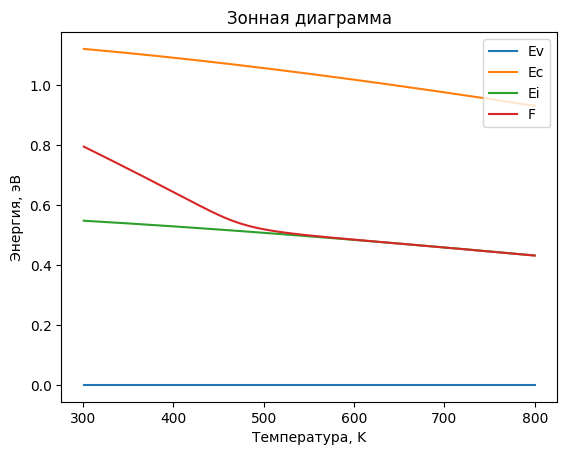

In [2]:
# 1 Рассчитать положение уровня Ферми для комнатной температуры втермодинамическом равновесии. 
#Для проверки расчета постройте зависимость положения ключевых уровней зонной диаграммы от температуры: уровня
#Ферми, уровень Ферми для собственного полупроводника, положения потолка валентной зоны и дна зоны проводимости. 
#Проверить результат, рассчитав сумму всех зарядов и сравнив полученную функцию с нулём. Построить зависимость 
#концентраций дырок, электронов и собственную концентрацию от температуры. 
#Рекомендуется за ноль энергии выбрать положение потолка валентной зоны.

def Eg(T):
    return Eg0 - (a / (b + T) * T ** 2)

def Nc(T):
    return (2.5 * (10 ** 19)) * ((mn) ** (3 / 2)) * ((T / 300) ** (3 / 2))

def Nv(T):
    return (2.5 * (10 ** 19)) * ((mp) ** (3 / 2)) * ((T / 300) ** (3 / 2))

def phit(T):
    return kb*T
    
def ni(T):
    return (Nv(T) * Nc(T) * np.exp(-Eg(T) / phit(T))) ** (1 / 2)

def Ei(T):
    return (Eg(T) / 2) + (3 / 4) * phit(T) * -0.65

def n0(F, T):
    return  Nc(T) * np.exp((-Eg(T) + F) / phit(T))

def p0(F, T):
    return  Nv(T) * np.exp((-F) / phit(T))

def chargefunction(F, T):
    return p0(F,T) - n0(F,T) + Nd - Na
   
F_mas = np.zeros(500)
F_mas[0] = fsolve(chargefunction, Ei(T[0]) , T[0], xtol=1e-10)
for i in range (1, 500, 1):
    F_mas[i] = fsolve(chargefunction, F_mas[i - 1] , T[i],xtol=1e-10)

    
Ev_mas = np.zeros(500)
Ec_mas = np.zeros(500)
Ei_mas = np.zeros(500)

for i in range(0, 500):
    Ei_mas[i] = Ei(T[i])
    Ec_mas[i] = Eg(T[i])

fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Температура, K") 
ax.set_ylabel("Энергия, эВ") 
ax.set_title('Зонная диаграмма') 
ax.plot(T,Ev_mas,T,Ec_mas,T,Ei_mas,T,F_mas);
ax.legend(labels = ("Ev", "Ec", "Ei", "F"), loc="best");


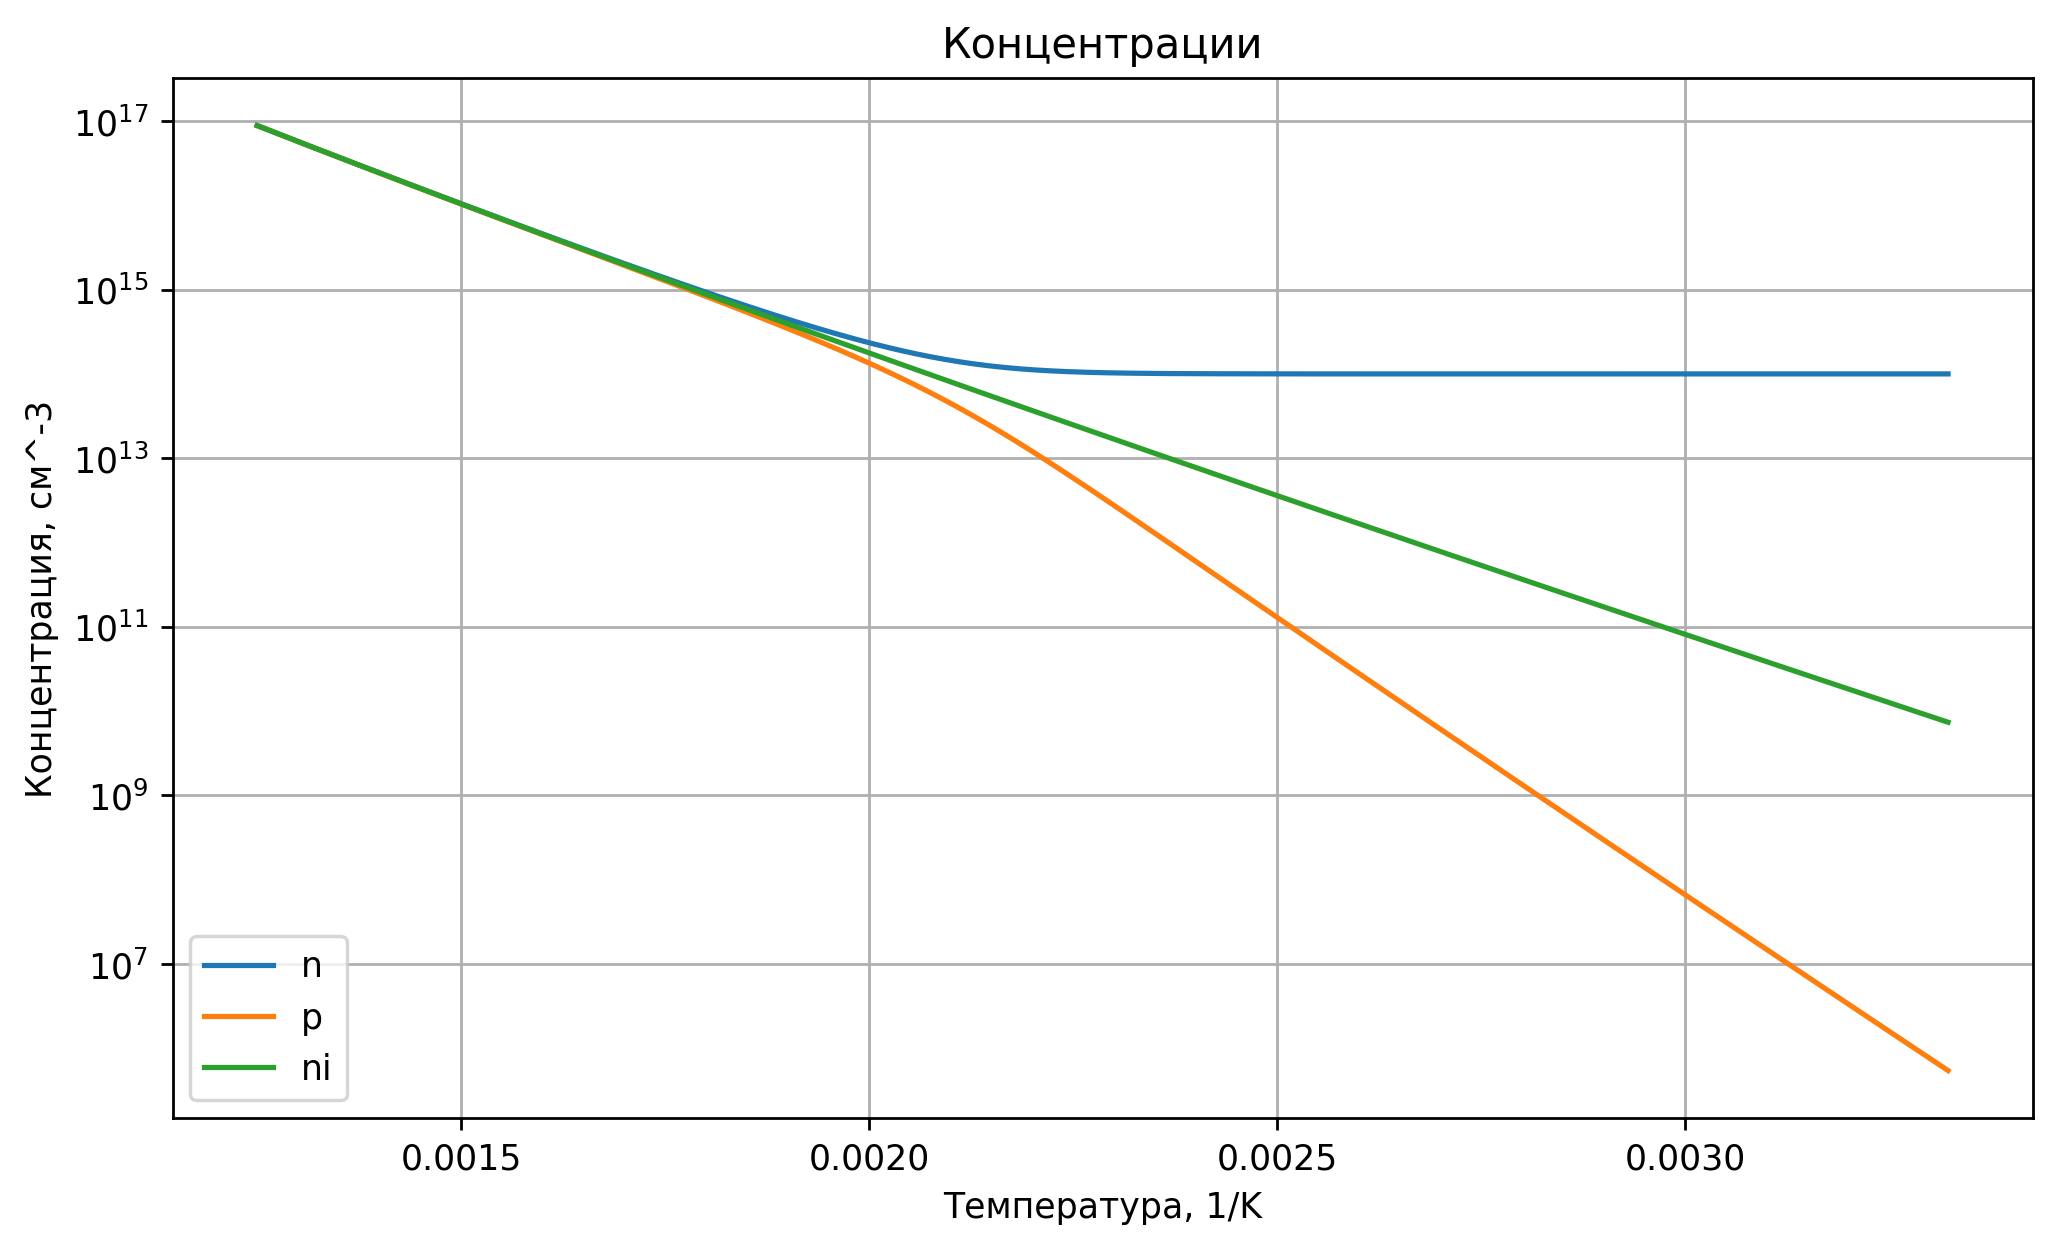

In [3]:
#Концентрации
n_mas = np.zeros(500)
p_mas = np.zeros(500)
ni_mas = np.zeros(500)

for i in range(0, 500):
    n_mas[i] = n0(F_mas[i], T[i])
    p_mas[i] = p0(F_mas[i], T[i])
    ni_mas[i] = ni(T[i])

fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Температура, 1/K") 
ax.set_ylabel("Концентрация, см^-3") 
ax.set_title('Концентрации')
ax.set_yscale("log")
ax.plot(1/T, n_mas, 1/T, p_mas, 1/T, ni_mas);
ax.legend(labels = ("n", "p", "ni"), loc="lower left");

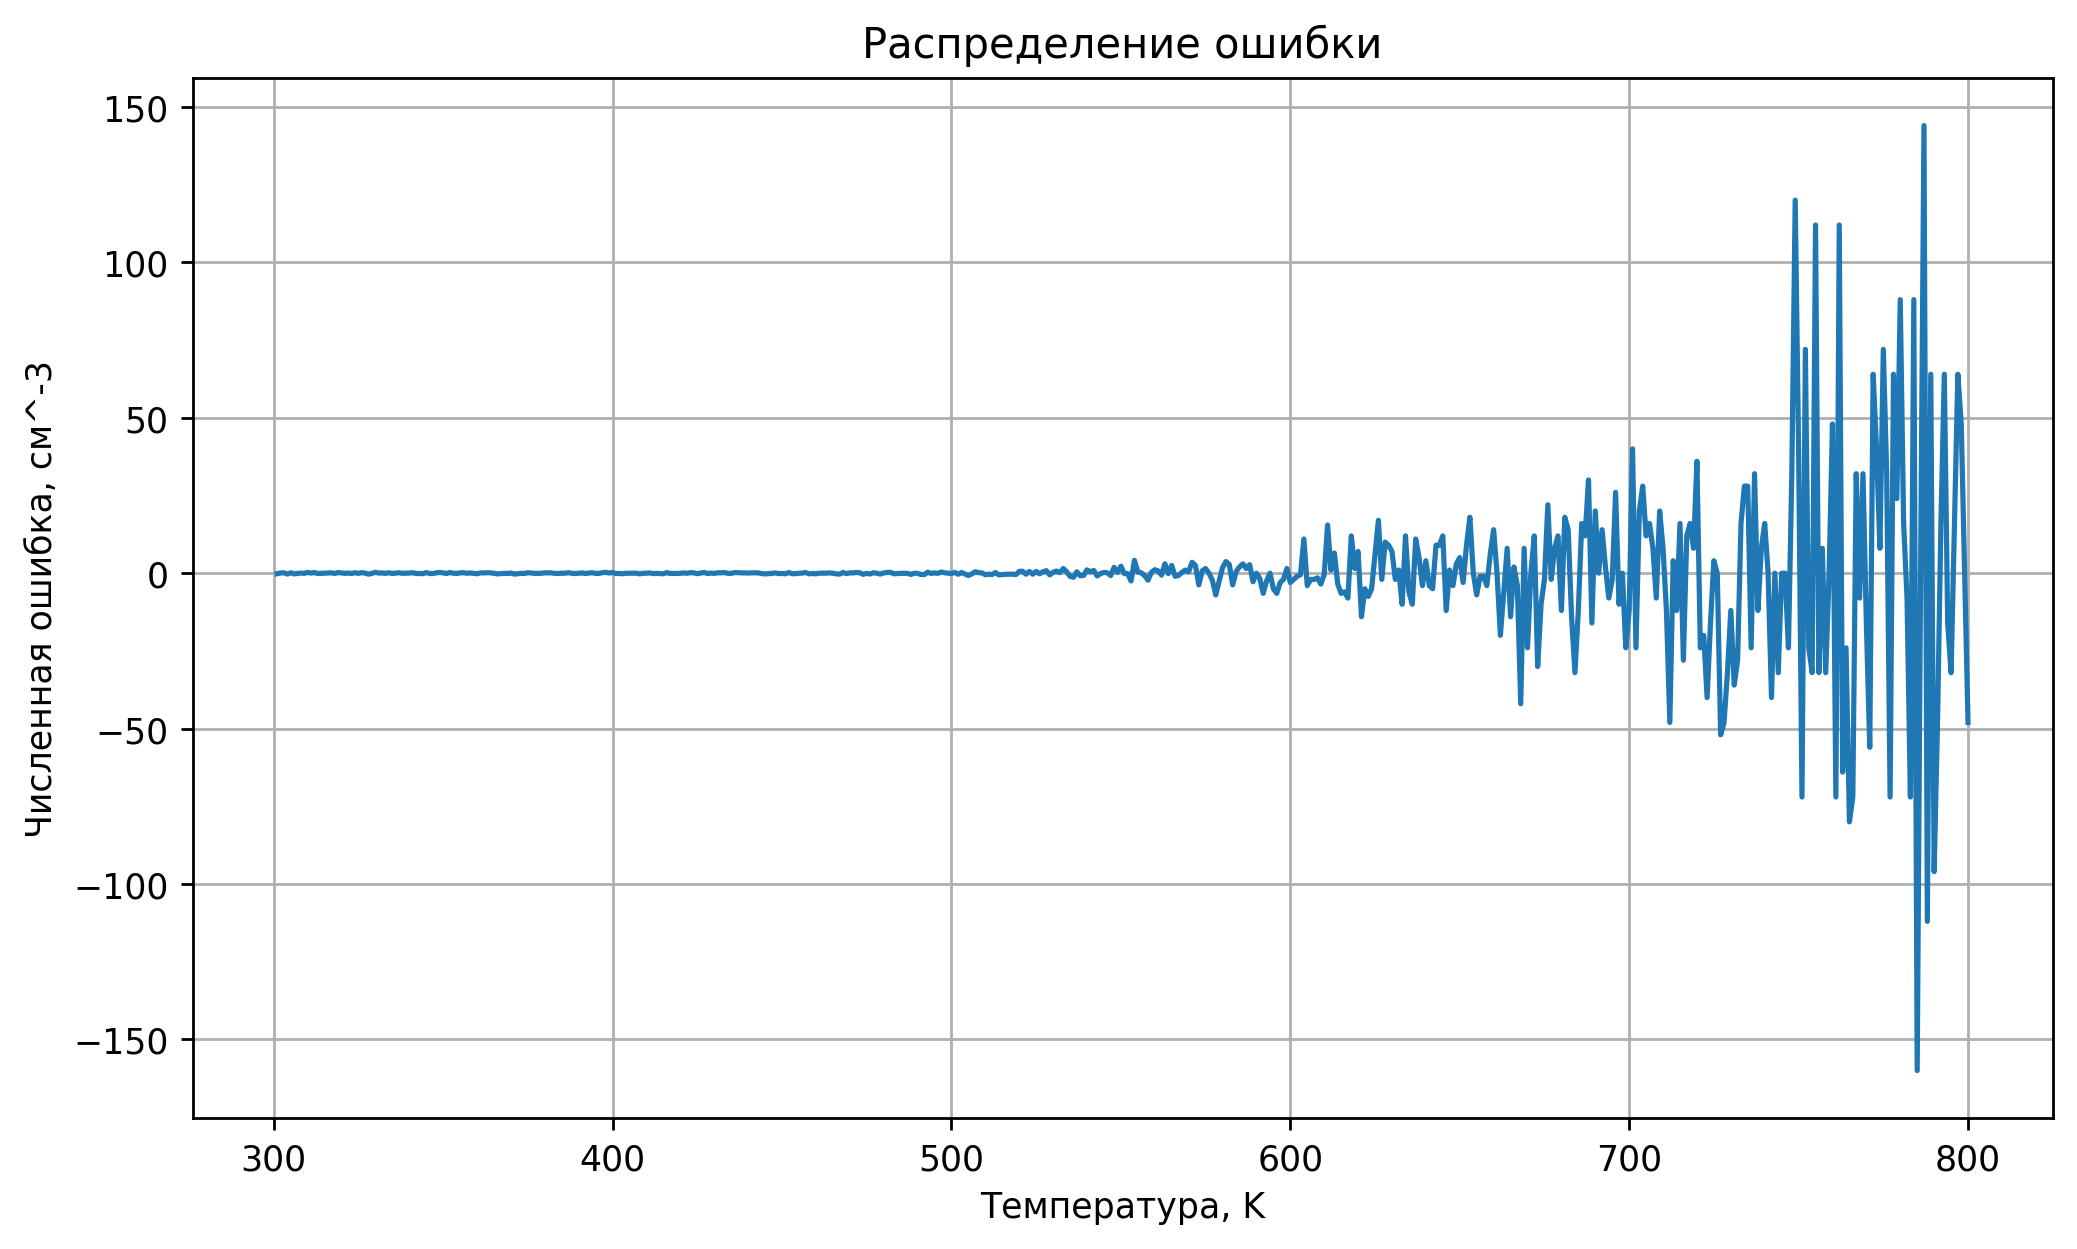

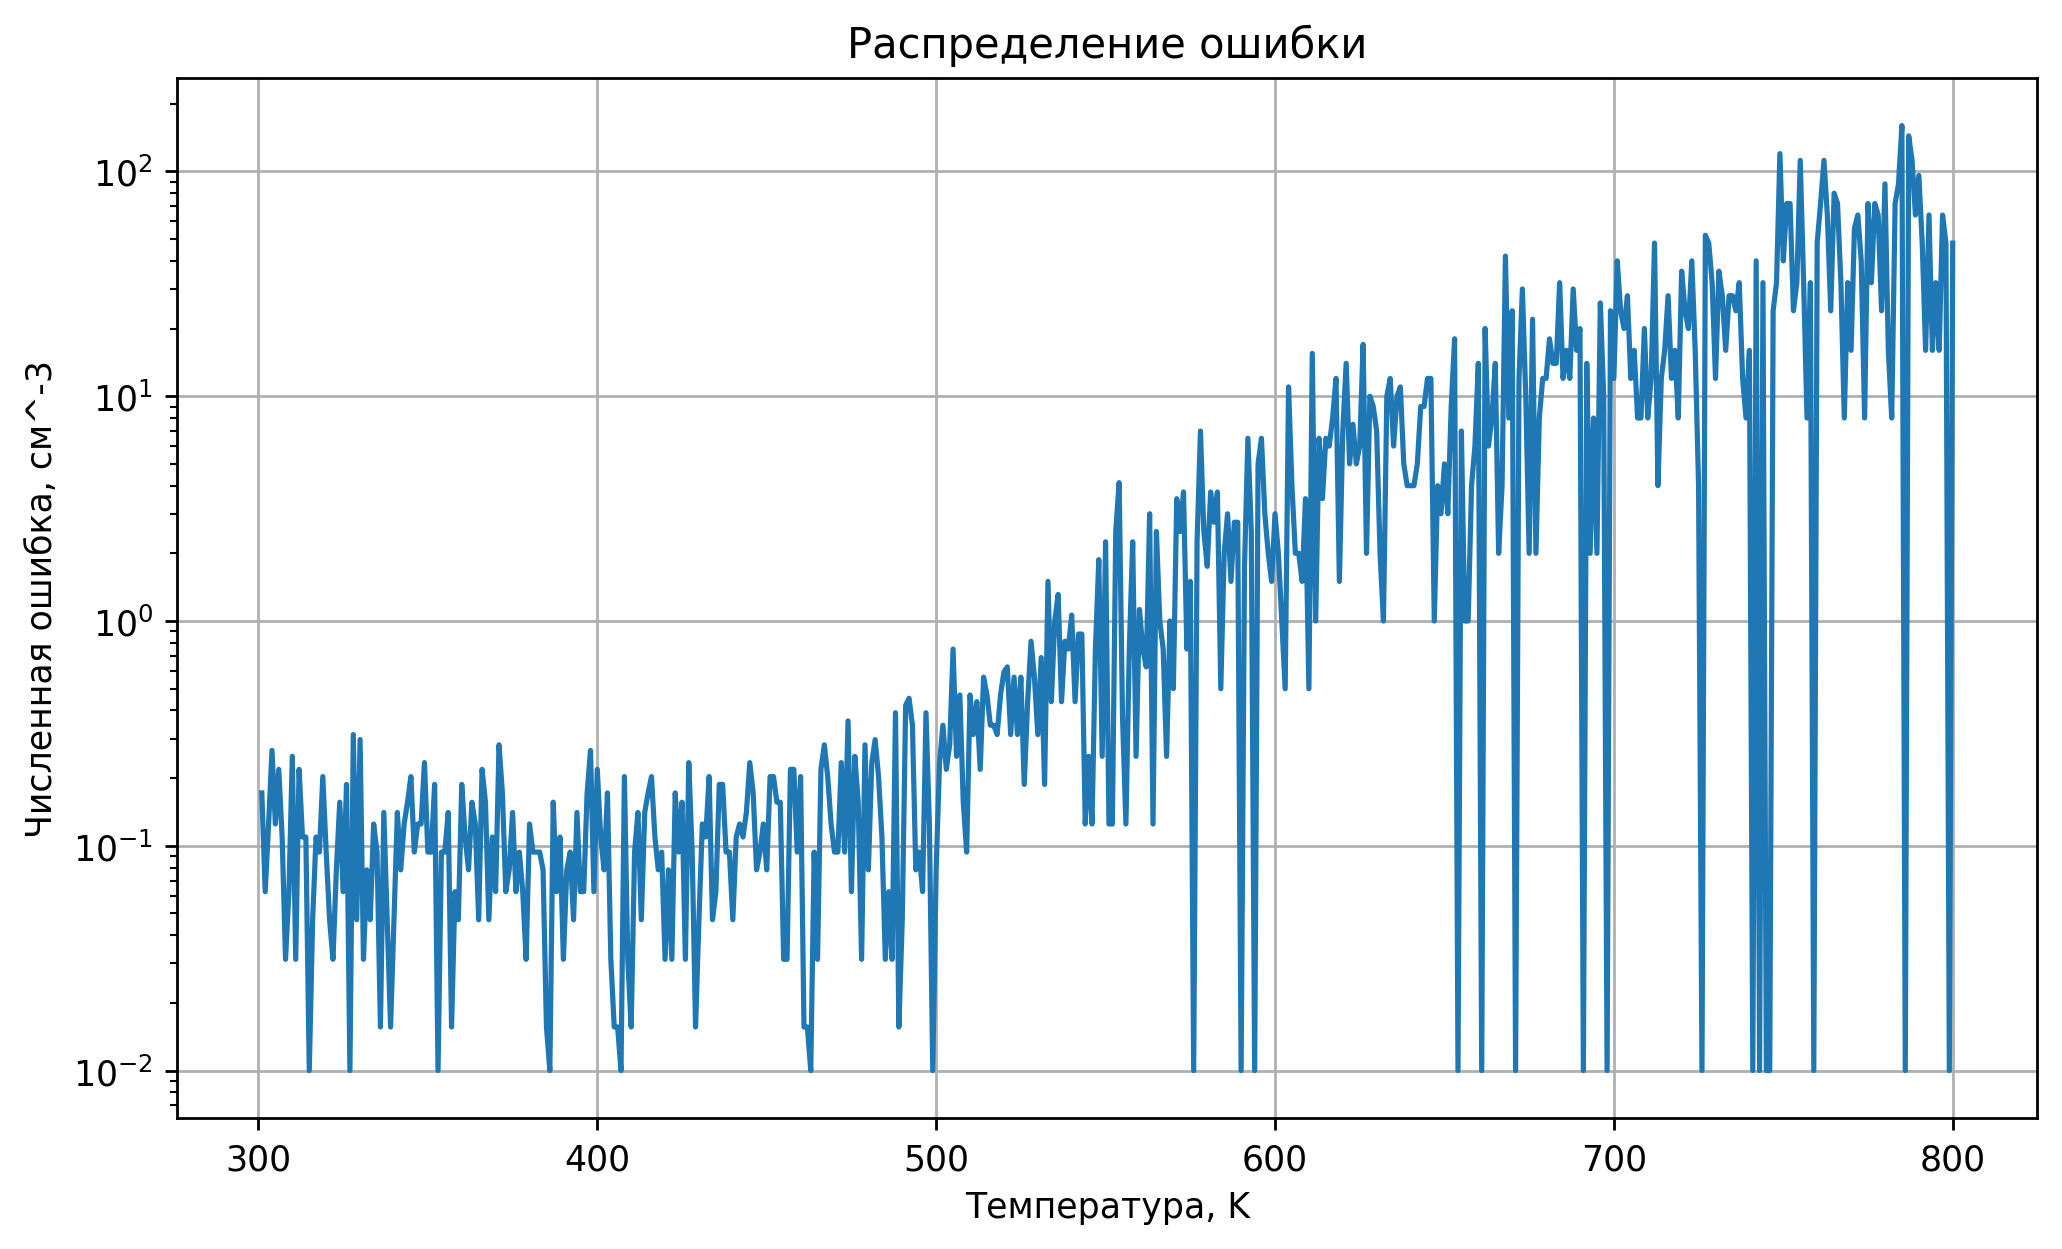

In [4]:
#распределение ошибки
error_graph = np.zeros(500)
for i in range(0, 500):
    error_graph[i] = (p_mas[i]-n_mas[i]+Nd-Na)
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Температура, K") 
ax.set_ylabel("Численная ошибка, см^-3") 
ax.set_title('Распределение ошибки')
ax.plot(T, error_graph);
error_graph = np.zeros(500)
for i in range(0, 500):
    error_graph[i] = np.abs(p_mas[i]-n_mas[i]+Nd-Na)
    error_graph[error_graph==0]=1e-2
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Температура, K") 
ax.set_ylabel("Численная ошибка, см^-3") 
ax.set_title('Распределение ошибки')
ax.set_yscale("log")
ax.plot(T, error_graph);


In [5]:
# 2 Сравнить полученную величину уровня Ферми с аналитическим расчетом на основании предположения, 
# что концентрация основных носителей определяется исключительно концентрацией примеси.
Ef_300 =  Eg(T[499]) - kb*T[499] * np.log(Nc(T[499]) / Nd)
phif   =  np.abs((kb * T[499] * log(ni(T[499]) / Nd)) - (Eg(T[499]) / 2))
EF_300 = '%.3f'%Ef_300
F_3001 = '%.3f'%F_mas[499]
pHif   = '%.3f'%phif
print(f"Численно: {F_3001}","В")
print(f"Приближение концентрации основных носителей: {EF_300}","В")
print(f"Приближение концентрации основных носителей через фиf: {pHif}","В")


Численно: 0.794 В
Приближение концентрации основных носителей: 0.794 В
Приближение концентрации основных носителей через фиf: 0.807 В


In [6]:
# 3 Вычислить работу выхода полупроводника.
Ф  = Eg(T[499]) - F_mas[499] + X # рабата выхода
Ф1 = '%.3f'%Ф
print("Работа выхода полупроводника:",Ф1,"эВ")

Работа выхода полупроводника: 4.446 эВ


In [7]:
# 4 Вычислить напряжение плоских зон.
Vfb = Фм - Ф
VFB = '%.3f'%Vfb
print("напряжение плоских зон:",VFB,"В")


напряжение плоских зон: -0.196 В


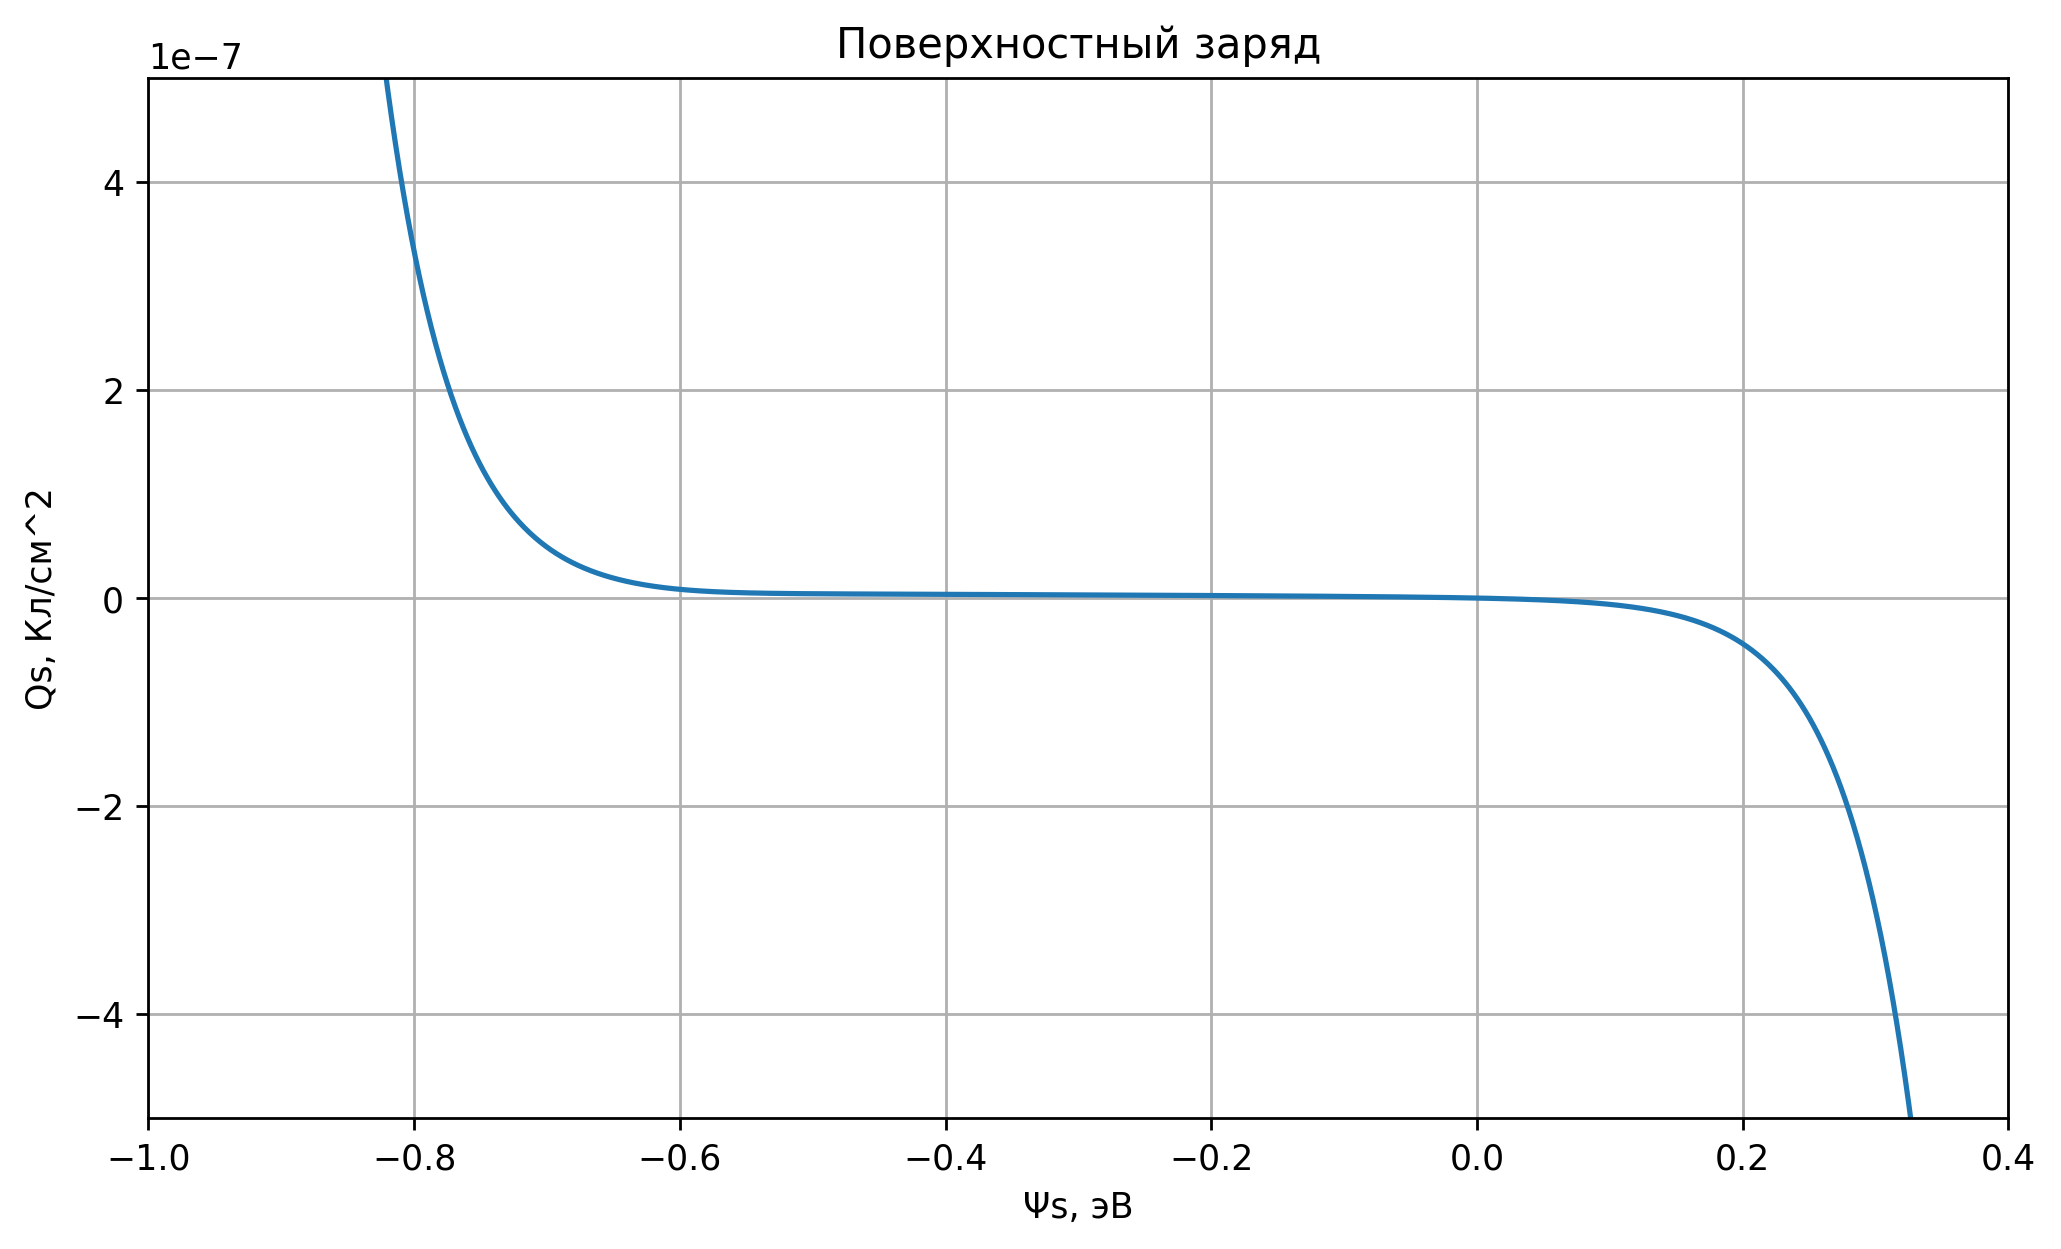

In [8]:
# 5Построить зависимость поверхностного заряда Qs от поверхностного
#потенциала ψs по аналитической формуле.

def f(fis):
    return (0.026*p_mas[499]*(np.exp(-(fis / 0.026)) - 1)) + (0.026*n_mas[499]*(np.exp(fis/0.026) - 1)) + (fis * (-Nd))

def Qs(fis):
    return (-np.sign(fis) * (2 * q * Es*E0* f(fis)) ** (1 / 2))
def n1(fis):
    return n_mas[499]*np.exp(fis/0.026)
def p1(fis):
    return p_mas[499]*np.exp(-fis/0.026)
def Ess(fis):
    return np.sign(fis)*np.sqrt(2*q*f(fis)/(E0*Es))

fis_mas = np.arange(-1,1,0.001 )

Qs_mas = np.zeros(2000)

for i in range(0,2000):
    Qs_mas[i] = Qs(fis_mas[i])
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Ψs, эВ") 
ax.set_ylabel("Qs, Кл/см^2") 
ax.set_title('Поверхностный заряд')
ax.plot(fis_mas, Qs_mas);
ax.set_xlim(-1,0.4)
ax.set_ylim(-5*1e-7,5*1e-7);

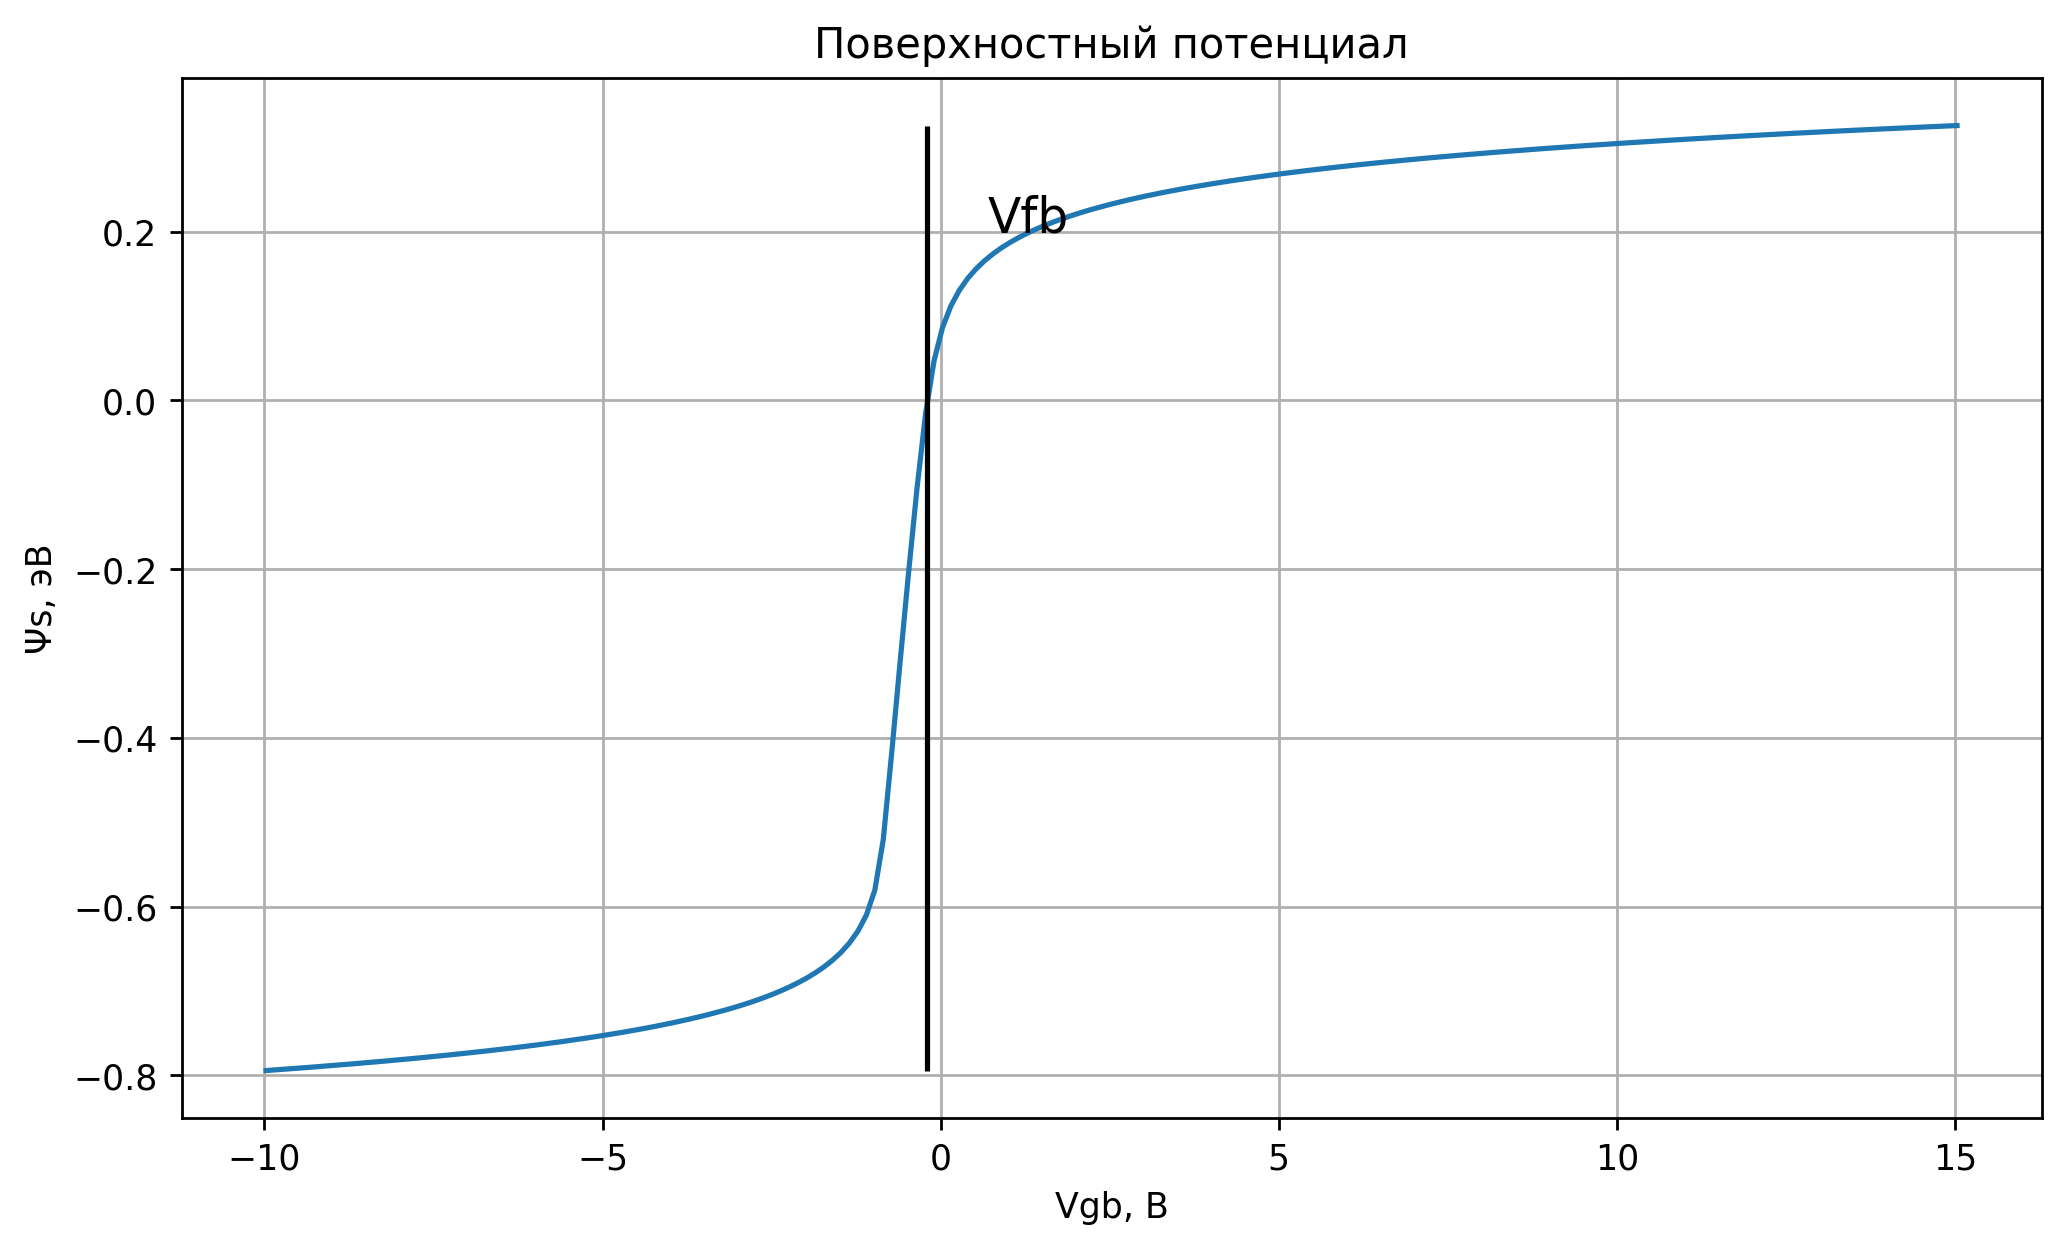

In [9]:
#6 Построить зависимость поверхностного потенциала ψs от напряжения затвор—подложка Vgb, используя численные методы.
from scipy.optimize import bisect
Coxp=Eox*E0/tox
def SPE(fis,Vgb):
    return Vfb+fis-Qs(fis)/Coxp-Vgb
Vgb=np.linspace(SPE(Ev_mas[499]-F_mas[499],0),SPE(Ec_mas[499]-F_mas[499],0),201)
fis=np.array([])
a=Ev_mas[499]-F_mas[499]-0.2
b=Ec_mas[499]-F_mas[499]+0.2
for value in Vgb:
    fis= np.hstack((fis,bisect(f=SPE,a=a,b=b,args = value, xtol=1e-12)))   
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Ψs, эВ") 
ax.set_title('Поверхностный потенциал')
ax.plot(Vgb, fis);
ax.vlines(Vfb, fis.min(), fis.max(),color = 'black')
plt.text(0.7, 0.2, "Vfb", fontsize=14);

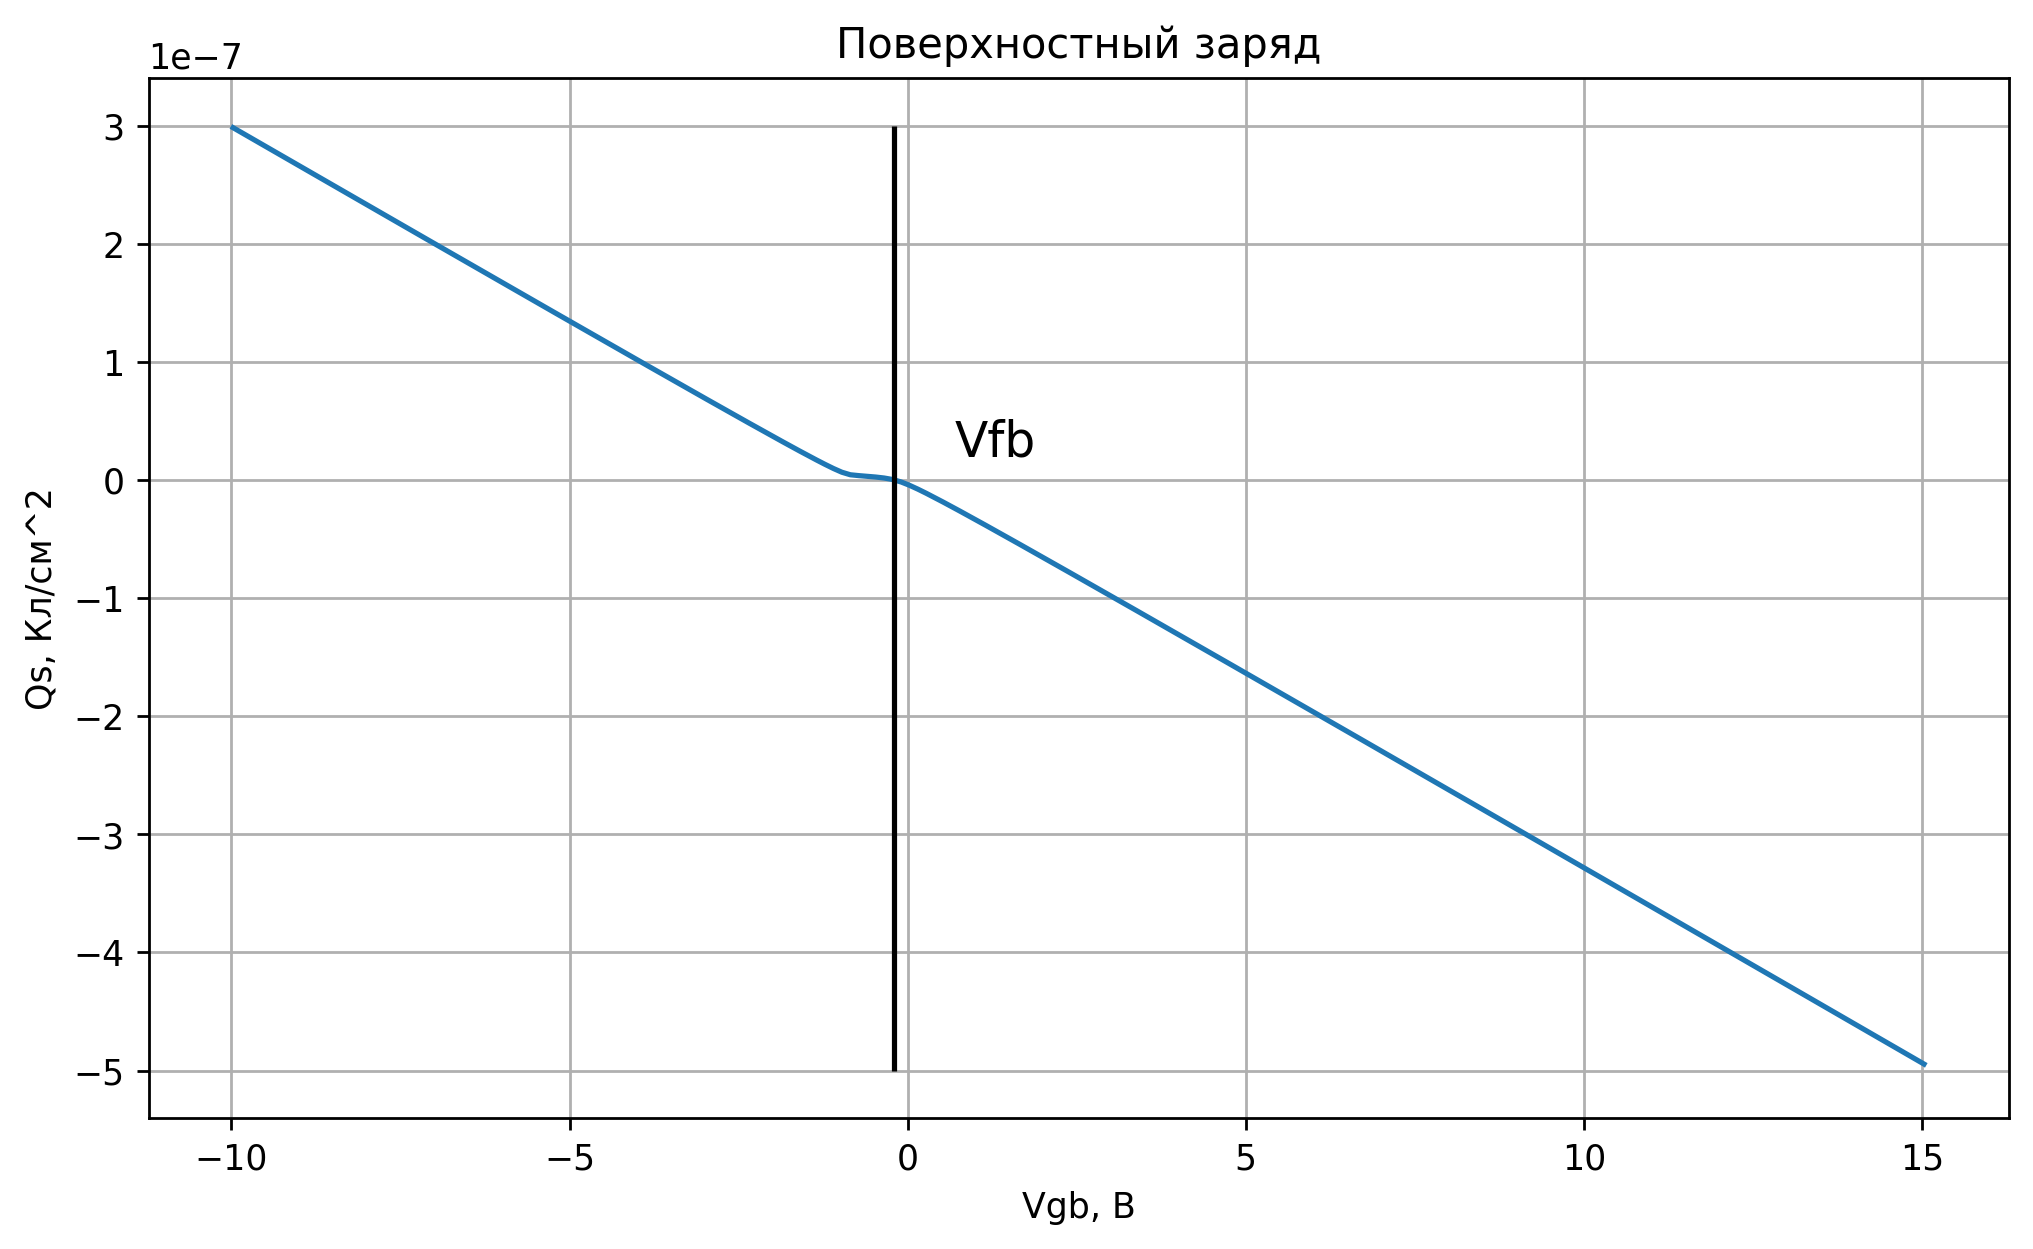

In [10]:
#7 Построить зависимость поверхностного заряда Qs от напряжения затвор —подложка Vgb по аналитической формуле.
Vgb=np.linspace(SPE(Ev_mas[499]-F_mas[499],0),SPE(Ec_mas[499]-F_mas[499],0),201)
fis=np.array([])
a=Ev_mas[499]-F_mas[499]-0.2
b=Ec_mas[499]-F_mas[499]+0.2
for value in Vgb:
    fis= np.hstack((fis,bisect(f=SPE,a=a,b=b,args = value, xtol=1e-12))) 
Qs_mas1 = np.zeros(201)
for i in range(0,201):
    Qs_mas1[i] = Qs(fis[i])
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Qs, Кл/см^2") 
ax.set_title('Поверхностный заряд')
ax.plot(Vgb, Qs_mas1)
ax.vlines(Vfb, -5*1e-7, 3*1e-7,color = 'black');
plt.text(0.7, 0.2*1e-7, "Vfb", fontsize=14);

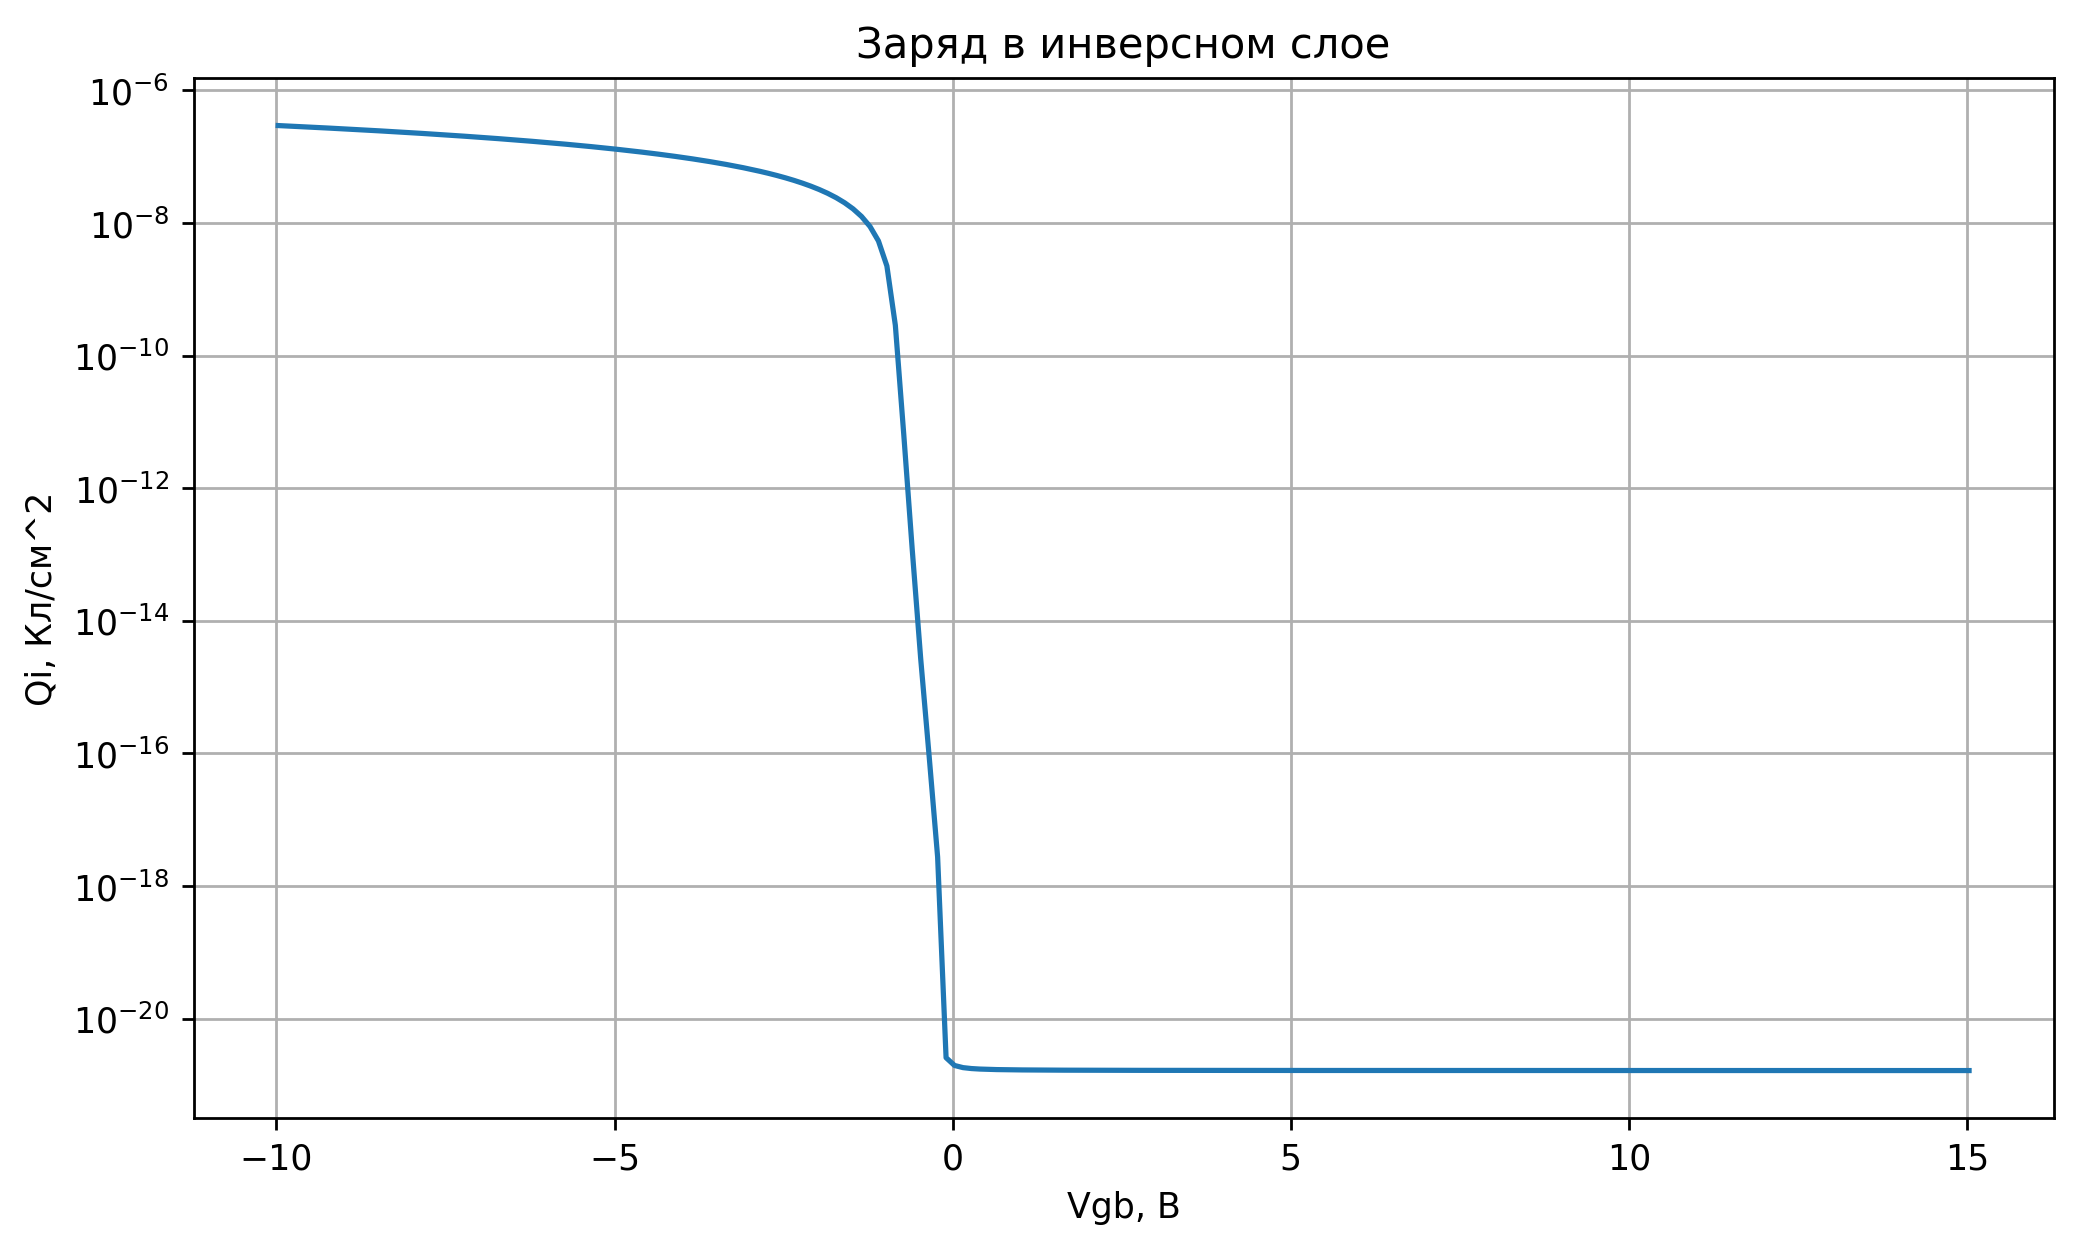

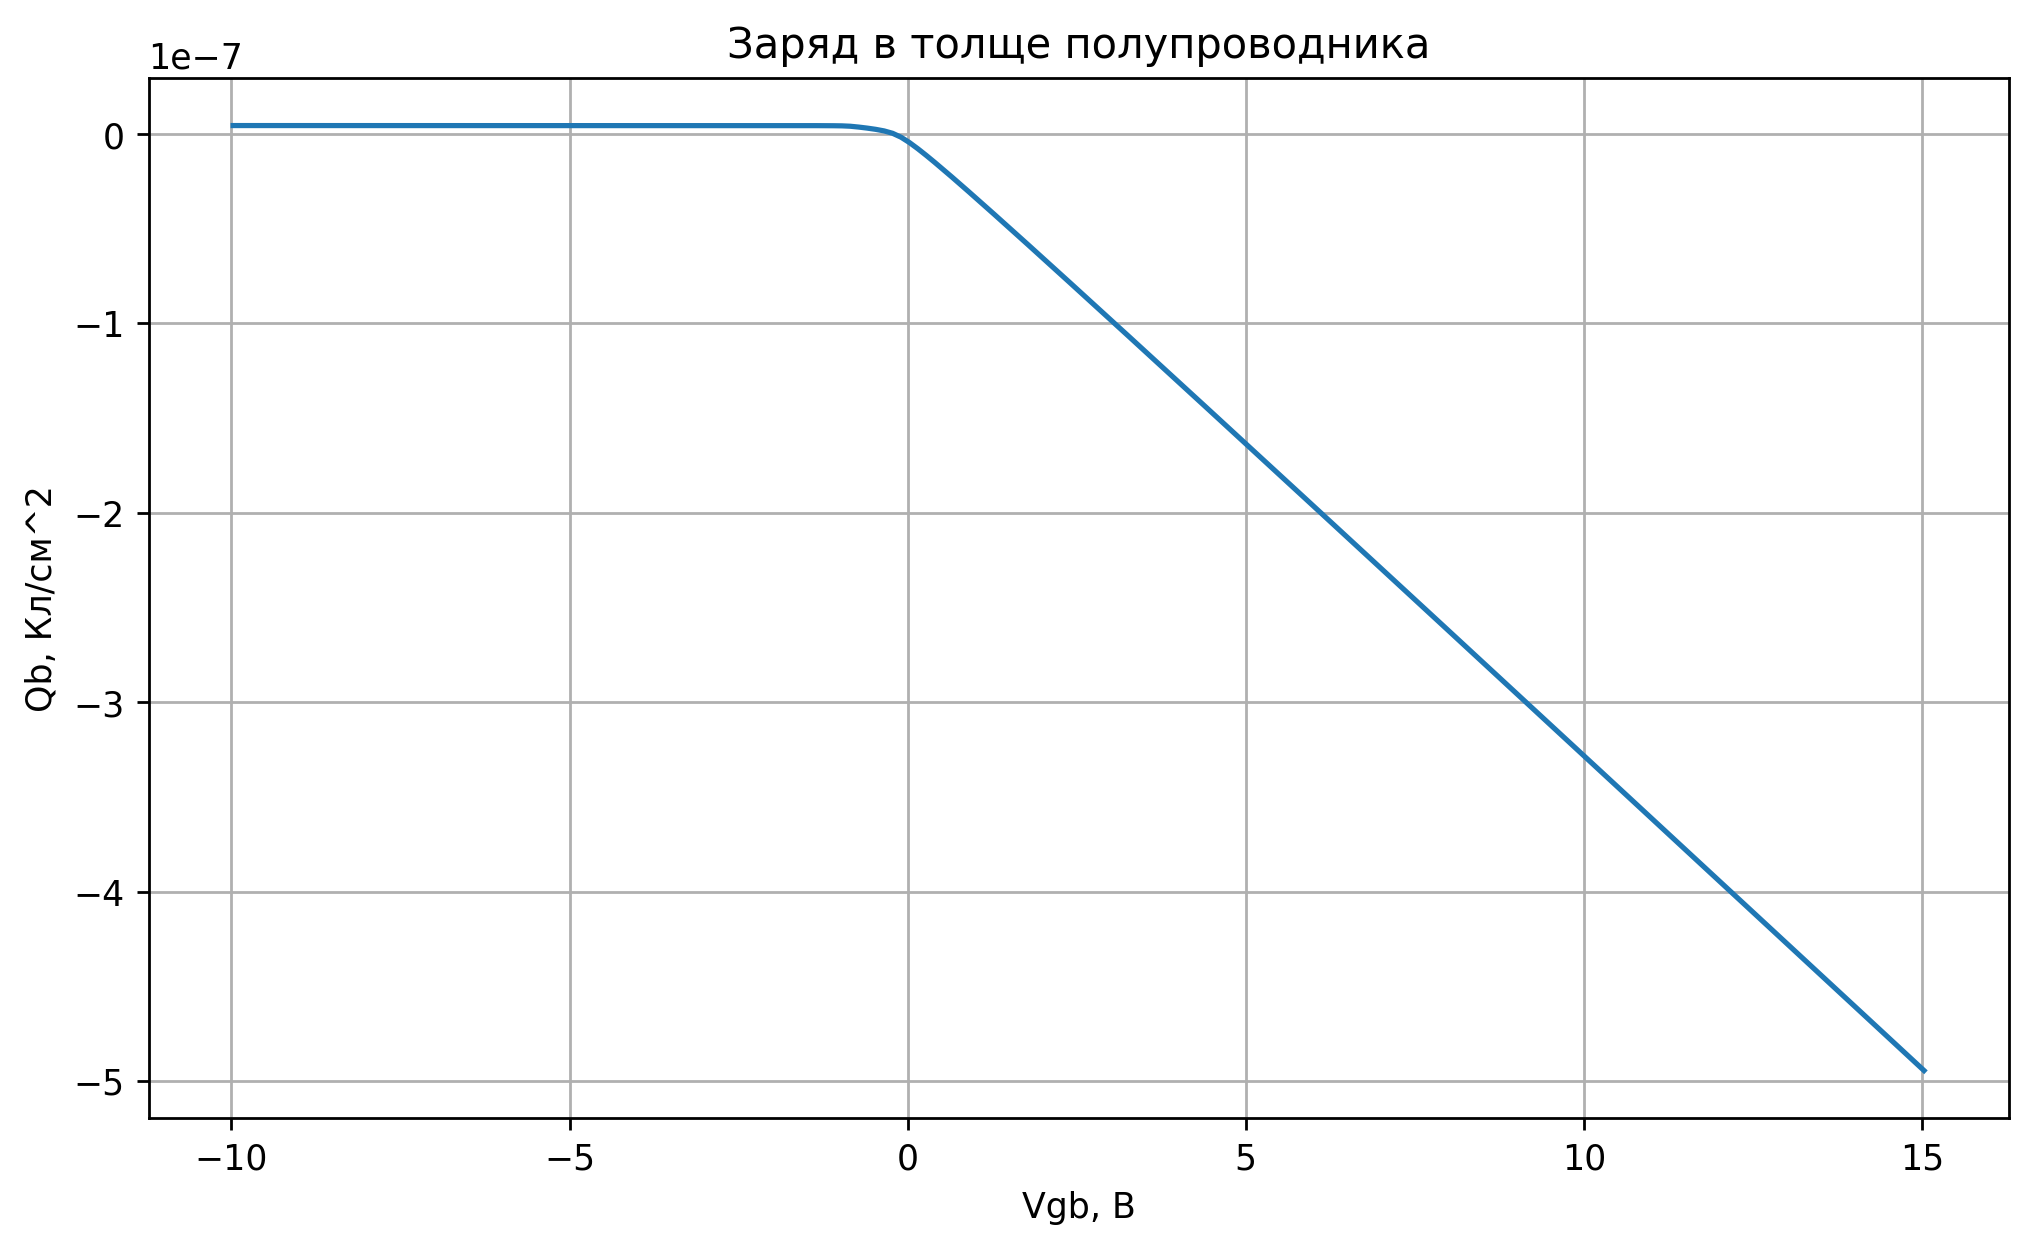

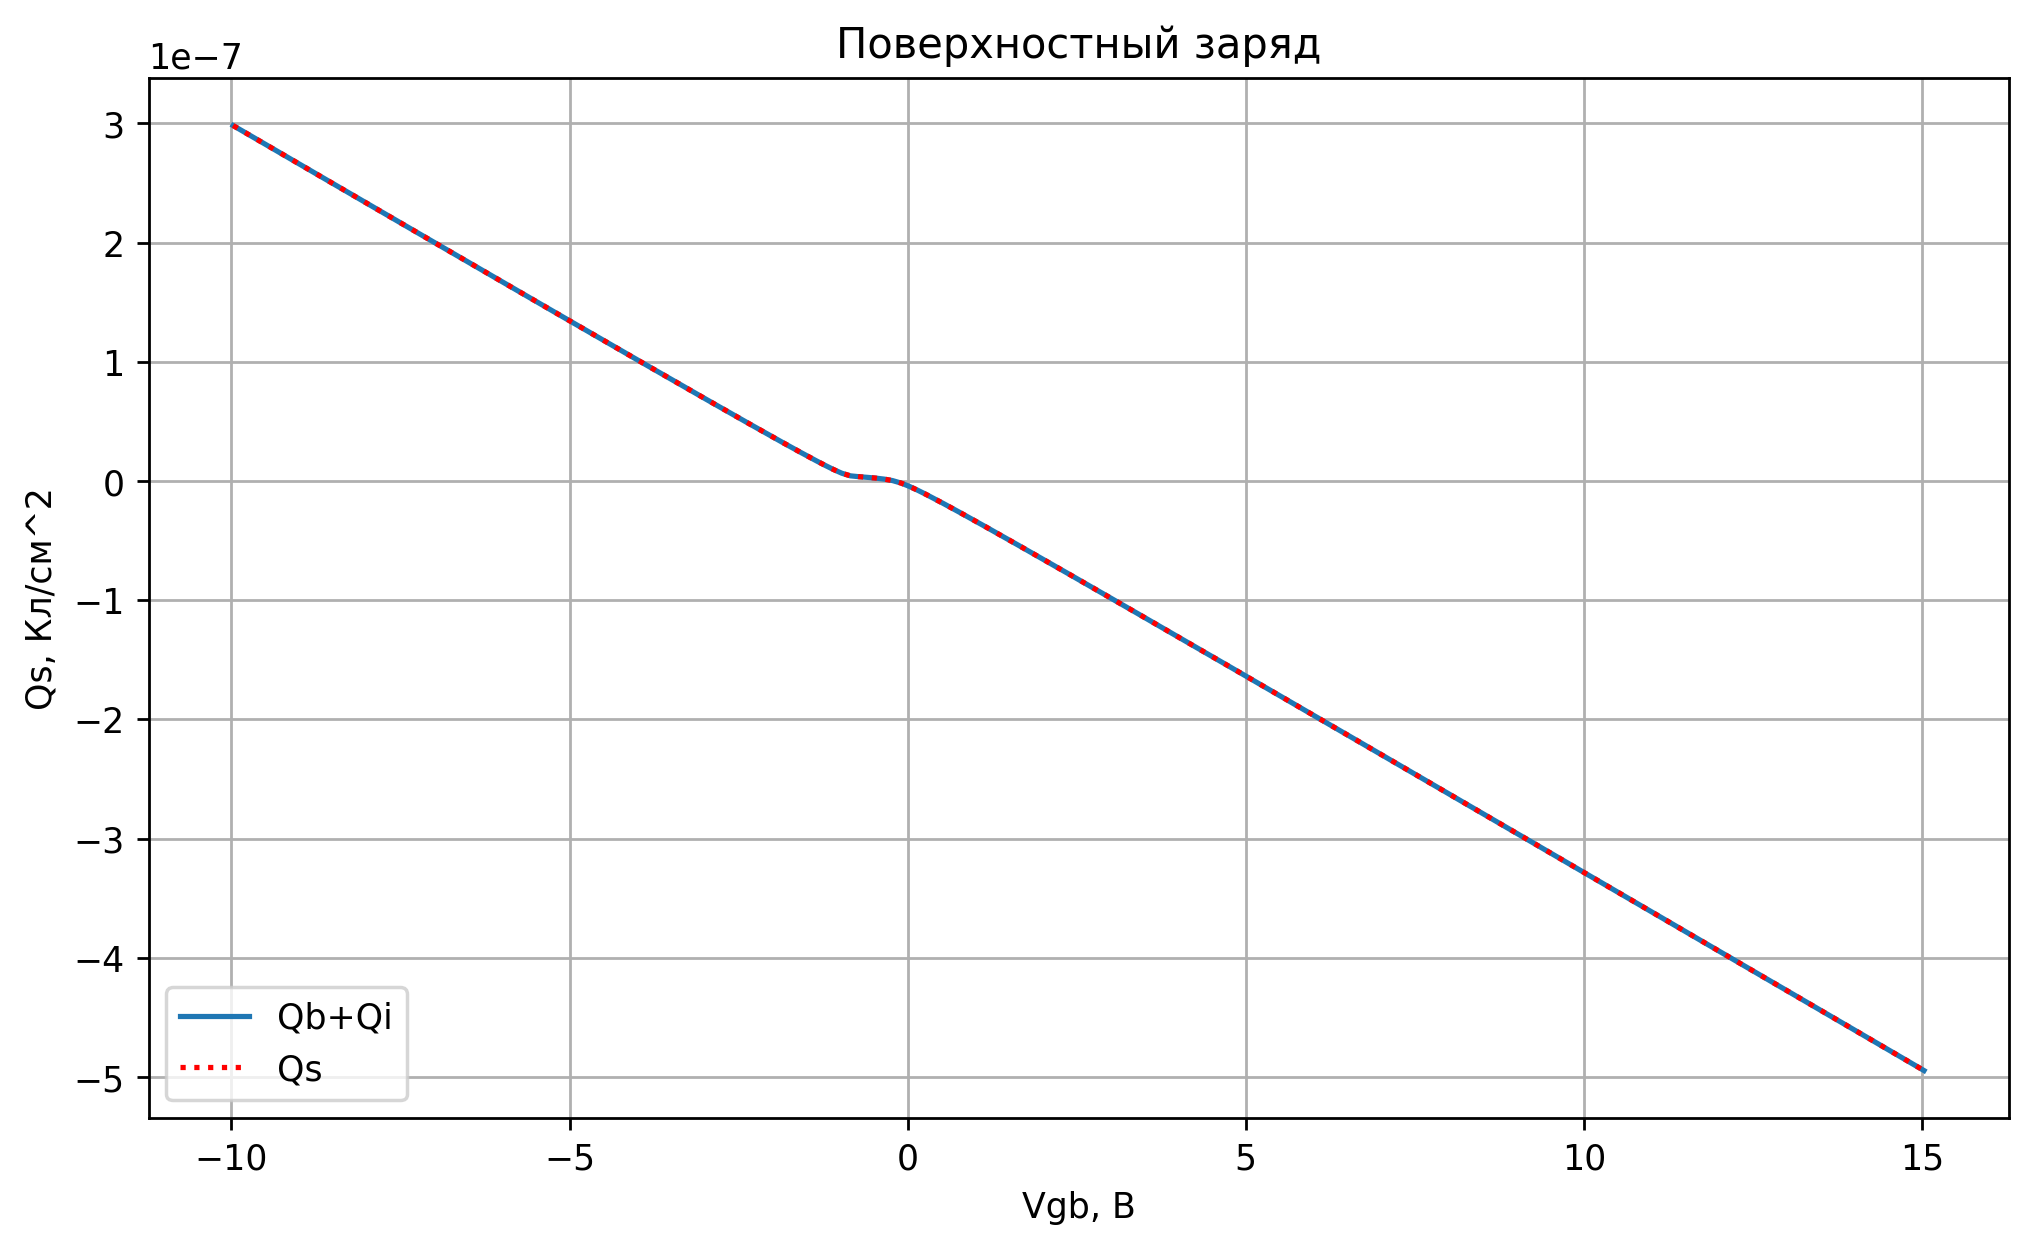

In [11]:
# 8 Проведя численное интегрирование рассчитать заряд в инверсном слое Qi изаряд в толще полупроводника Qb. 
#Построить графики зависимости этих зарядов от напряжения затвор — подложка Vgb. Построить график суммы заряда
#в инверсном слое Qi и заряда в толще полупроводника Qb от напряжения затвор — подложка Vgb и сравнить его с зависимостью Qs(Vgb).
from scipy.integrate import quad
I=lambda fis: 1-np.abs(np.sign(fis))
Vgb=np.linspace(SPE(Ev_mas[499]-F_mas[499],0),SPE(Ec_mas[499]-F_mas[499],0),201)
n = lambda fis: n_mas[499] * np.exp(fis / 0.026)
p = lambda fis: p_mas[499] * np.exp(-fis / 0.026)
E = lambda fis: np.sign(fis) * np.sqrt(2 * q / (E0 * Es) * f(fis))
Sp= lambda f,ep: (f+np.sqrt(f**2+4*ep**2))/2
Qi = np.array([])
Qb = np.array([])
integrand =  lambda fis: -q * (p(fis) - p_mas[499]) / (E(fis) + I(fis))
integrand2 = lambda fis: q * (n(fis) - n_mas[499]) / (E(fis) + I(fis))
Qi =np.zeros(201) 
for i in range(201):
        result_i, error = quad(integrand, fis[i], 0)
        Qi[i]= Sp(result_i, 1e-19)
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Qi, Кл/см^2") 
ax.set_title('Заряд в инверсном слое')
ax.set_yscale('log')
ax.plot(Vgb, Qi);
Qb=np.zeros(201)
for i in range(201):
        result_i, error = quad(integrand2, fis[i], 0)
        Qb[i]= (result_i)
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Qb, Кл/см^2") 
ax.set_title('Заряд в толще полупроводника')
ax.plot(Vgb, Qb); 
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Qs, Кл/см^2") 
ax.set_title('Поверхностный заряд')
ax.plot(Vgb, Qb+Qi);
ax.plot(Vgb, Qs_mas1,'r:')
ax.legend(labels = ("Qb+Qi", "Qs"), loc="lower left");

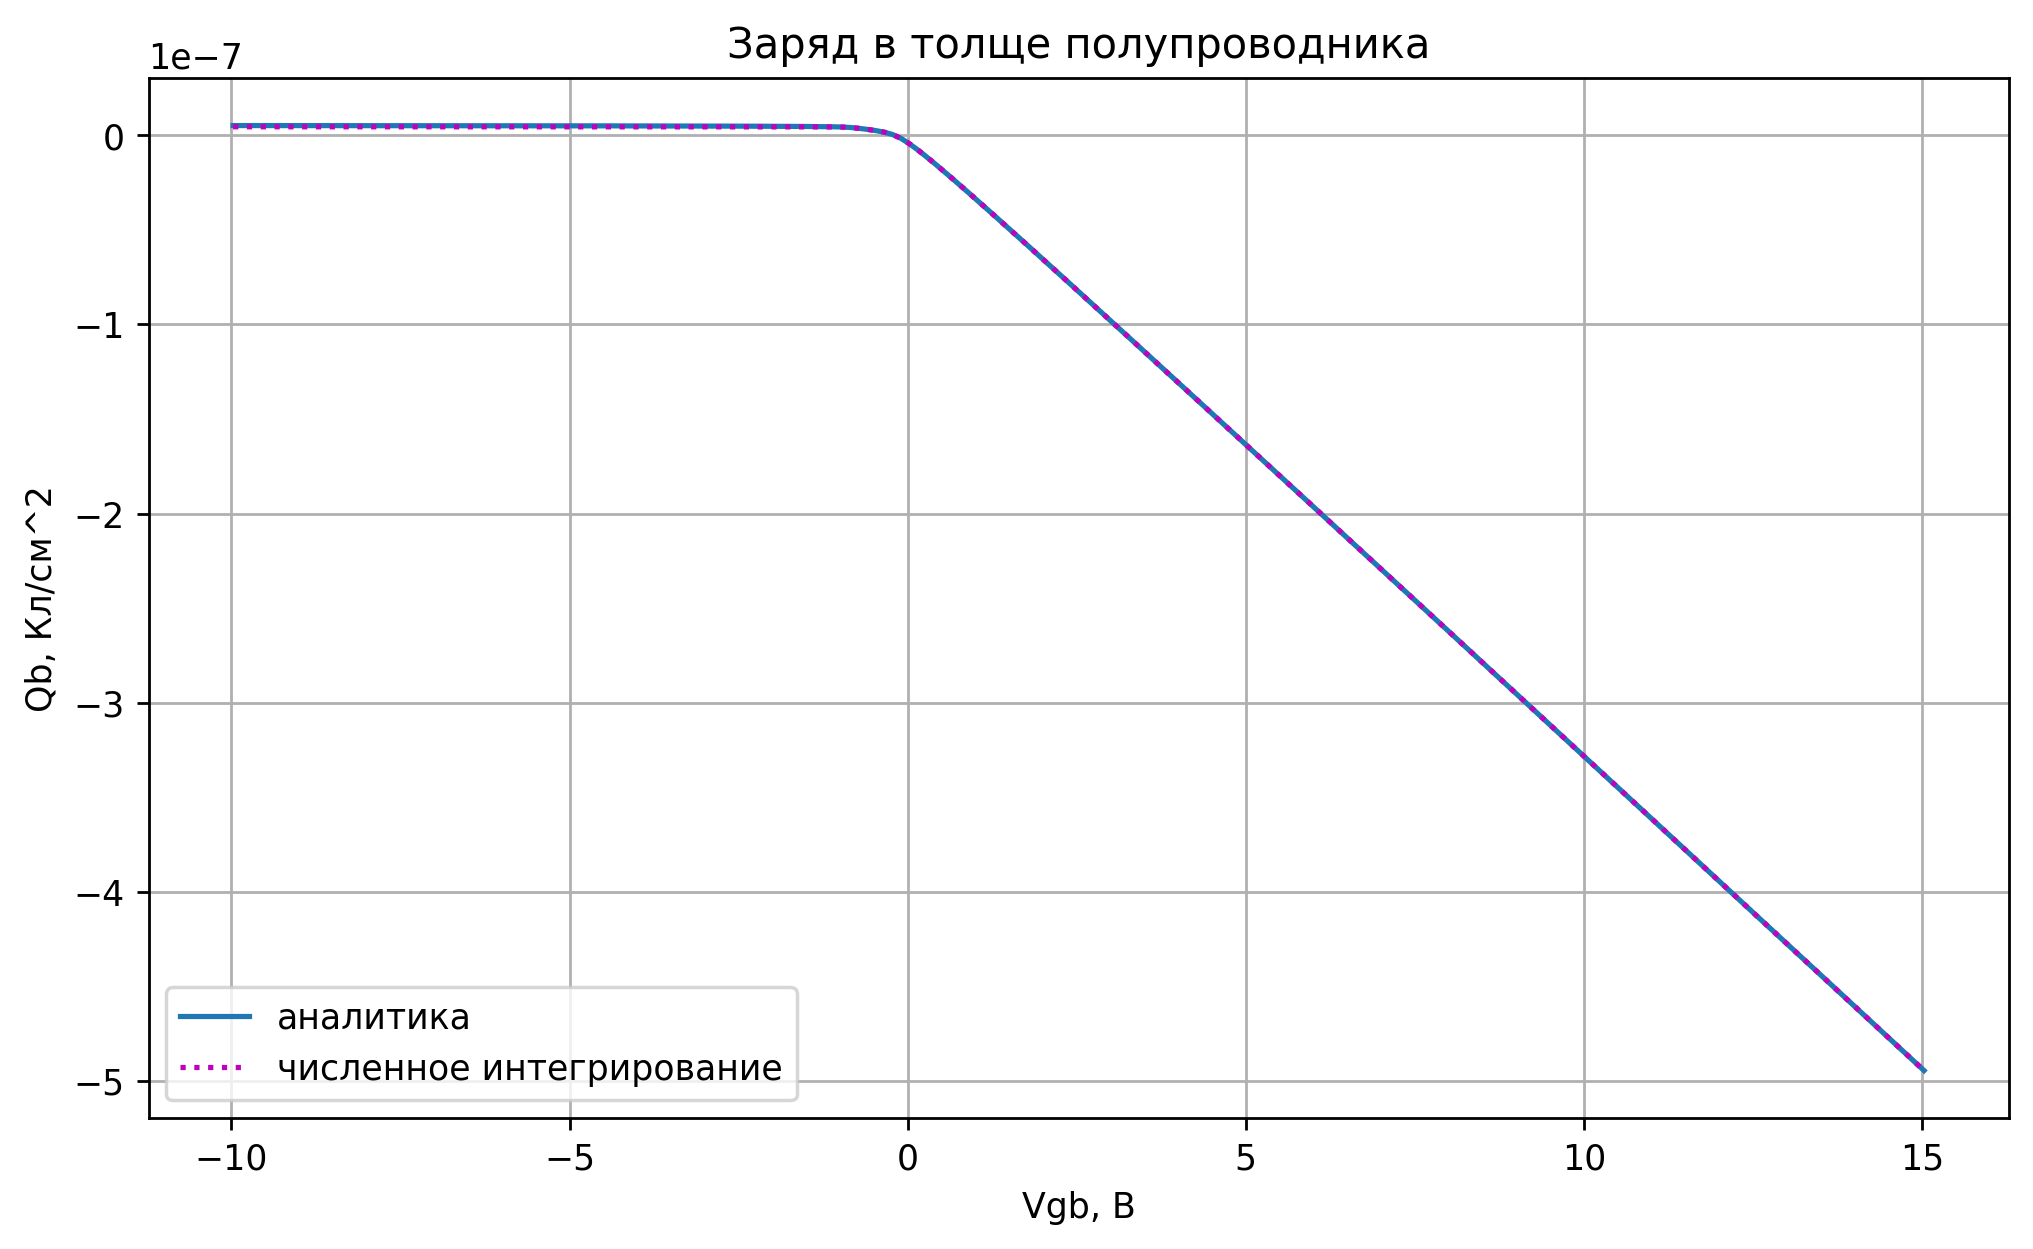

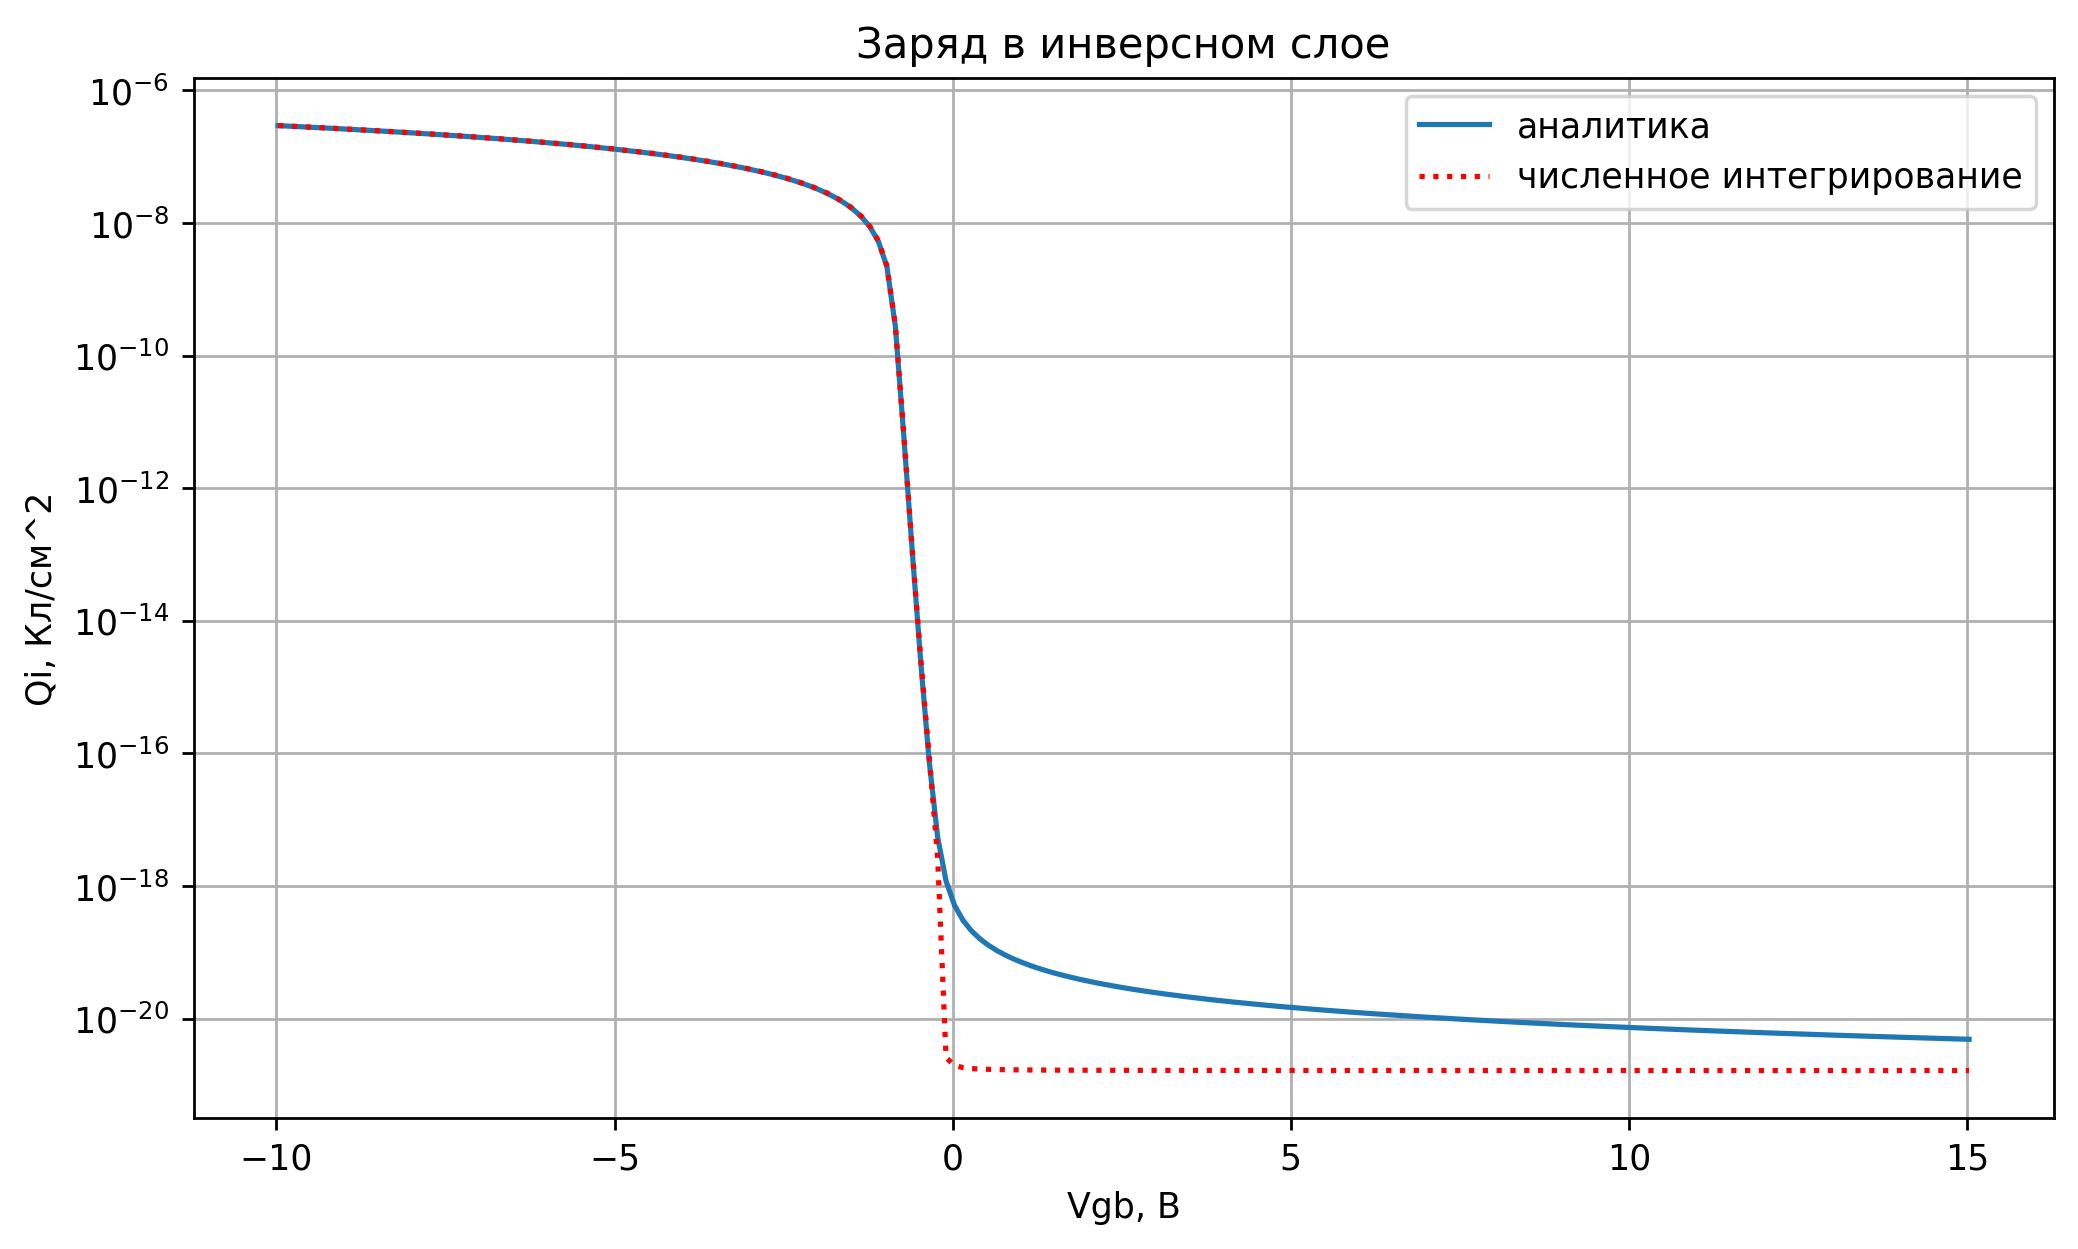

In [12]:
# 9 В соответствии с зарядовой моделью МДП — структуры рассчитать аналитически заряды Qb и Qi, построить их зависимости от Vgb, сравнить
#результат с численным расчетом в предыдущем пункте. Рассчитать в процентах разницу между численным и аналитическим решением. Провести анализ
#ошибки вычисления заряда в инверсном слое в режиме слабой и сильной инверсии.
fA = lambda fis: fis * (Na - Nd) + 0.026 * n_mas[499] * (np.exp(fis / 0.026) - 1)
QbA = lambda fis: -np.sign(fis) * np.sqrt(2 * q * E0 * Es * fA(fis))
QiA = lambda fis: 2 * q * E0 * Es * 0.026 * p_mas[499] * (np.exp(-fis / 0.026) - 1) /(Qs(fis) + QbA(fis)+ I(fis))
QbA_mas = np.zeros(201)
for i in range(0,201):
    QbA_mas[i] = QbA(fis[i])
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Qb, Кл/см^2") 
ax.set_title('Заряд в толще полупроводника')
ax.plot(Vgb, QbA_mas);
ax.plot(Vgb, Qb,'m:');
ax.legend(labels = ("аналитика", "численное интегрирование"), loc="lower left");
QiA_mas = np.zeros(201)
for i in range(0,201):
    QiA_mas[i] = QiA(fis[i])
QiA_mas = QiA(fis)
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Qi, Кл/см^2") 
ax.set_title('Заряд в инверсном слое')
ax.plot(Vgb, QiA_mas);
ax.plot(Vgb, Qi,'r:');
ax.set_yscale('log')
ax.legend(labels = ("аналитика", "численное интегрирование"), loc="upper right");

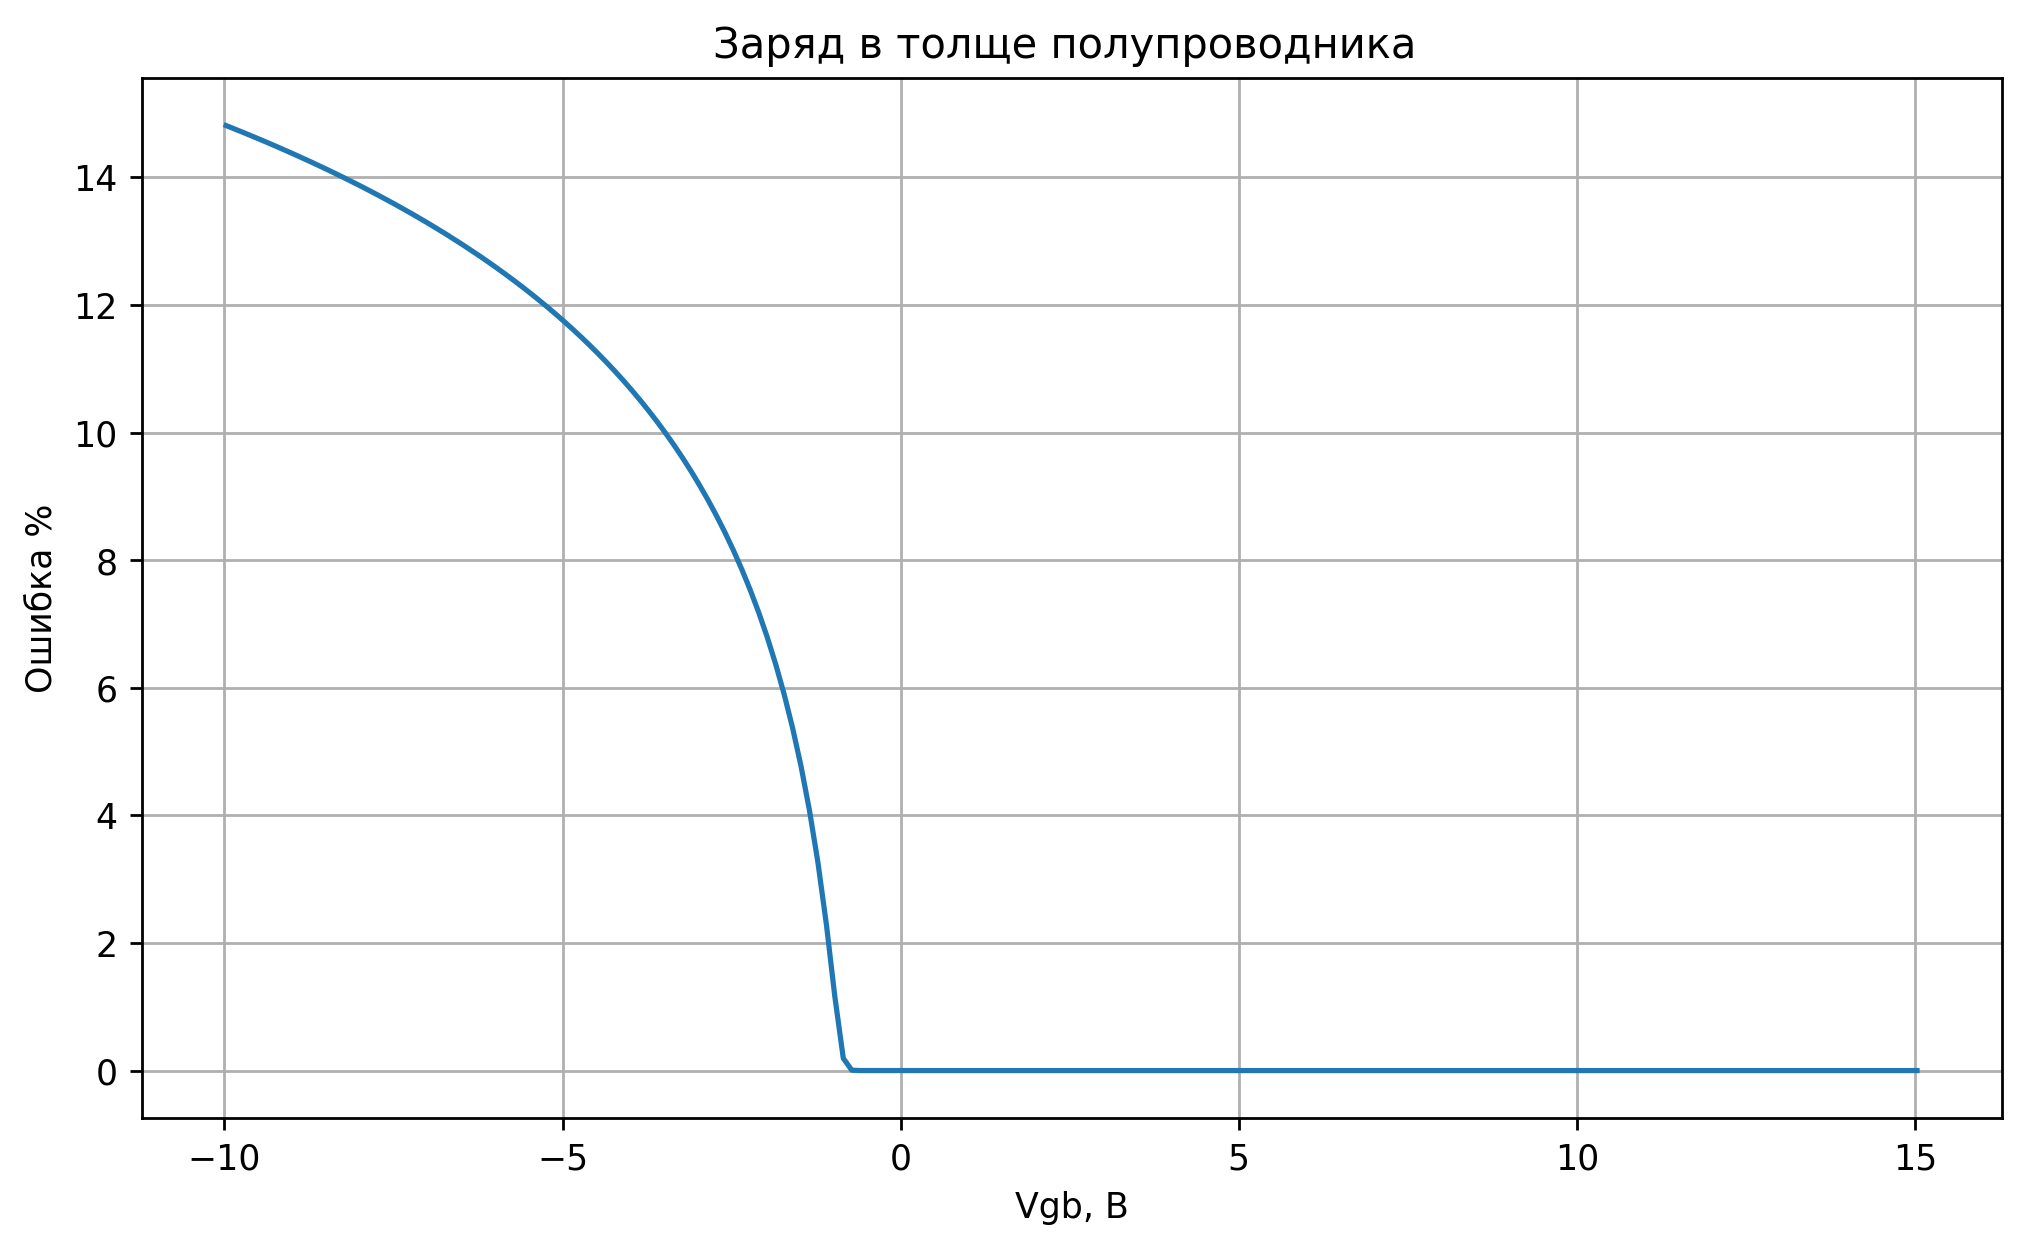

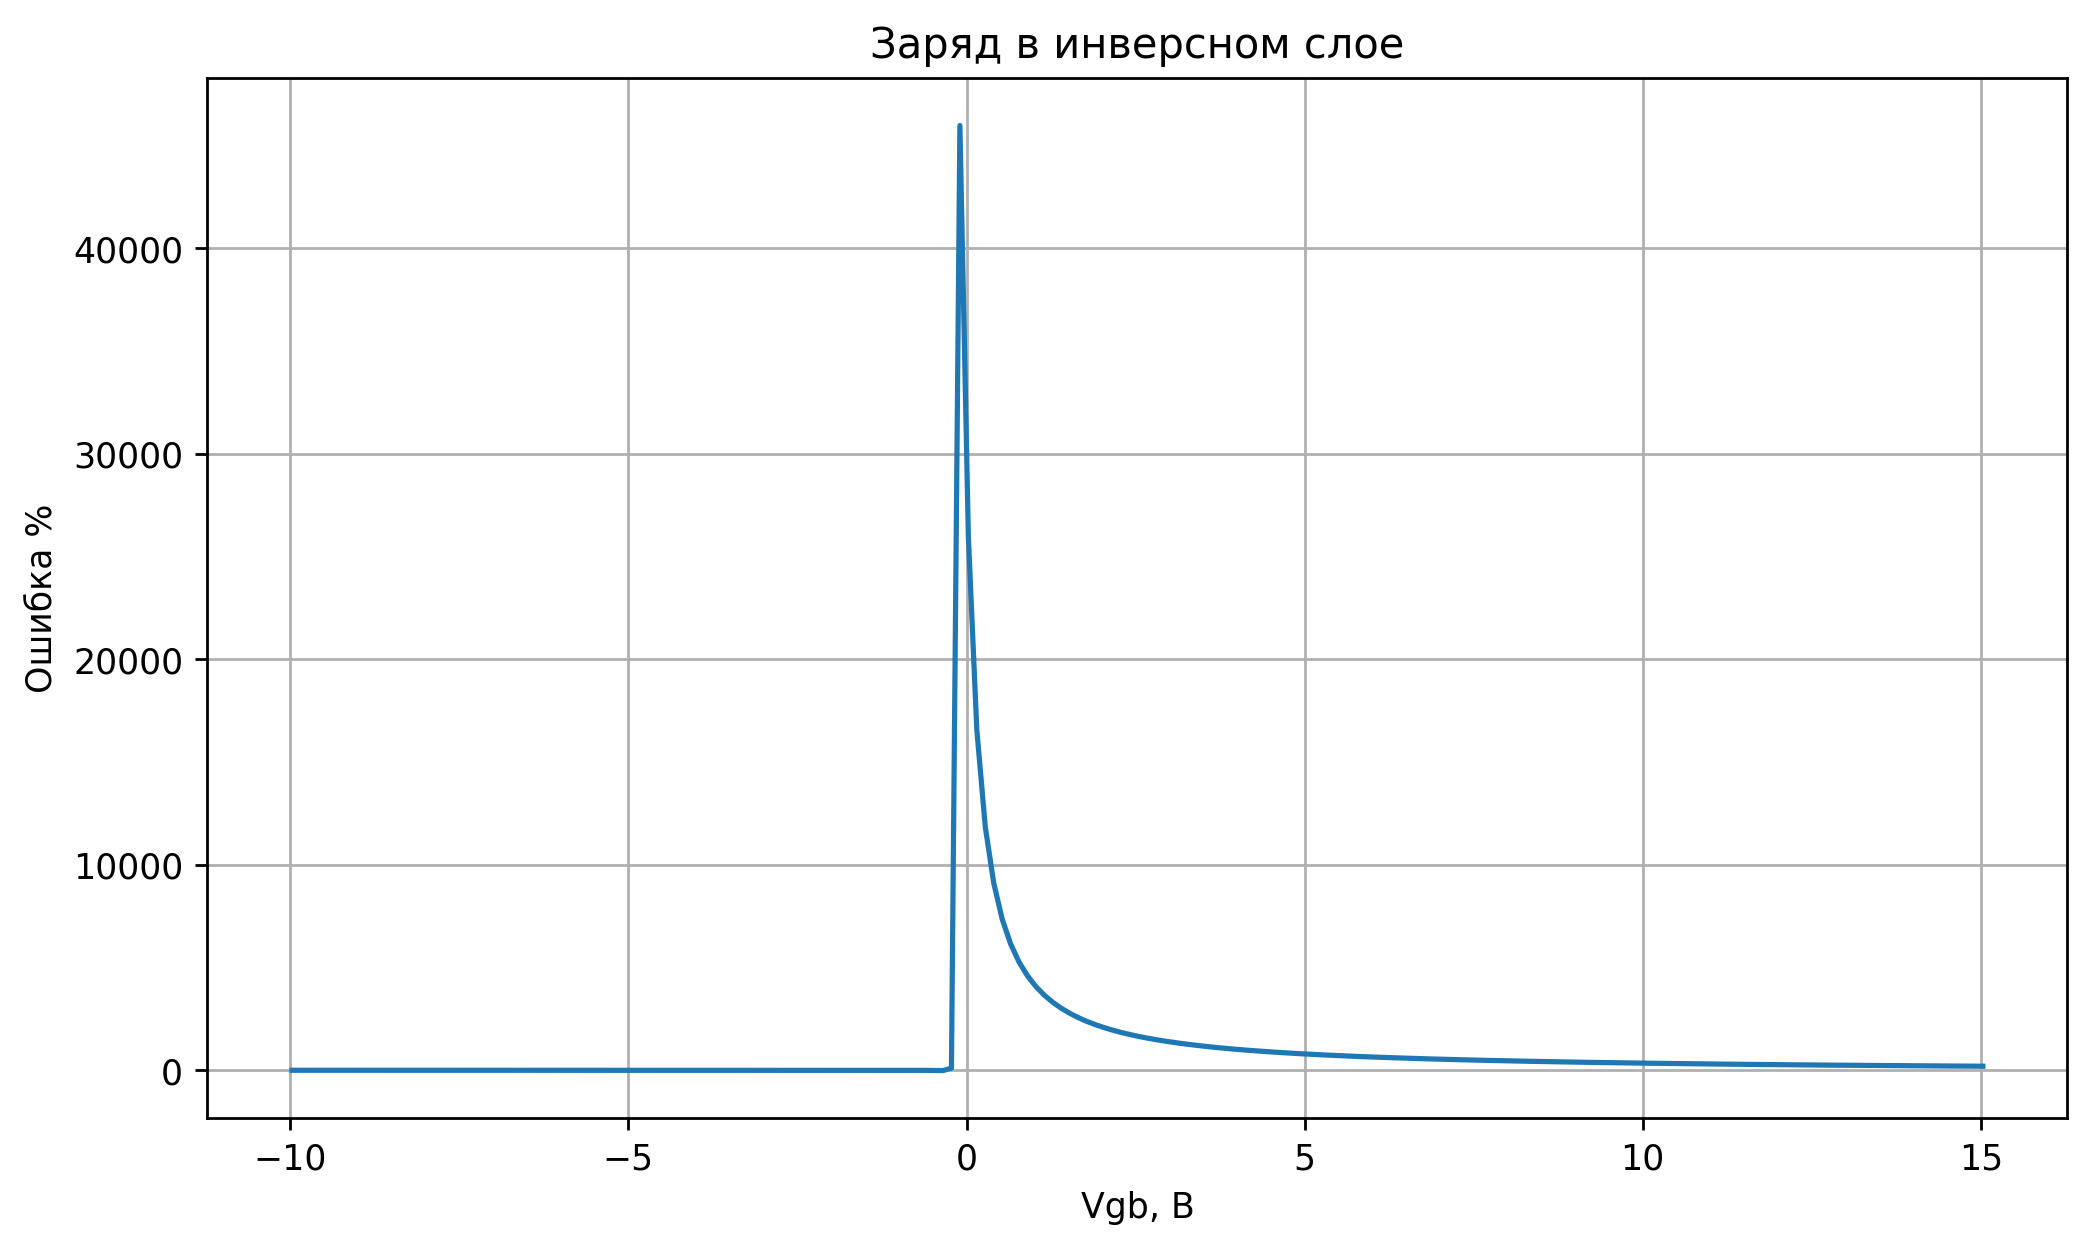

In [13]:
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Ошибка %") 
ax.set_title('Заряд в толще полупроводника ')
ax.plot(Vgb, 100 * (QbA(fis) - Qb) / Qb);

fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Ошибка %") 
ax.set_title('Заряд в инверсном слое')
ax.plot(Vgb, 100 * (QiA(fis) - Qi) / Qi);

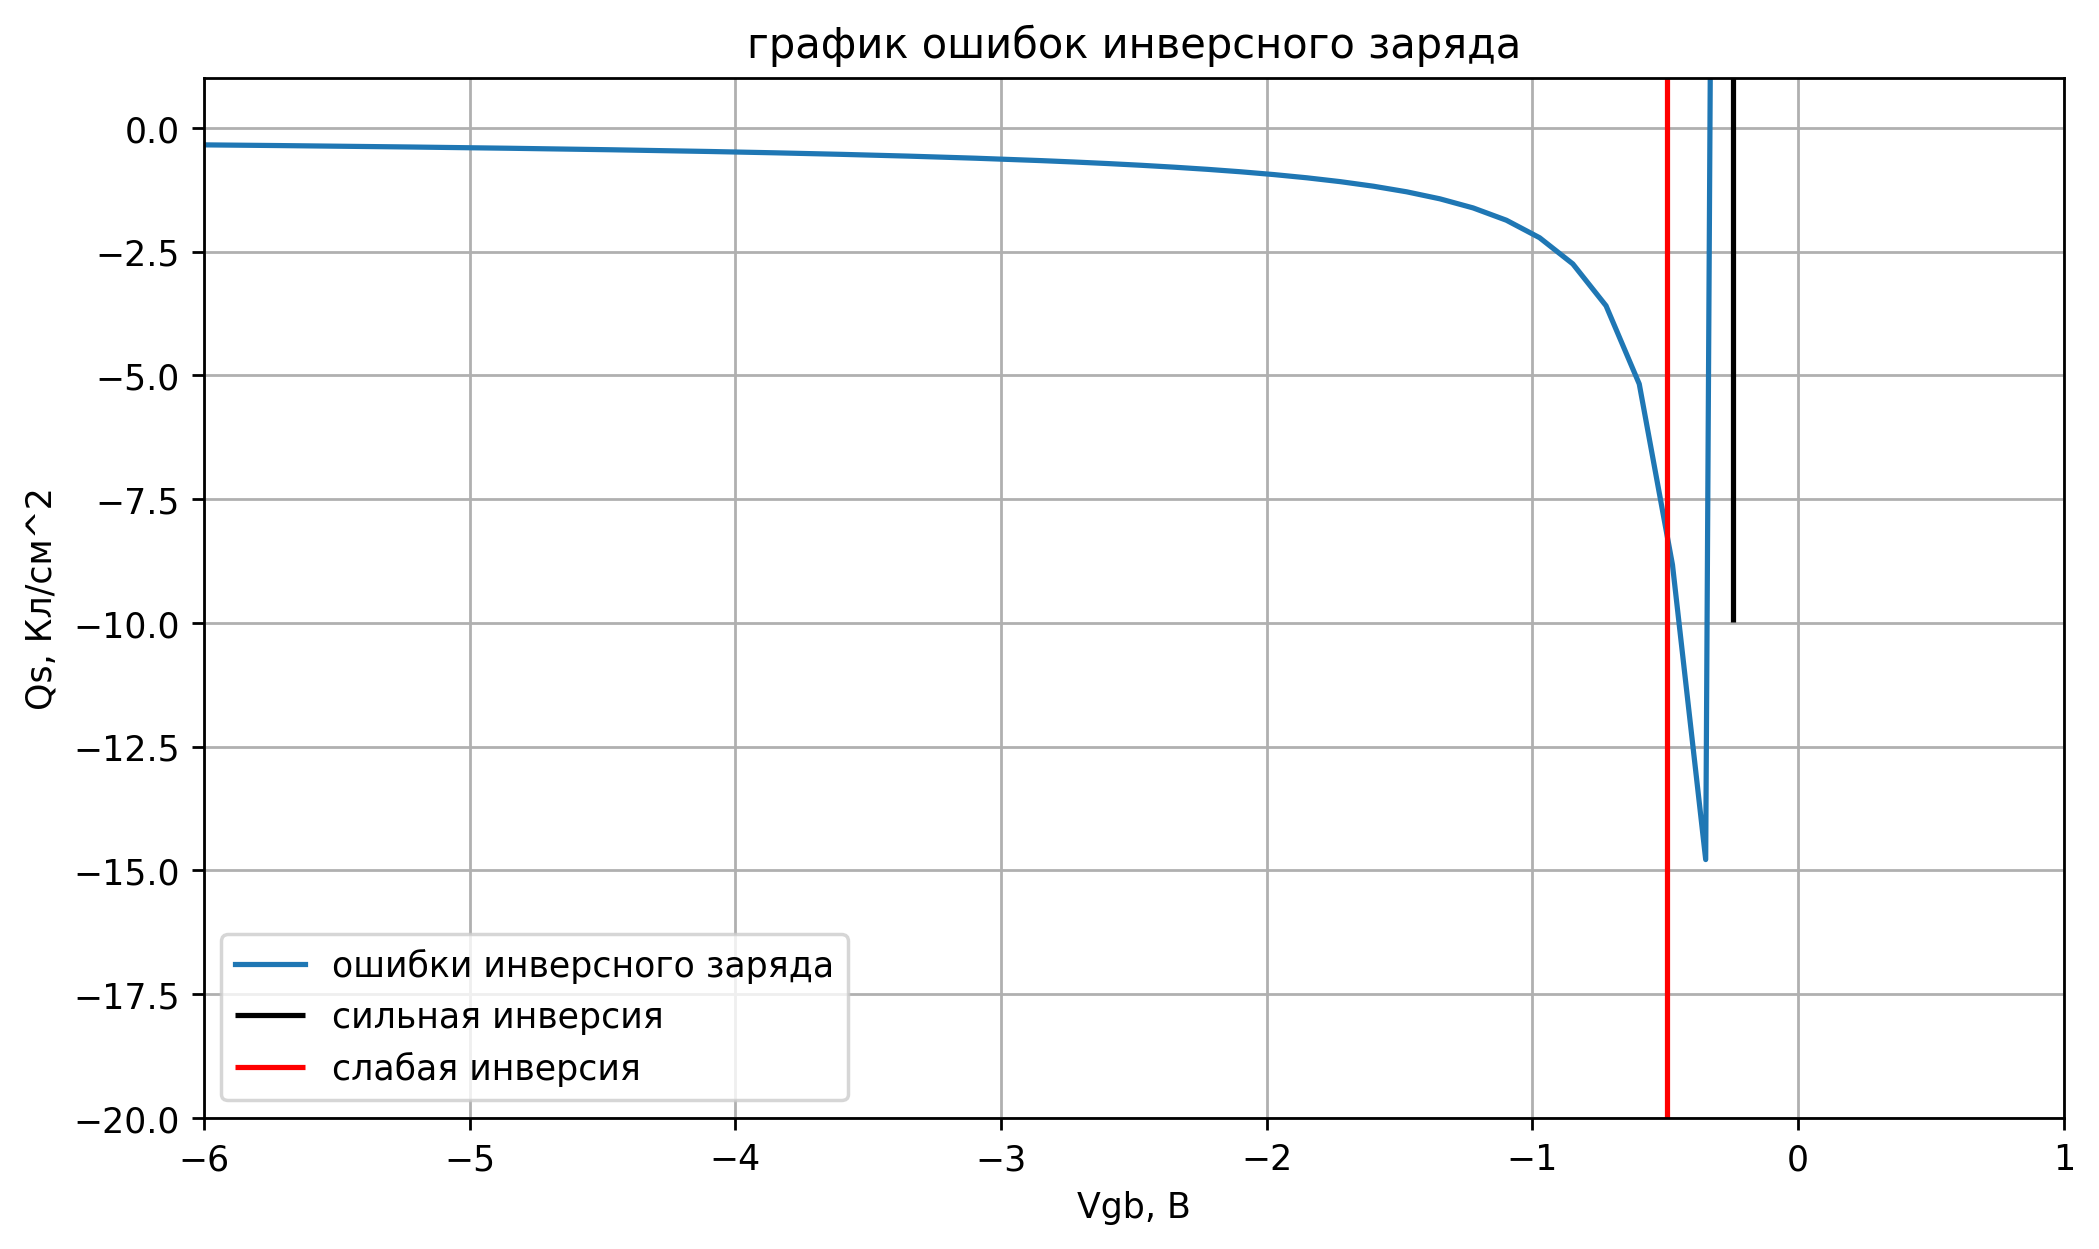

In [14]:
selector = np.where(fis <= phif)[0]
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Qs, Кл/см^2") 
ax.set_title('график ошибок инверсного заряда')
ax.plot(Vgb, 100 * (QiA(fis) - Qi) / Qi)
ax.set_xlim(-6,1)
ax.set_ylim(-20,1);
Wi=Ei_mas[499] - F_mas[499]
ax.vlines(Wi, Vgb.min(), Vgb.max(),color = 'black')
Si=2 * (Ei_mas[499] - F_mas[499]) 
ax.vlines(Si, 10, -20,color = 'red')
ax.legend(labels = ("ошибки инверсного заряда","сильная инверсия", "слабая инверсия"), loc="lower left");

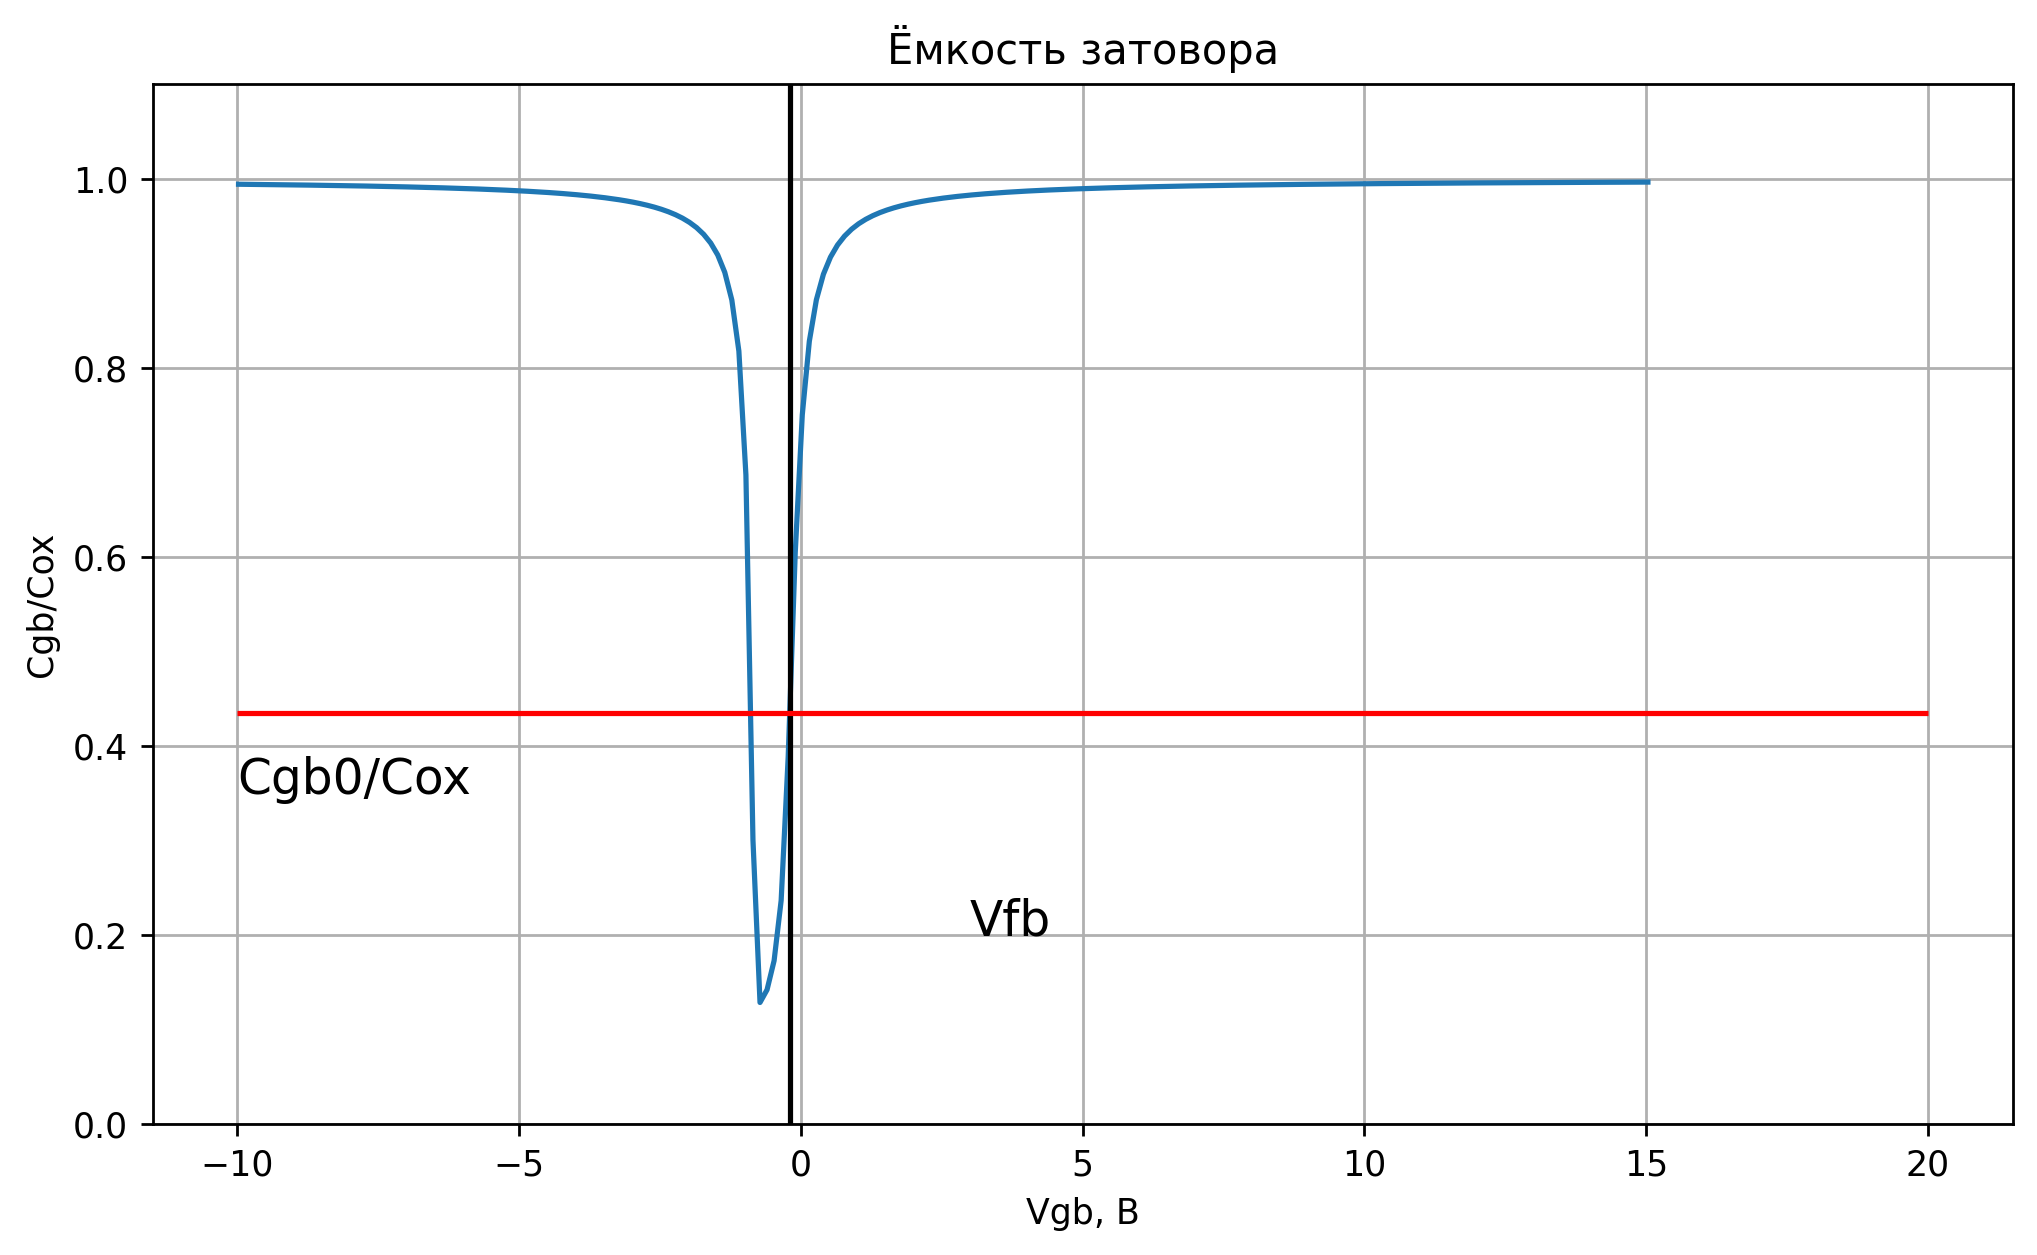

In [15]:
#10 Рассчитать и построить график зависимости ёмкости затвор — подложка
#(ёмкости всей МДП — структуры) Сgb от напряжения затвор — подложка Vgb .
#Отметить на получившемся графике точку, соответствующую плоским зонам.
#Рекомендуется по оси ординат откладывать ёмкость в долях от ёмкости
#диэлектрика.
Cs0 = np.sqrt(q * Es * E0 / 0.026 * (p_mas[499] + n_mas[499]))
df = lambda fis: Na - Nd - p_mas[499] * np.exp(-fis / 0.026) + n_mas[499] * np.exp(fis / 0.026)
Cs = lambda fis: np.sign(fis) * df(fis) * np.sqrt(q * Es * E0 / 2 / (f(fis) + I(fis))) + I(fis) * Cs0
Vgb=np.linspace(SPE(Ev_mas[499]-F_mas[499],0),SPE(Ec_mas[499]-F_mas[499],0),201)
Cgb = Cs(fis) * Coxp / (Cs(fis) + Coxp)
Cgb0 = Cs(0) * Coxp / (Cs(0) + Coxp)
Cs_mas1 = np.zeros(201)
for i in range(0,201):
    Cs_mas1[i] = Cs(fis[i])
Cg_mas1 = np.zeros(201)  
for i in range(0,201):
    Cg_mas1[i] = Cs_mas1[i] * Coxp / (Cs_mas1[i] + Coxp)
Cs0 = np.sqrt(q * Es * E0 / 0.026 * (p_mas[499] + n_mas[499]))
Cgb0 = Cs0* Coxp / (Cs0 + Coxp)/Coxp
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("Cgb/Cox") 
ax.set_title('Ёмкость затовора')
ax.plot(Vgb, Cg_mas1/Coxp);
ax.vlines(Vfb, Vgb.min(), Vgb.max(),color = 'black');
plt.text(3, 0.2, "Vfb", fontsize=14);
ax.set_ylim(0,1.1);
ax.hlines(Cgb0, -10, 20,color = 'red')
plt.text(-10, 0.35, "Cgb0/Cox", fontsize=14);

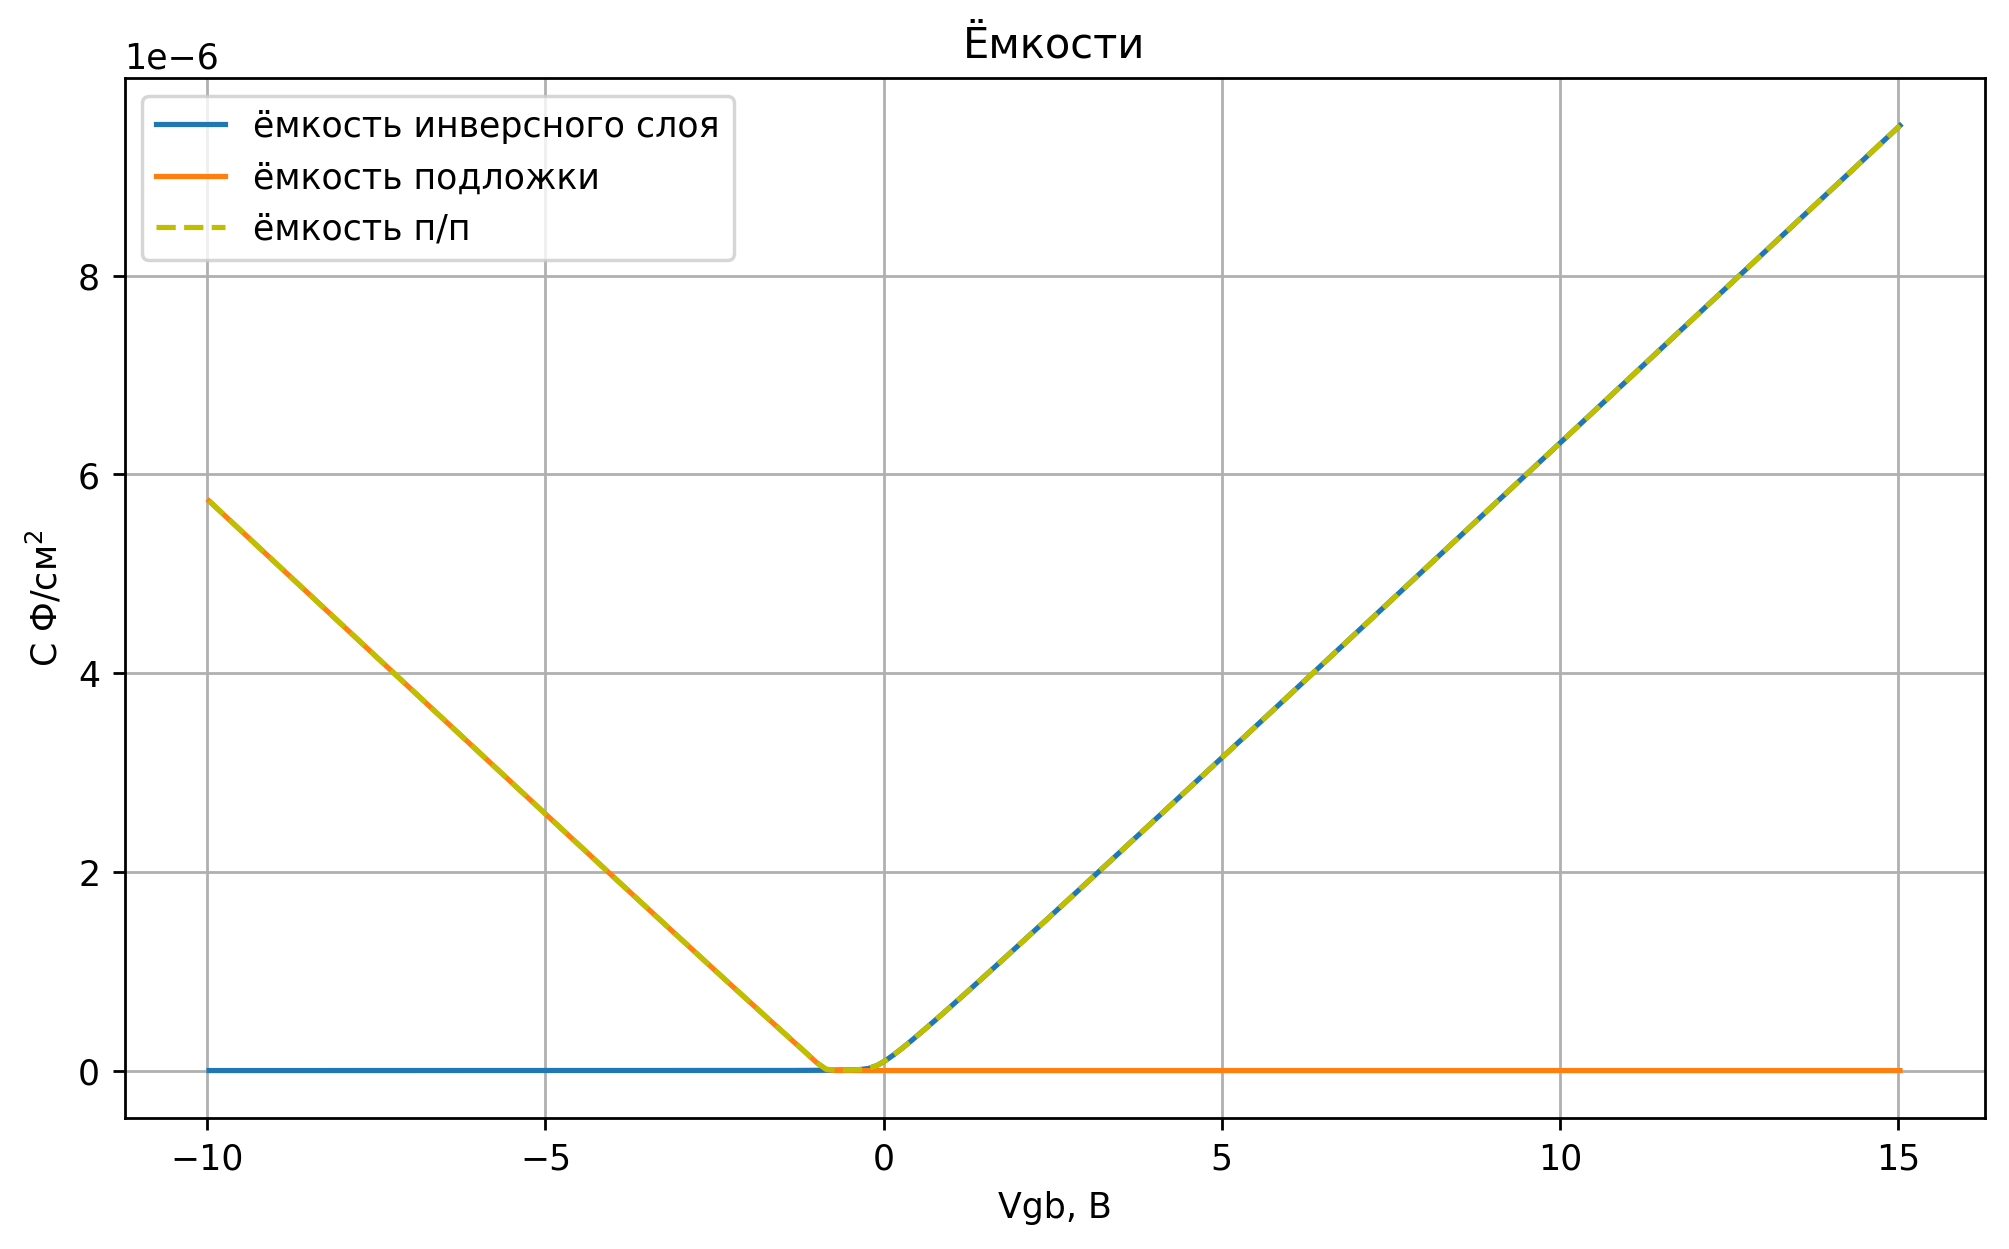

In [16]:
#11 Рассчитать и построить зависимость ёмкости полупроводника Cs ,
#инверсного слоя Ci , подложки Cb от напряжения затвор — подложка Vgb.
#Рекомендуется построить все три ёмкости на одном графике.
def Ci(fis):
    return q*(n1(fis)-n_mas[499])/Ess(fis)
def Cb(fis):
    return -q*(p1(fis)-p_mas[499])/Ess(fis)
Ci_mas = np.zeros(201)
for i in range(0,201):
    Ci_mas[i] = Ci(fis[i])
Cb_mas = np.zeros(201)
for i in range(0,201):
    Cb_mas[i] = Cb(fis[i])    
fig, ax = plt.subplots()        
plt.rcParams['figure.dpi'] = 250 
plt.rcParams["figure.figsize"] = (9.6,5.4)
plt.rcParams["axes.grid"] = True
ax.set_xlabel("Vgb, В") 
ax.set_ylabel("C Ф/см$^2$") 
ax.set_title('Ёмкости')
ax.plot(Vgb, Ci_mas,Vgb ,Cb_mas,);
ax.plot(Vgb,Ci_mas+Cb_mas,'y--')
ax.legend(labels = ("ёмкость инверсного слоя","ёмкость подложки", "ёмкость п/п"), loc="upper left");

In [17]:
#12-14
integrand_y = lambda psi: 1 / Ess(psi)

def compute_y_vs_psi(psis):
   
    
    if psis == 0:
        y = np.linspace(0, 150, 101) * 1e-7 
        psi = 0 * y
        return y, psi
    
    psi1 = np.linspace(psis, psis * 0.5, 21) 
    psi2 = np.logspace(                      
        np.log10(np.abs(psis * 0.5)), 
        np.log10(np.abs(psis * 1e-3)), 
        101
    )
    if psis < 0:
        psi2 = -1 * psi2
    
    psi = np.hstack((psi1, psi2[1:]))
    
    y = np.array([])
    for value in psi:
        y_current, error = quad(integrand_y, value, psis)
        y = np.hstack((y, y_current))
    return y, psi

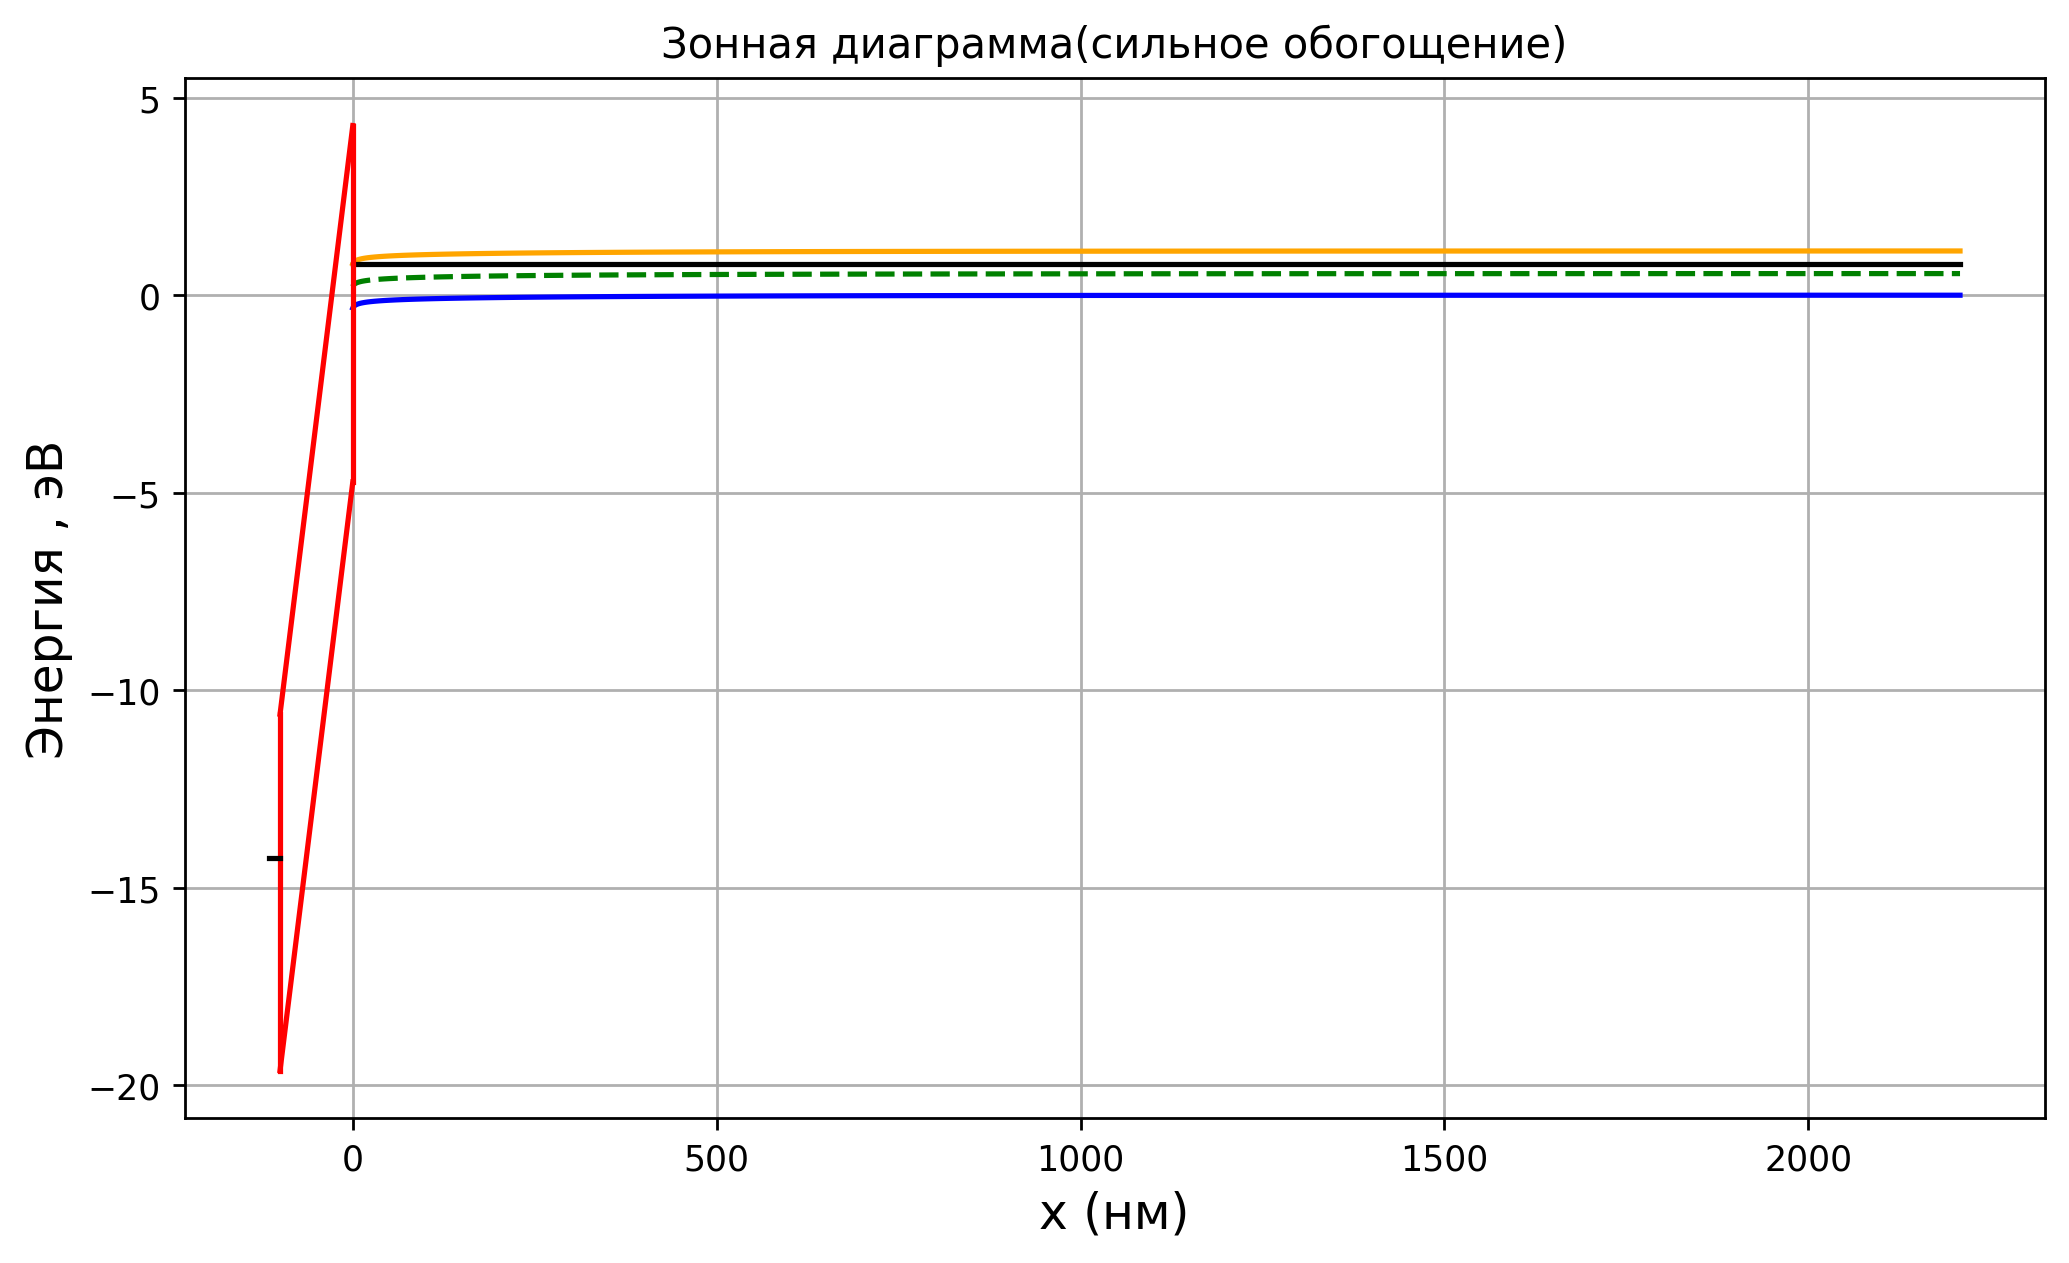

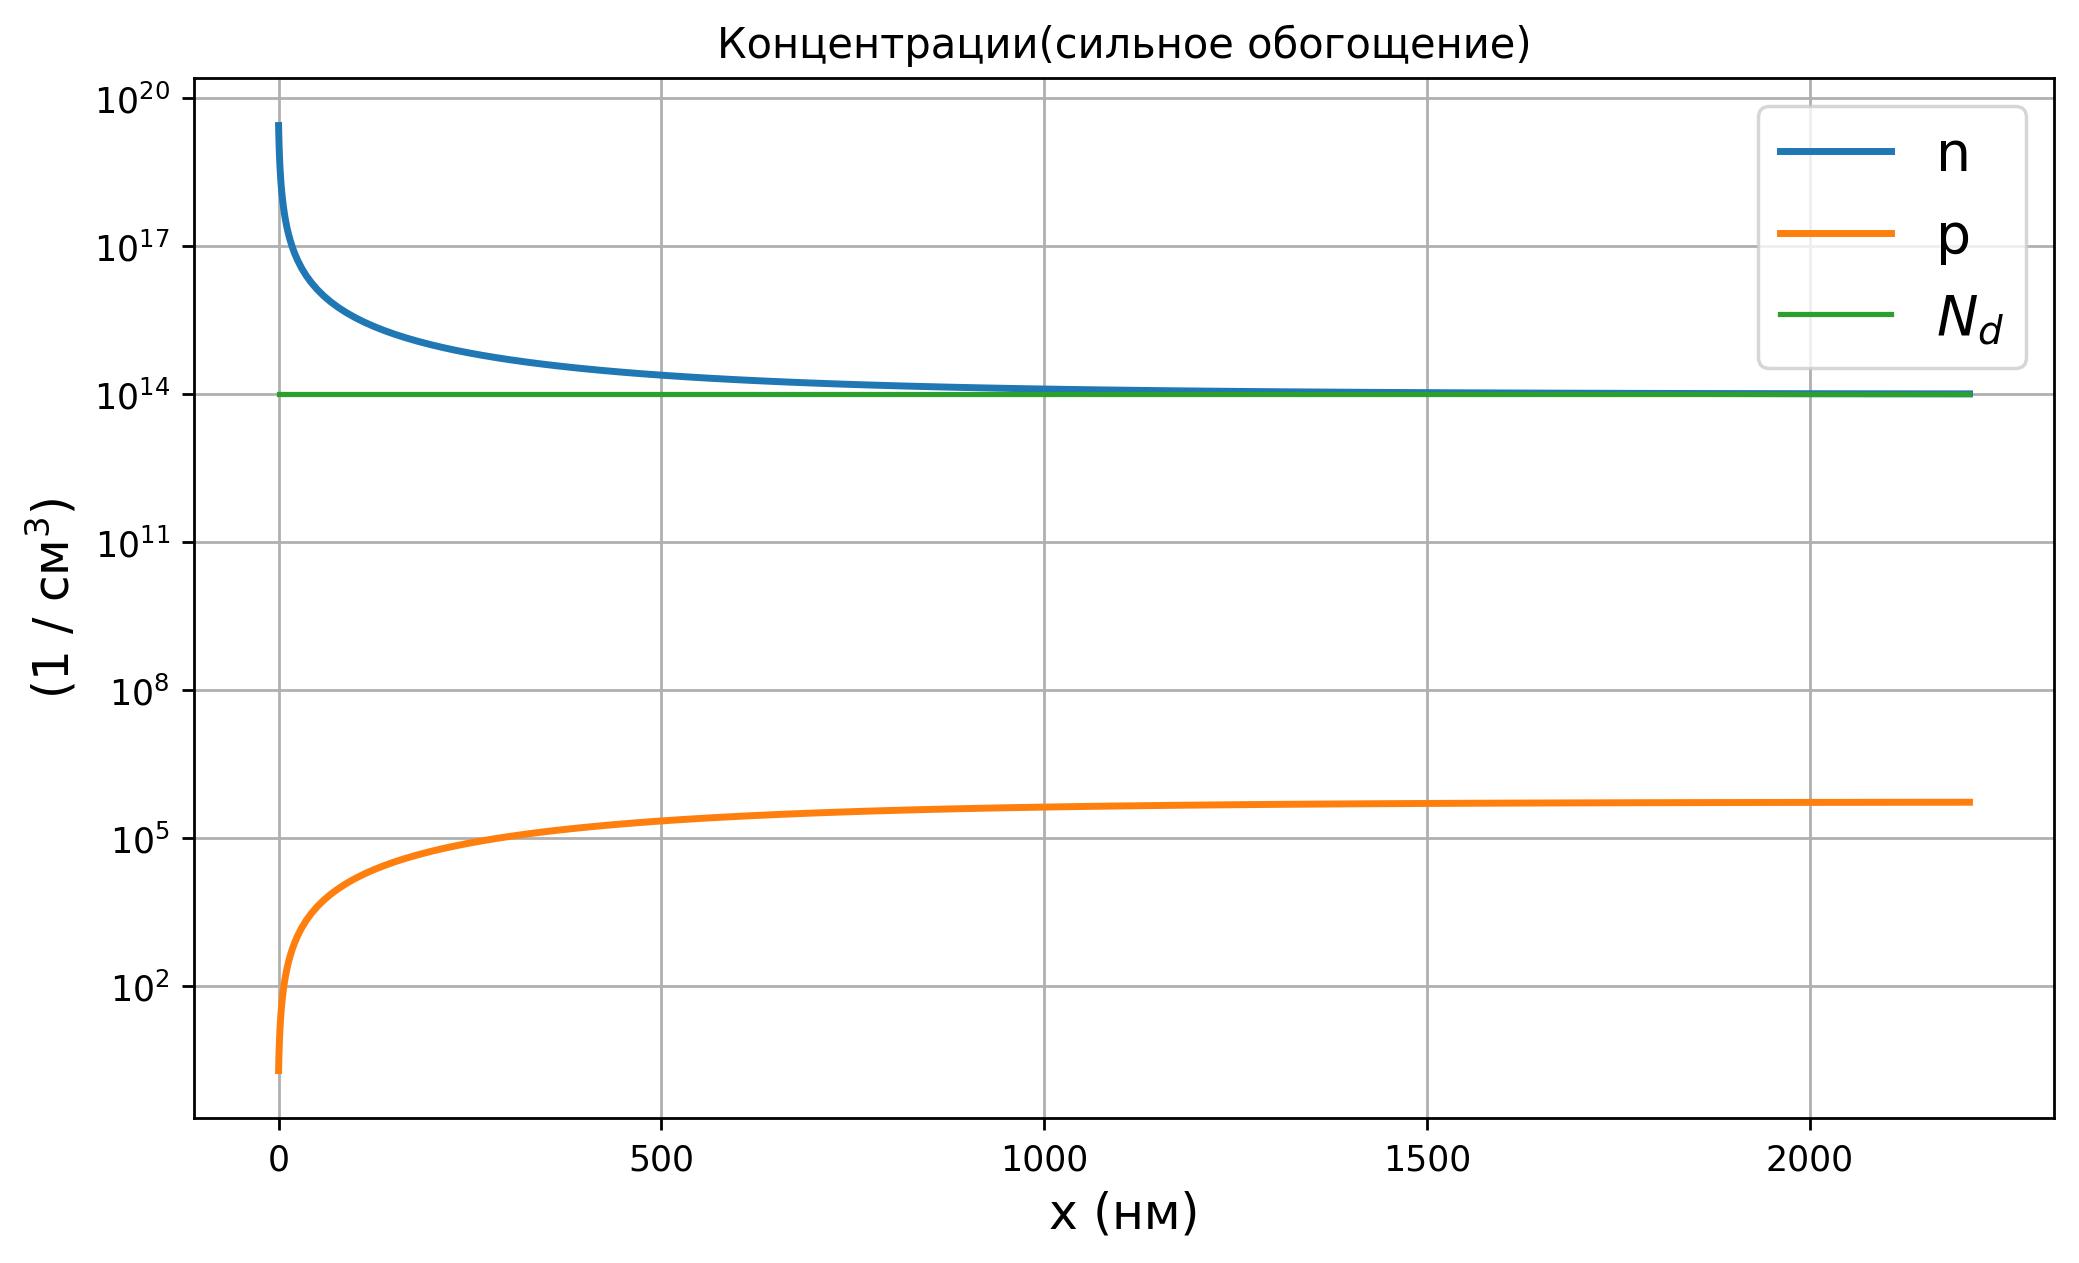

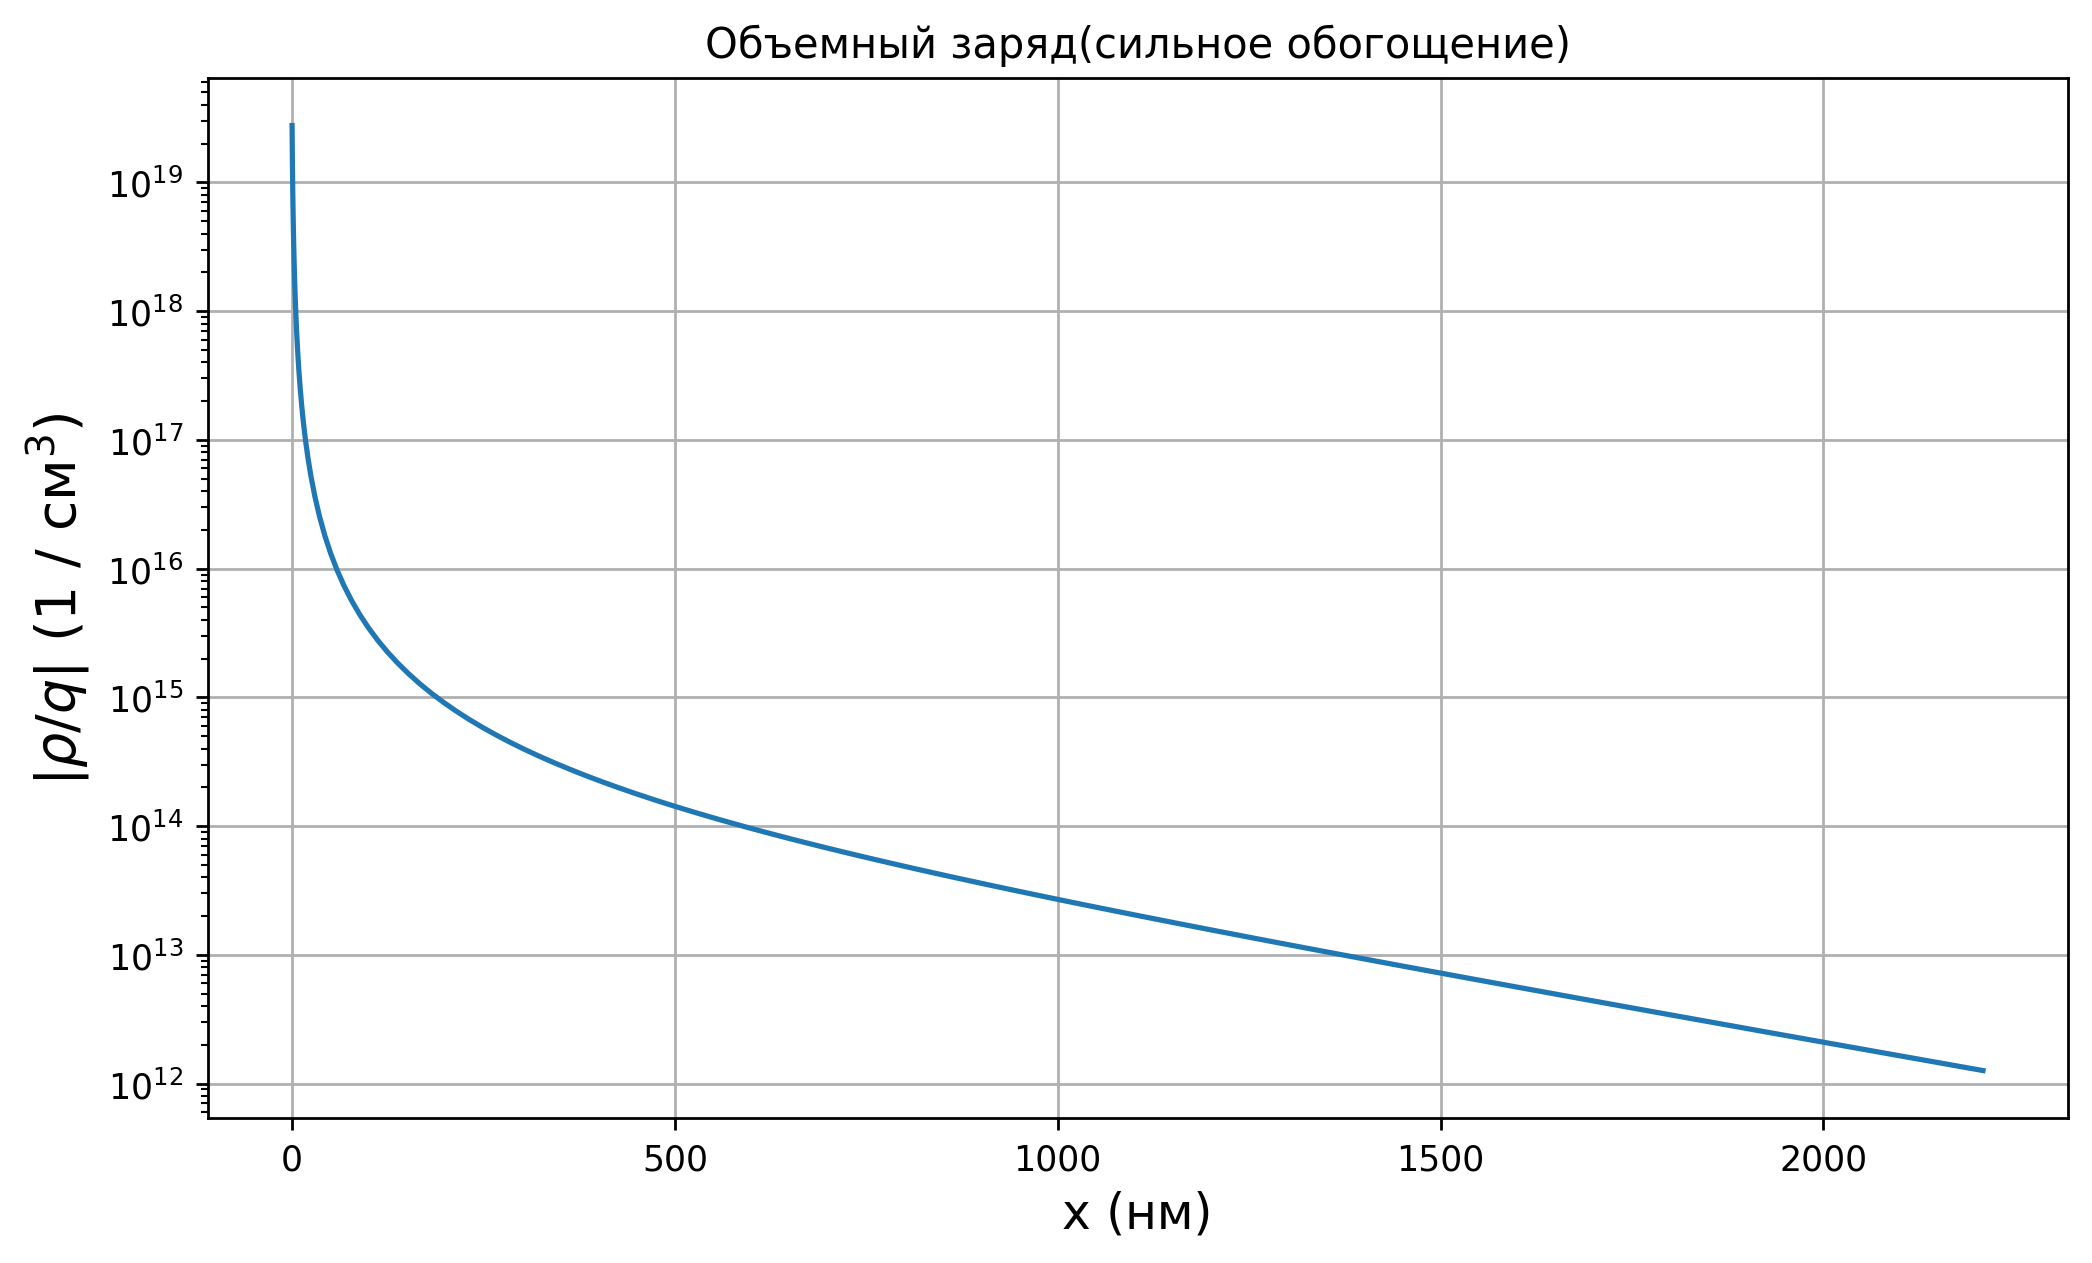

In [18]:
psis = Ec_mas[499] - F_mas[499]                                           #(сильное обогощение)

# график для зонной диаграммы 
fig, ax = plt.subplots() 
plt.figure(1)
ax.set_title('Зонная диаграмма(сильное обогощение)')
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('Энергия , эВ', fontsize=14)
plt.grid(True)

# get psiox from the potential balance equation (see SPE derivation)
Vgb=SPE(psis,0)
psiox = Vgb - psis - Vfb

y, psi = compute_y_vs_psi(psis)
y = y / 100 * 1e9
toxnm = tox / 100 * 1e9

# зонная диаграмма п\п
plt.plot(y, Ev_mas[499] - psi, 'b')
plt.plot(y, Ei_mas[499] - psi, 'g--')
plt.plot(y, Ec_mas[499] - psi, 'orange')

# уровень ферми
plt.plot(y, 0 * y + F_mas[499], 'k')

#диаграмма оксида
plt.plot([0, 0], [Ev_mas[499] - psis - VBO, Ec_mas[499] - psis + CBO], 'r')
plt.plot([-toxnm, -toxnm],[Ev_mas[499] - psis - VBO - psiox, Ec_mas[499] - psis + CBO - psiox],  'r')
plt.plot([-toxnm, 0], [Ev_mas[499] - psis - VBO - psiox, Ev_mas[499] - psis - VBO], 'r')
plt.plot([-toxnm, 0], [Ec_mas[499] - psis + CBO - psiox, Ec_mas[499] - psis + CBO], 'r')

# уровень ферми метала
plt.plot(
    [-toxnm - 15, -toxnm], 
    [F_mas[499] - Vfb - psis - psiox, F_mas[499] - Vfb - psis - psiox],
    'k'
)
# концентрации
n = n_mas[499] * np.exp(psi / 0.026)
p = p_mas[499] * np.exp(-psi / 0.026)
rho_by_q = p - n + Nd - Na

fig, ax = plt.subplots() 
plt.figure(2)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('(1 / см$^3$)', fontsize=14)
plt.grid(True)
ax.set_title('Концентрации(сильное обогощение)')
plt.semilogy(y, n, label='n', linewidth=2)
plt.semilogy(y, p, label='p', linewidth=2)
plt.semilogy(y, Nd + 0 * y, label='$N_d$')
plt.legend(loc='best', prop={'size': 16})
#обемный заряд
fig, ax = plt.subplots() 
ax.set_title('Объемный заряд(сильное обогощение)')
plt.figure(3)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('$|\\rho/q|$ (1 / см$^3$)', fontsize=16)
plt.grid(True)
tmp = plt.semilogy(y, np.abs(rho_by_q), label='$\\rho/q$')

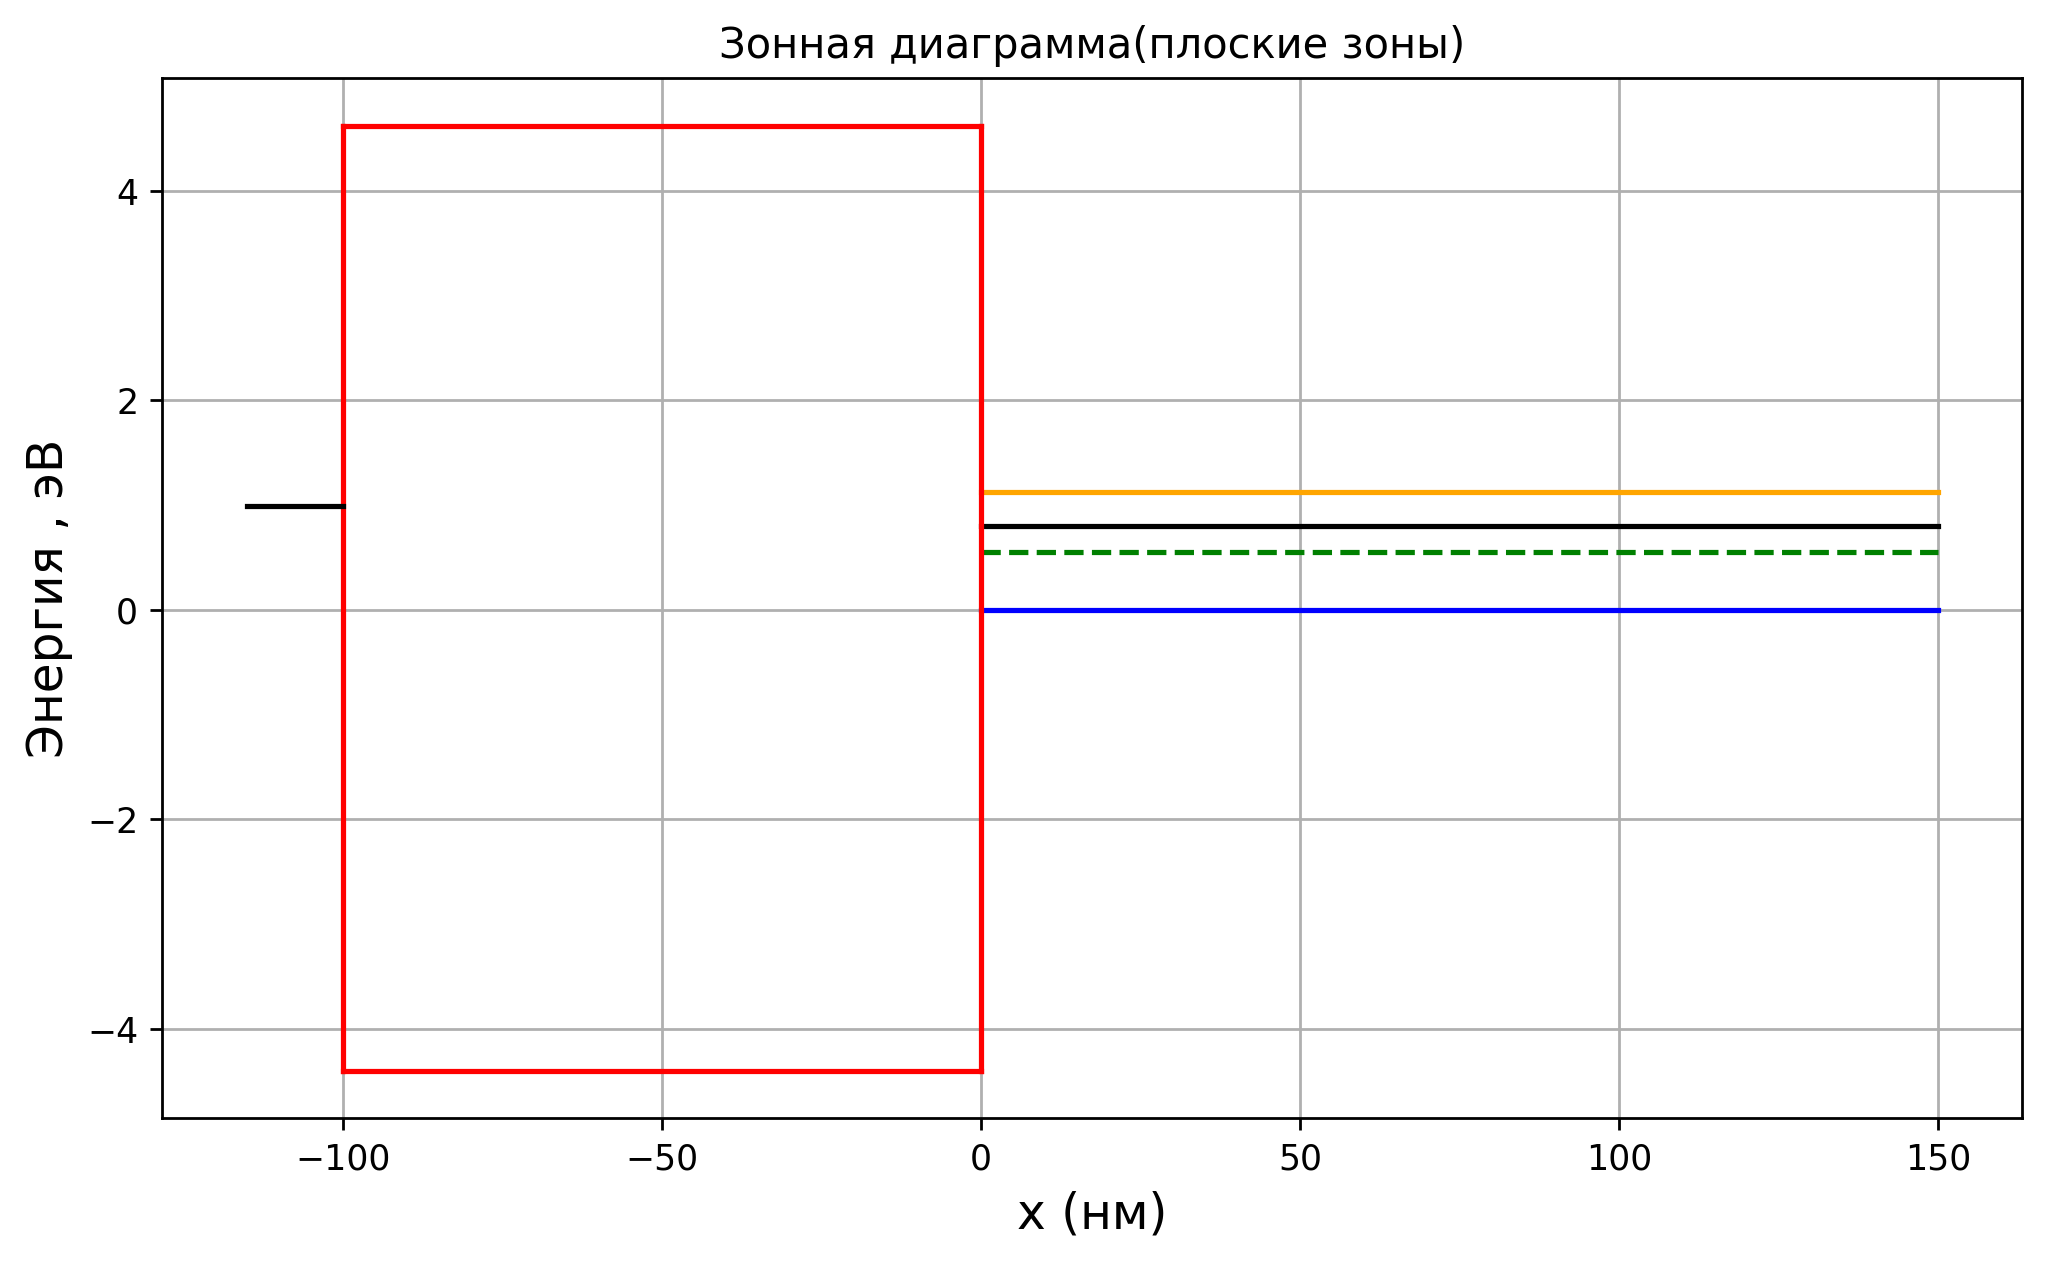

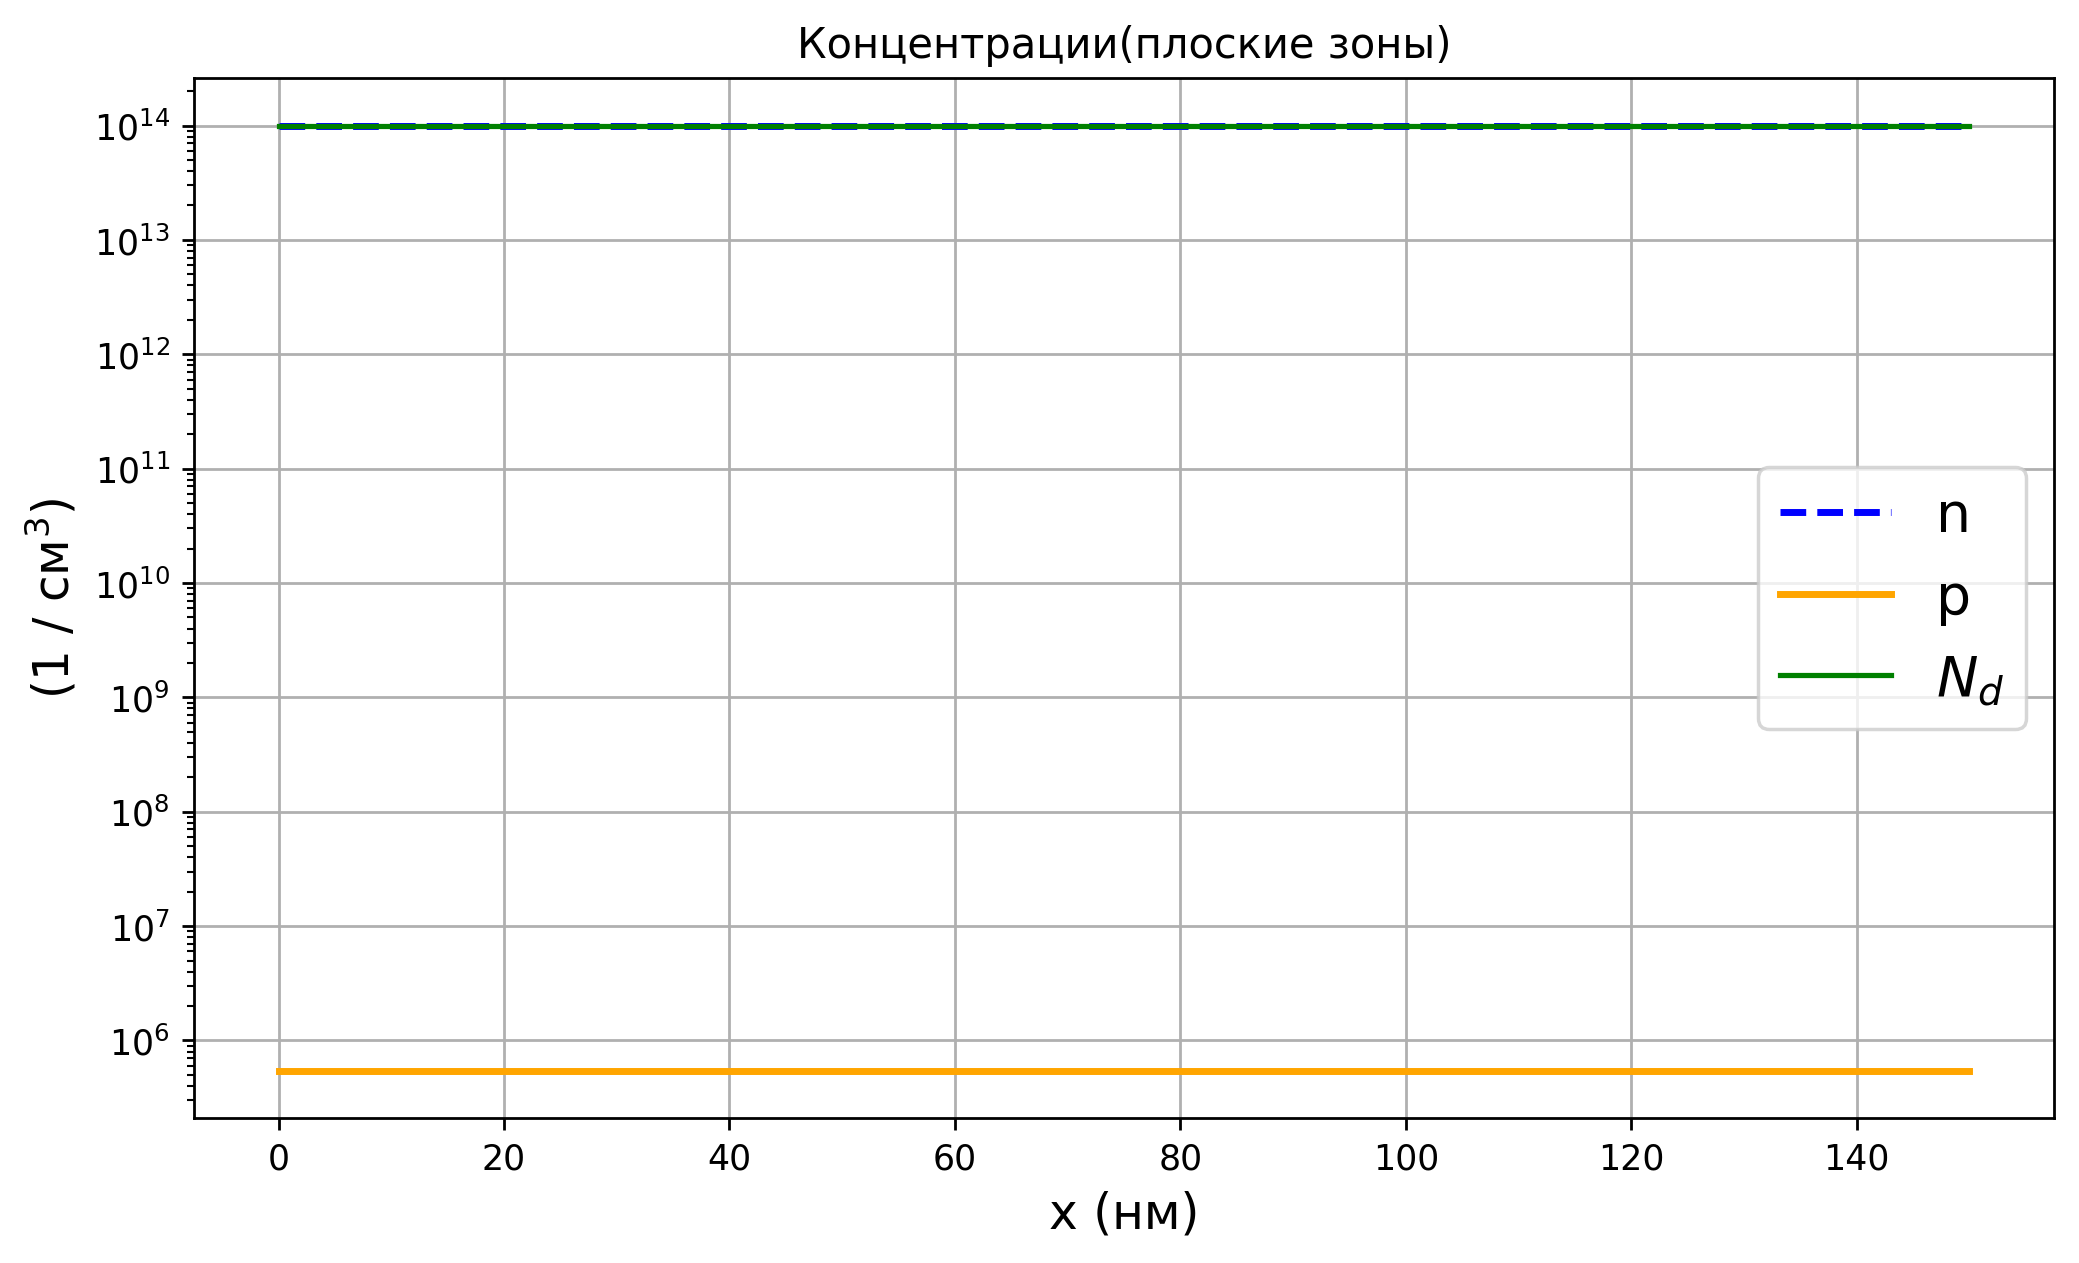

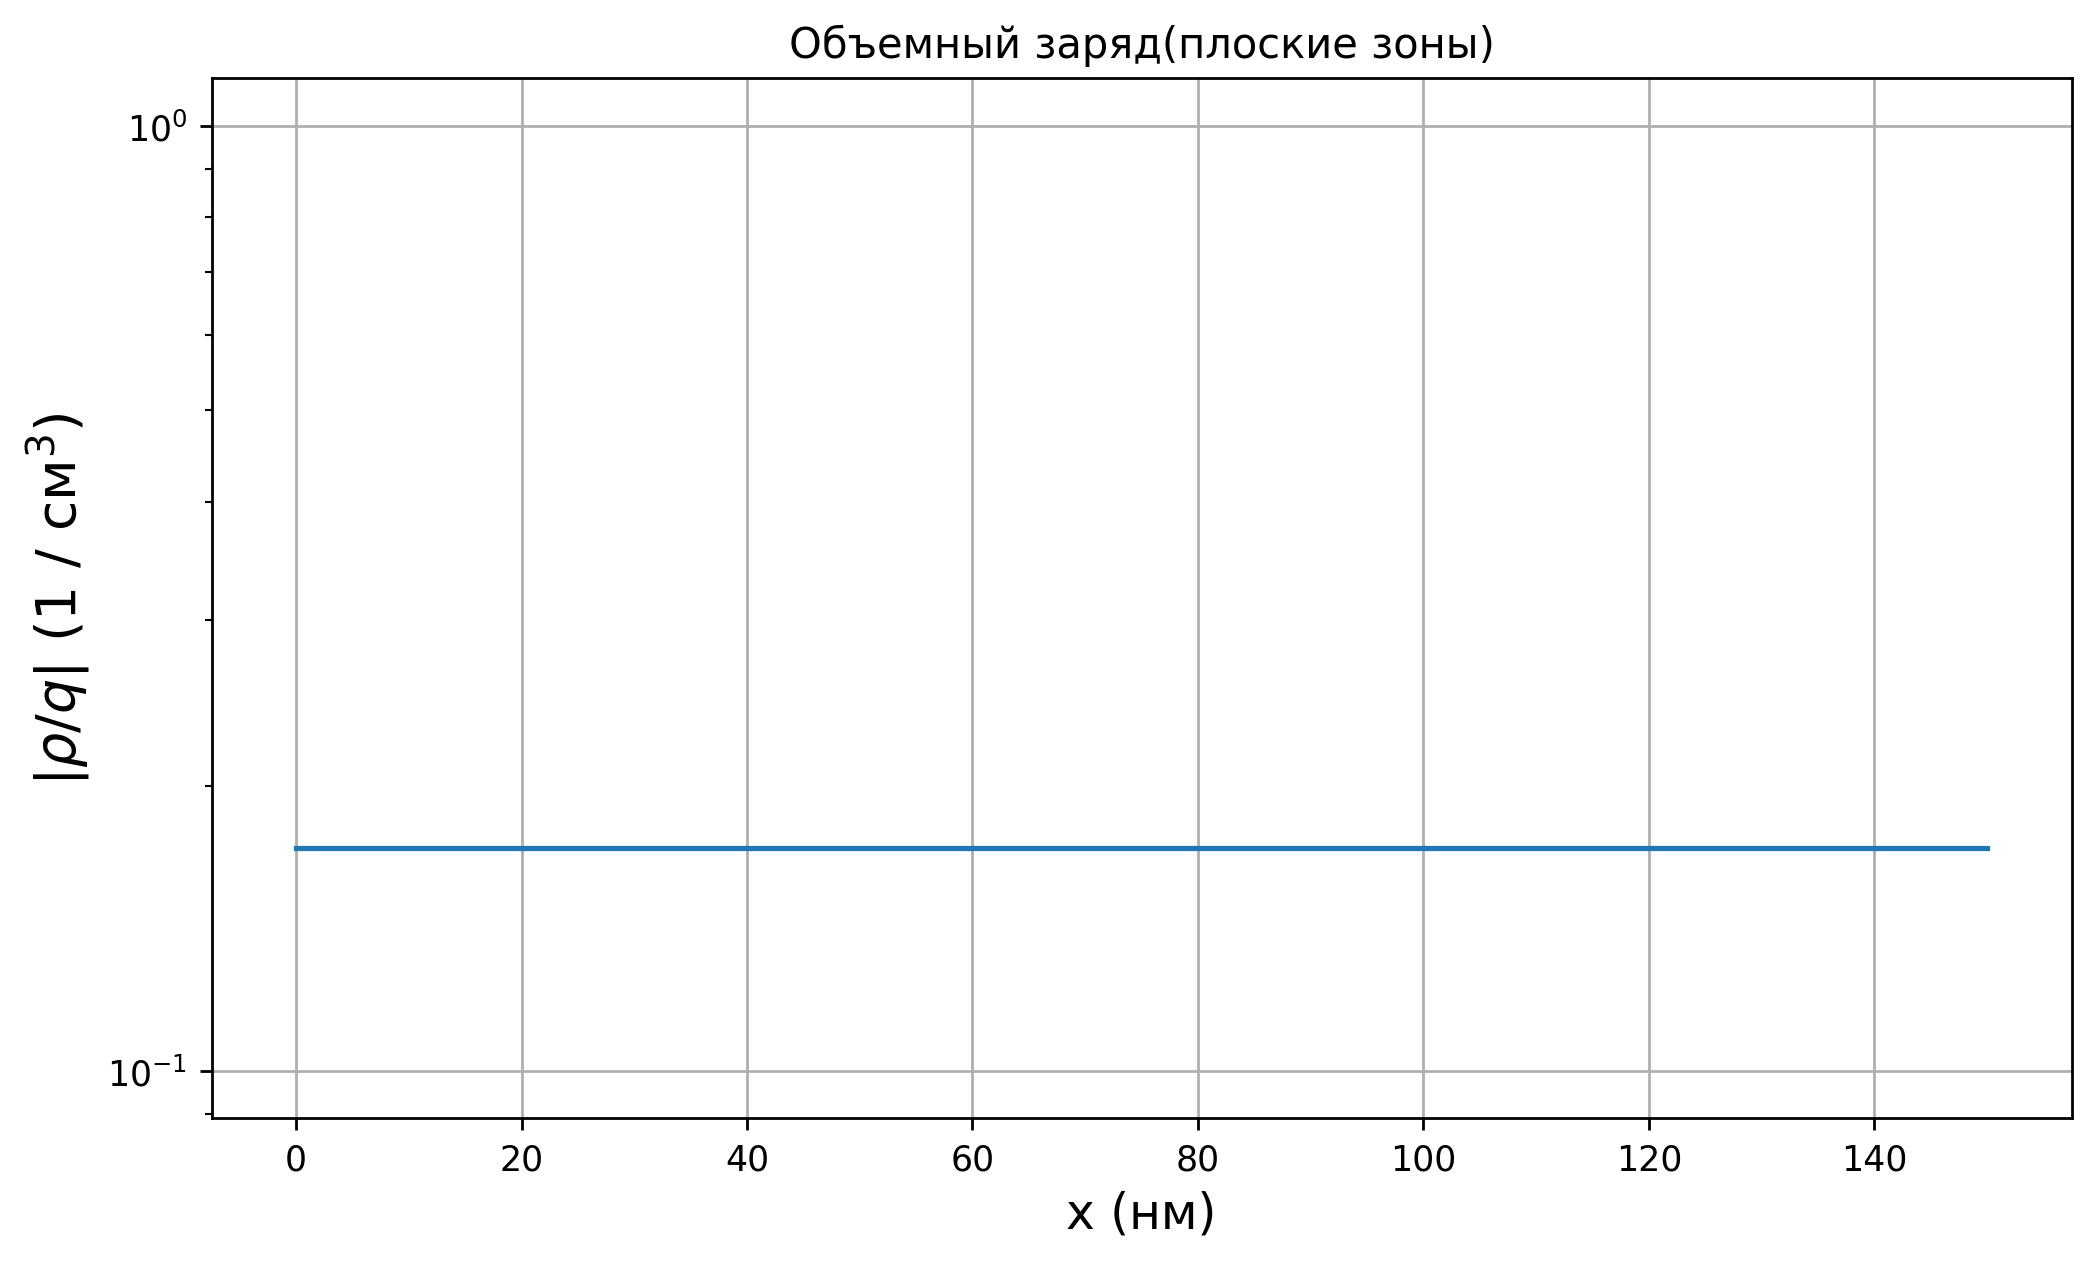

In [19]:
psis = 0                                                                 #(плоские зоны)

# график для зонной диаграммы 
fig, ax = plt.subplots() 
plt.figure(1)
ax.set_title('Зонная диаграмма(плоские зоны)')
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('Энергия , эВ', fontsize=14)
plt.grid(True)

# get psiox from the potential balance equation (see SPE derivation)
Vgb=SPE(psis,0)
psiox = Vgb - psis - Vfb

y, psi = compute_y_vs_psi(psis)
y = y / 100 * 1e9
toxnm = tox / 100 * 1e9

# зонная диаграмма п\п
plt.plot(y, Ev_mas[499] - psi, 'b')
plt.plot(y, Ei_mas[499] - psi, 'g--')
plt.plot(y, Ec_mas[499] - psi, 'orange')

# уровень ферми
plt.plot(y, 0 * y + F_mas[499], 'k')

#диаграмма оксида
plt.plot([0, 0], [Ev_mas[499] - psis - VBO, Ec_mas[499] - psis + CBO], 'r')
plt.plot([-toxnm, -toxnm],[Ev_mas[499] - psis - VBO - psiox, Ec_mas[499] - psis + CBO - psiox],  'r')
plt.plot([-toxnm, 0], [Ev_mas[499] - psis - VBO - psiox, Ev_mas[499] - psis - VBO], 'r')
plt.plot([-toxnm, 0], [Ec_mas[499] - psis + CBO - psiox, Ec_mas[499] - psis + CBO], 'r')

# уровень ферми метала
plt.plot(
    [-toxnm - 15, -toxnm], 
    [F_mas[499] - Vfb - psis - psiox, F_mas[499] - Vfb - psis - psiox],
    'k'
)
# концентрации
n = n_mas[499] * np.exp(psi / 0.026)
p = p_mas[499] * np.exp(-psi / 0.026)
rho_by_q = p - n + Nd - Na

fig, ax = plt.subplots() 
plt.figure(2)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('(1 / см$^3$)', fontsize=14)
plt.grid(True)
ax.set_title('Концентрации(плоские зоны)')
plt.semilogy(y, n,'b--', label='n', linewidth=2)
plt.semilogy(y, p,color = 'orange', label='p', linewidth=2)
plt.semilogy(y, Nd + 0 * y,color = 'green' ,label='$N_d$')
plt.legend(loc='best', prop={'size': 16})
#обемный заряд
fig, ax = plt.subplots() 
ax.set_title('Объемный заряд(плоские зоны)')
plt.figure(3)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('$|\\rho/q|$ (1 / см$^3$)', fontsize=16)
plt.grid(True)
tmp = plt.semilogy(y, np.abs(rho_by_q), label='$\\rho/q$')

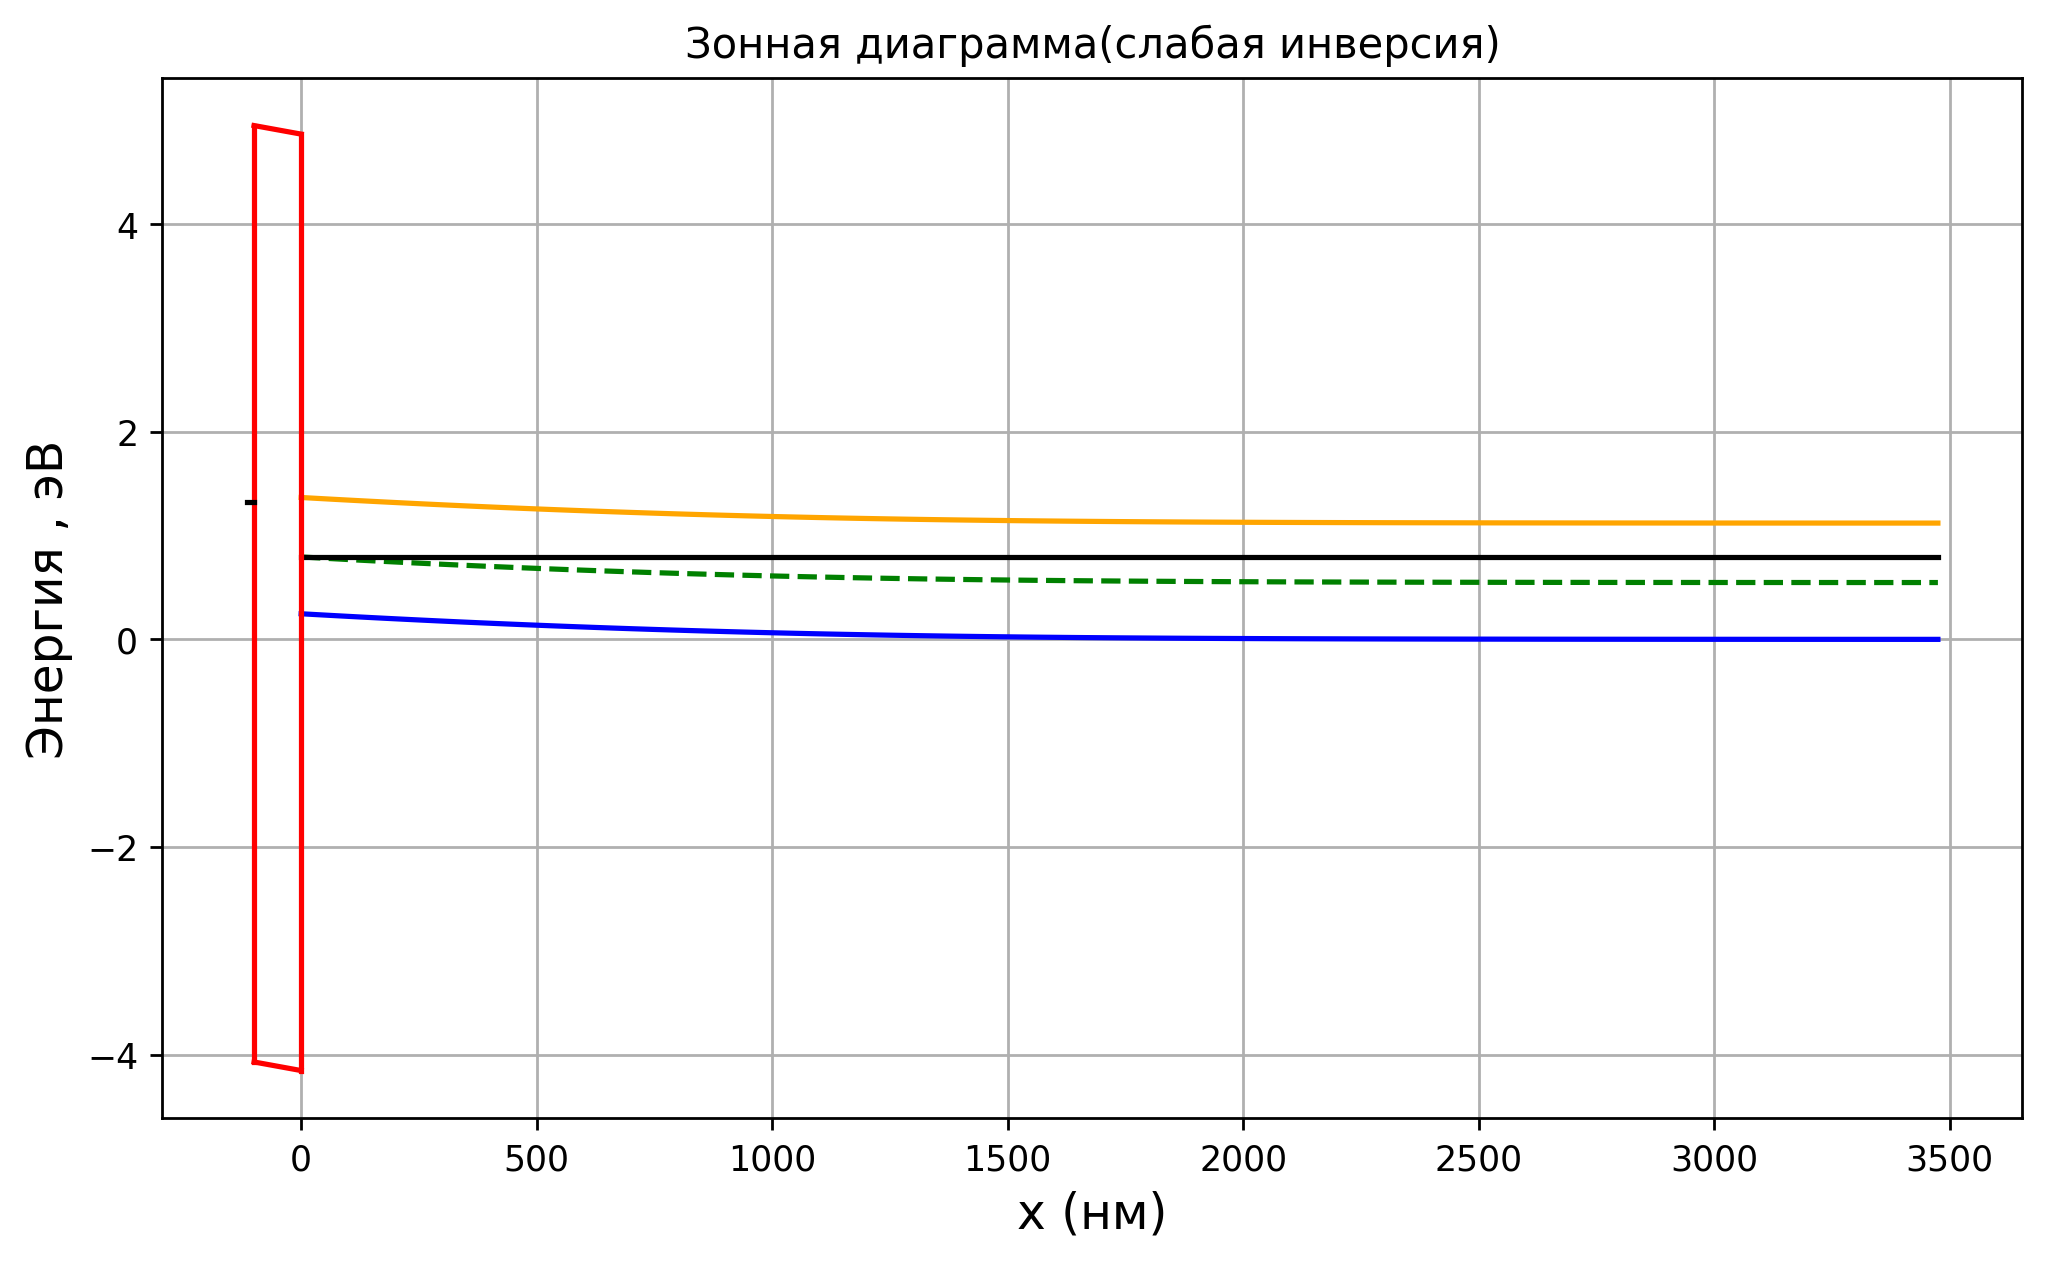

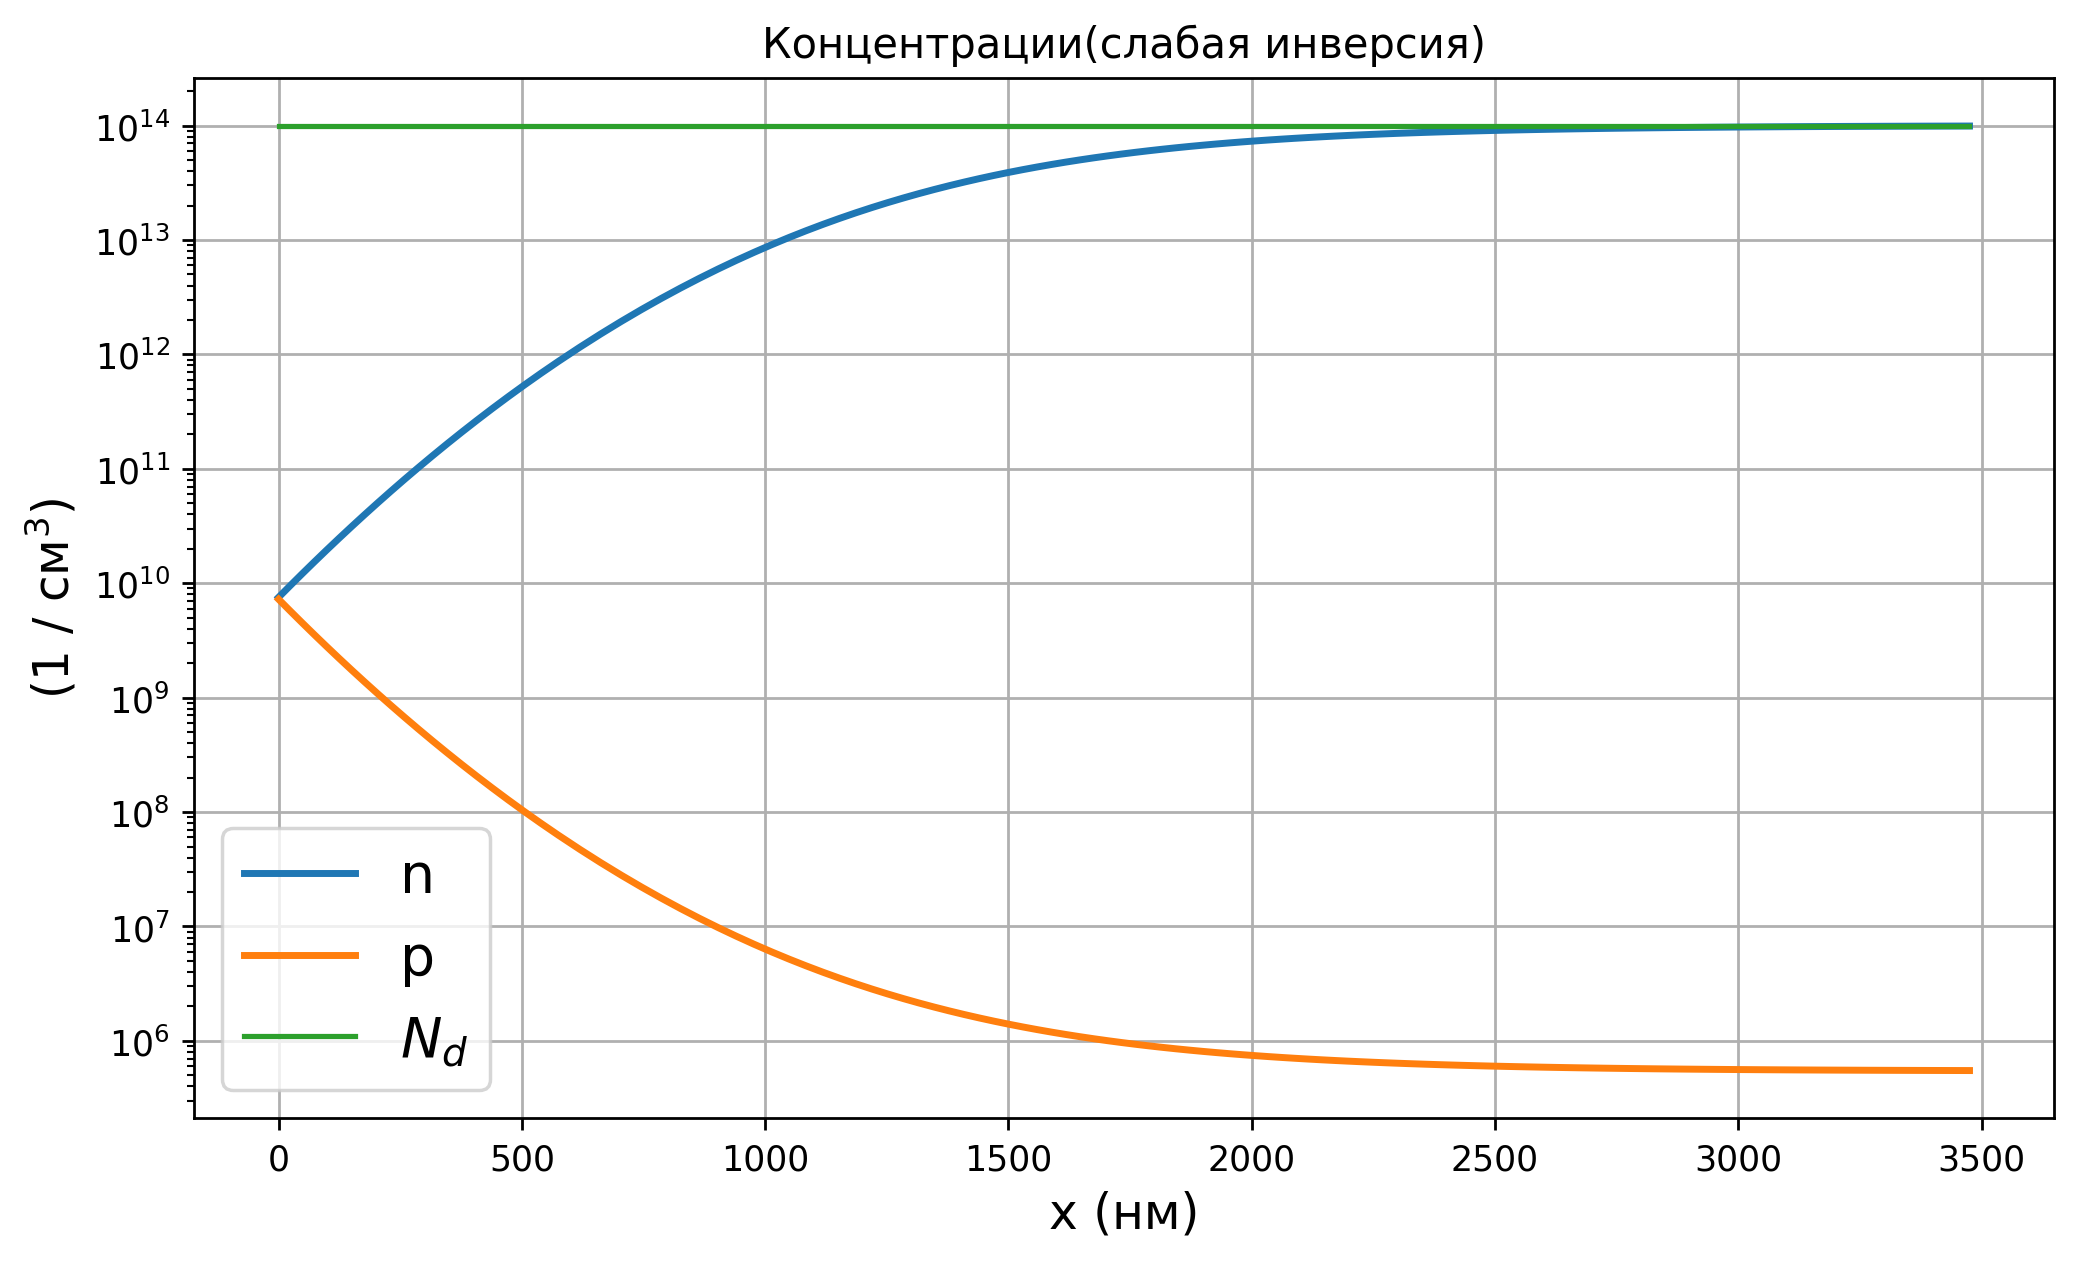

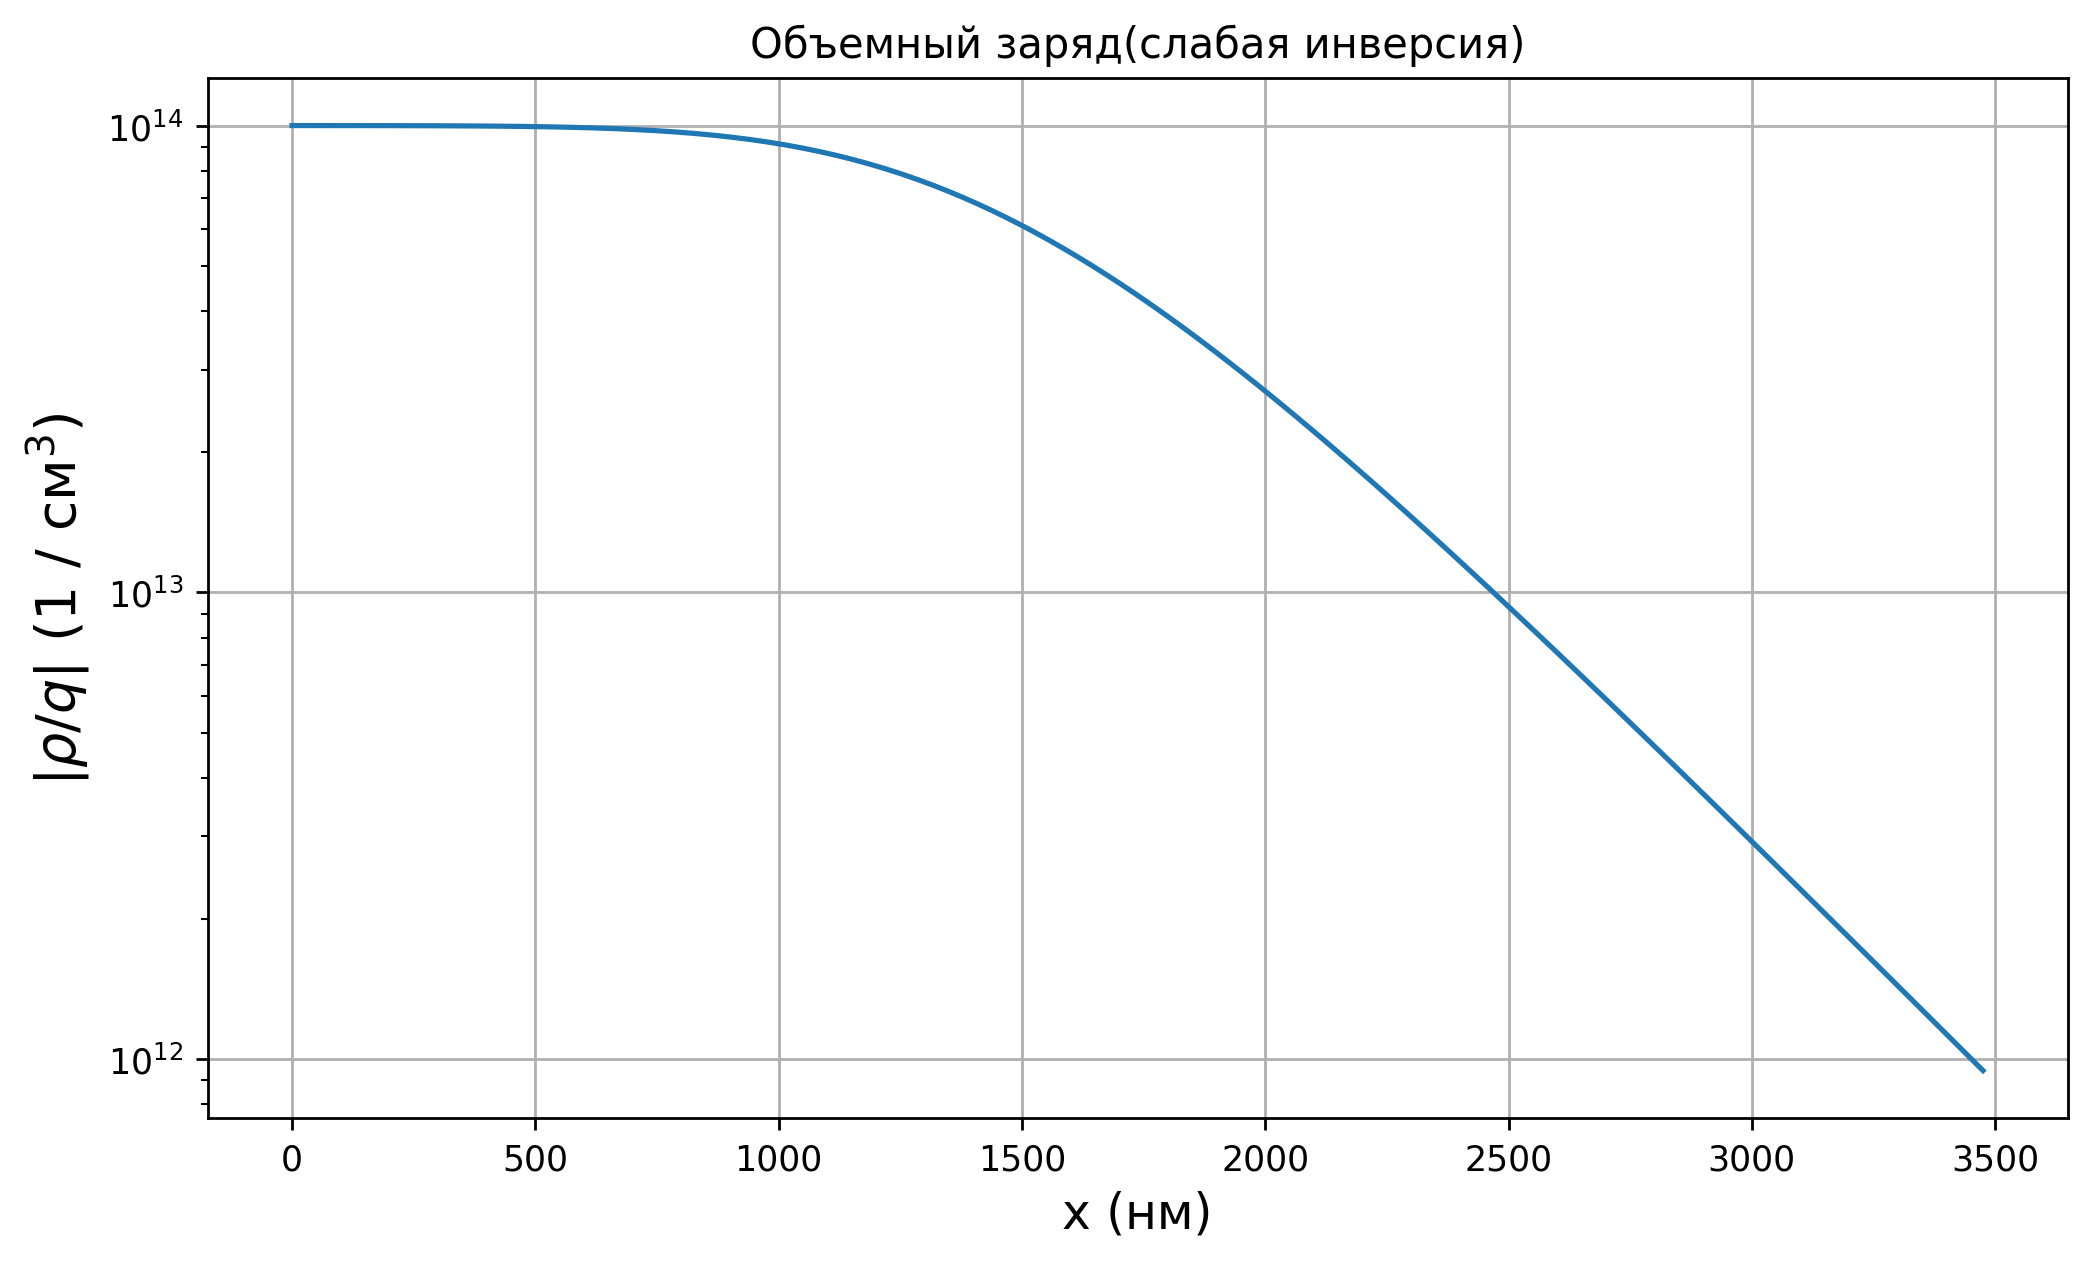

In [20]:

psis = Ei_mas[499] - F_mas[499]                                           #слабая инверсия 

# график для зонной диаграммы 
fig, ax = plt.subplots() 
plt.figure(1)
ax.set_title('Зонная диаграмма(слабая инверсия)')
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('Энергия , эВ', fontsize=14)
plt.grid(True)

# get psiox from the potential balance equation (see SPE derivation)
Vgb=SPE(psis,0)
psiox = Vgb - psis - Vfb

y, psi = compute_y_vs_psi(psis)
y = y / 100 * 1e9
toxnm = tox / 100 * 1e9

# зонная диаграмма п\п
plt.plot(y, Ev_mas[499] - psi, 'b')
plt.plot(y, Ei_mas[499] - psi, 'g--')
plt.plot(y, Ec_mas[499] - psi, 'orange')

# уровень ферми
plt.plot(y, 0 * y + F_mas[499], 'k')

#диаграмма оксида
plt.plot([0, 0], [Ev_mas[499] - psis - VBO, Ec_mas[499] - psis + CBO], 'r')
plt.plot([-toxnm, -toxnm],[Ev_mas[499] - psis - VBO - psiox, Ec_mas[499] - psis + CBO - psiox],  'r')
plt.plot([-toxnm, 0], [Ev_mas[499] - psis - VBO - psiox, Ev_mas[499] - psis - VBO], 'r')
plt.plot([-toxnm, 0], [Ec_mas[499] - psis + CBO - psiox, Ec_mas[499] - psis + CBO], 'r')

# уровень ферми метала
plt.plot(
    [-toxnm - 15, -toxnm], 
    [F_mas[499] - Vfb - psis - psiox, F_mas[499] - Vfb - psis - psiox],
    'k'
)
# концентрации
n = n_mas[499] * np.exp(psi / 0.026)
p = p_mas[499] * np.exp(-psi / 0.026)
rho_by_q = p - n + Nd - Na

fig, ax = plt.subplots() 
plt.figure(2)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('(1 / см$^3$)', fontsize=14)
plt.grid(True)
ax.set_title('Концентрации(слабая инверсия)')
plt.semilogy(y, n, label='n', linewidth=2)
plt.semilogy(y, p, label='p', linewidth=2)
plt.semilogy(y, Nd + 0 * y, label='$N_d$')
plt.legend(loc='best', prop={'size': 16})
#обемный заряд
fig, ax = plt.subplots() 
ax.set_title('Объемный заряд(слабая инверсия)')
plt.figure(3)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('$|\\rho/q|$ (1 / см$^3$)', fontsize=16)
plt.grid(True)
tmp = plt.semilogy(y, np.abs(rho_by_q), label='$\\rho/q$')

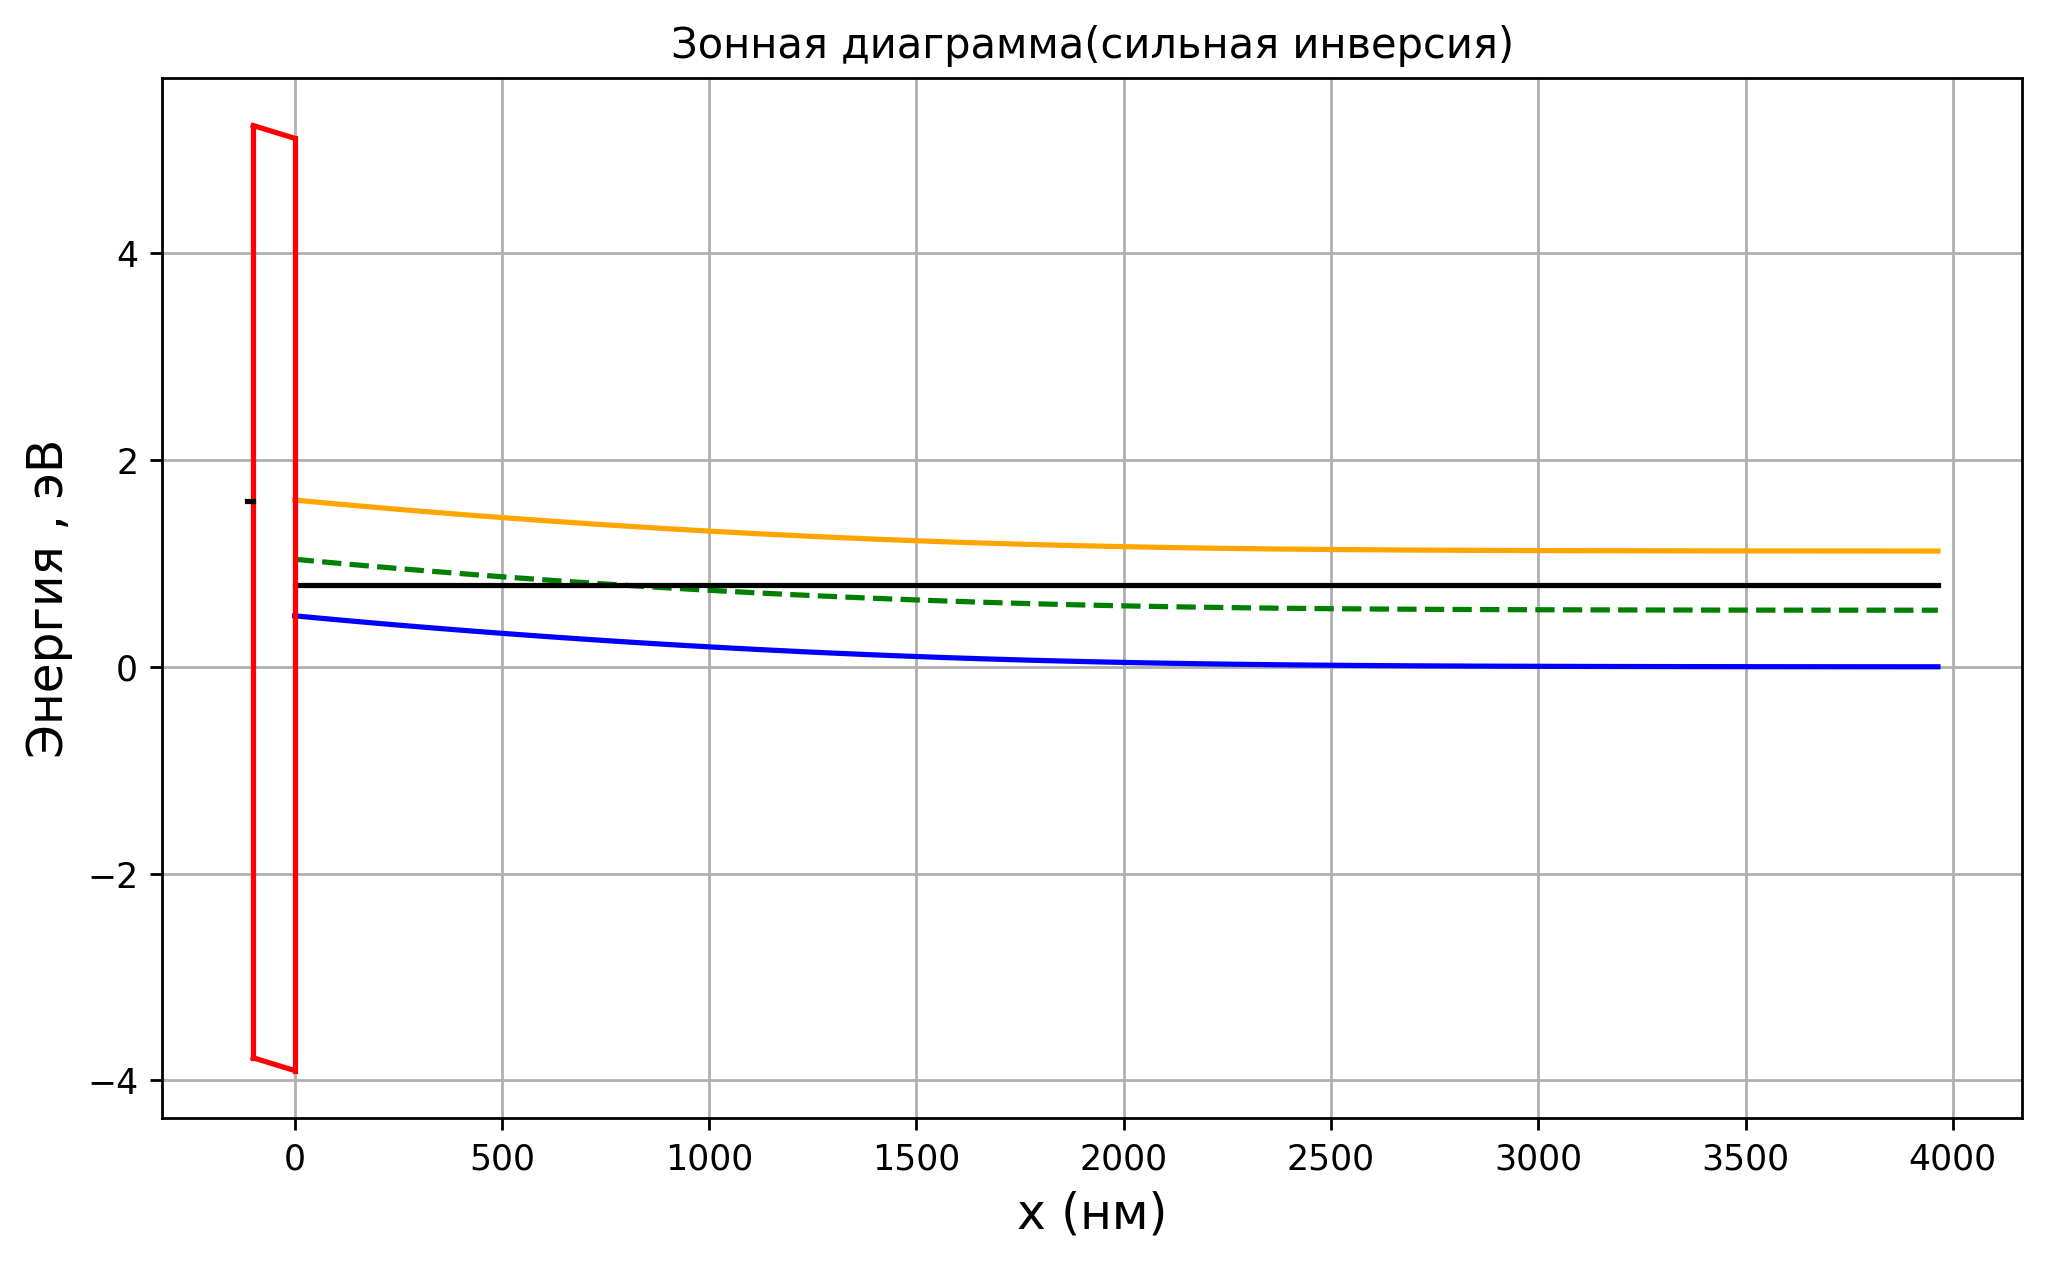

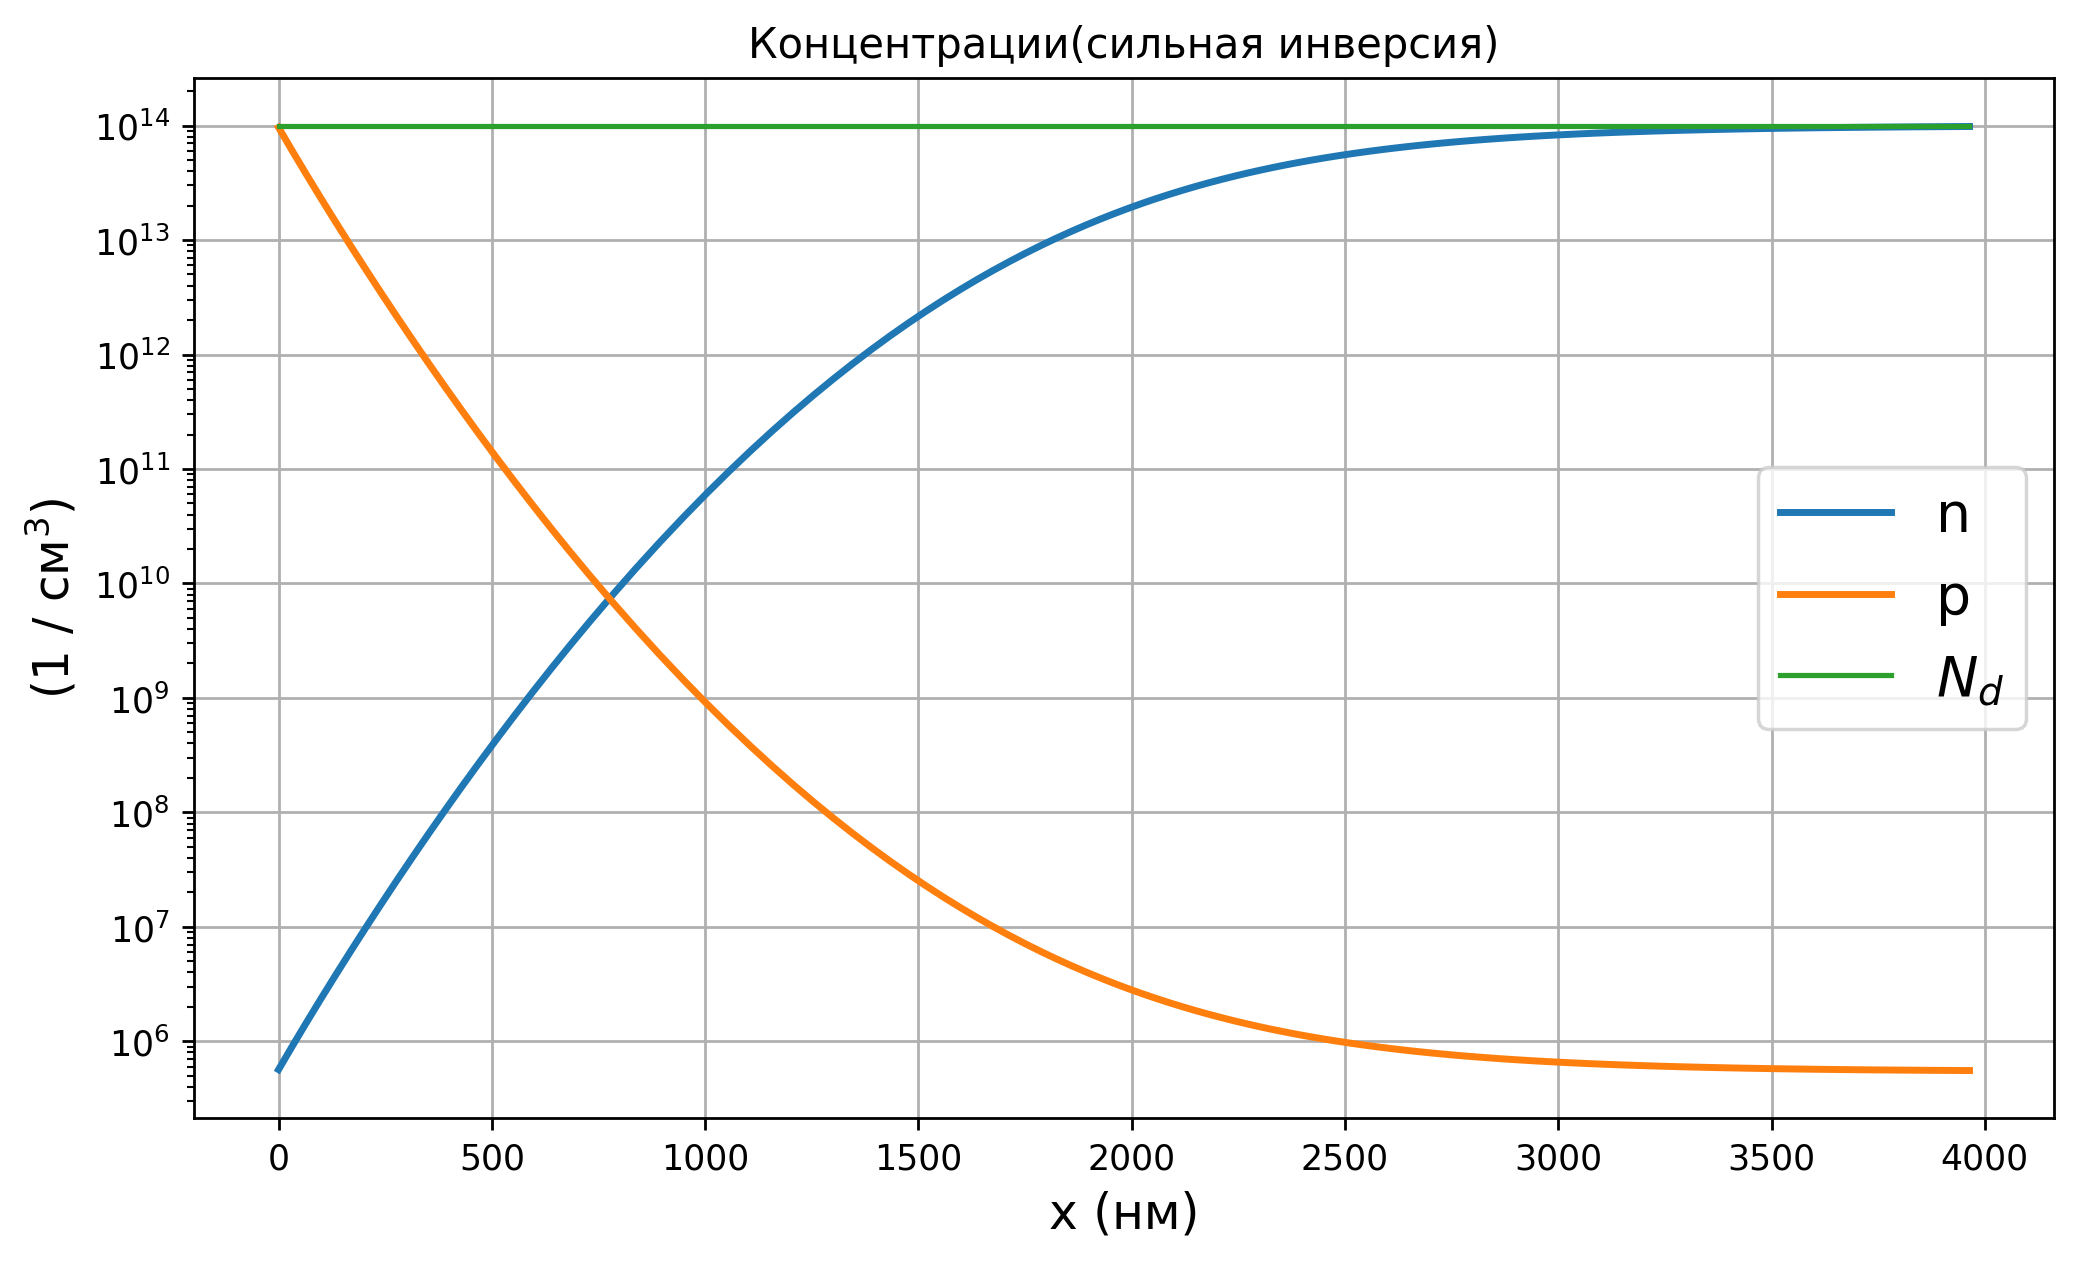

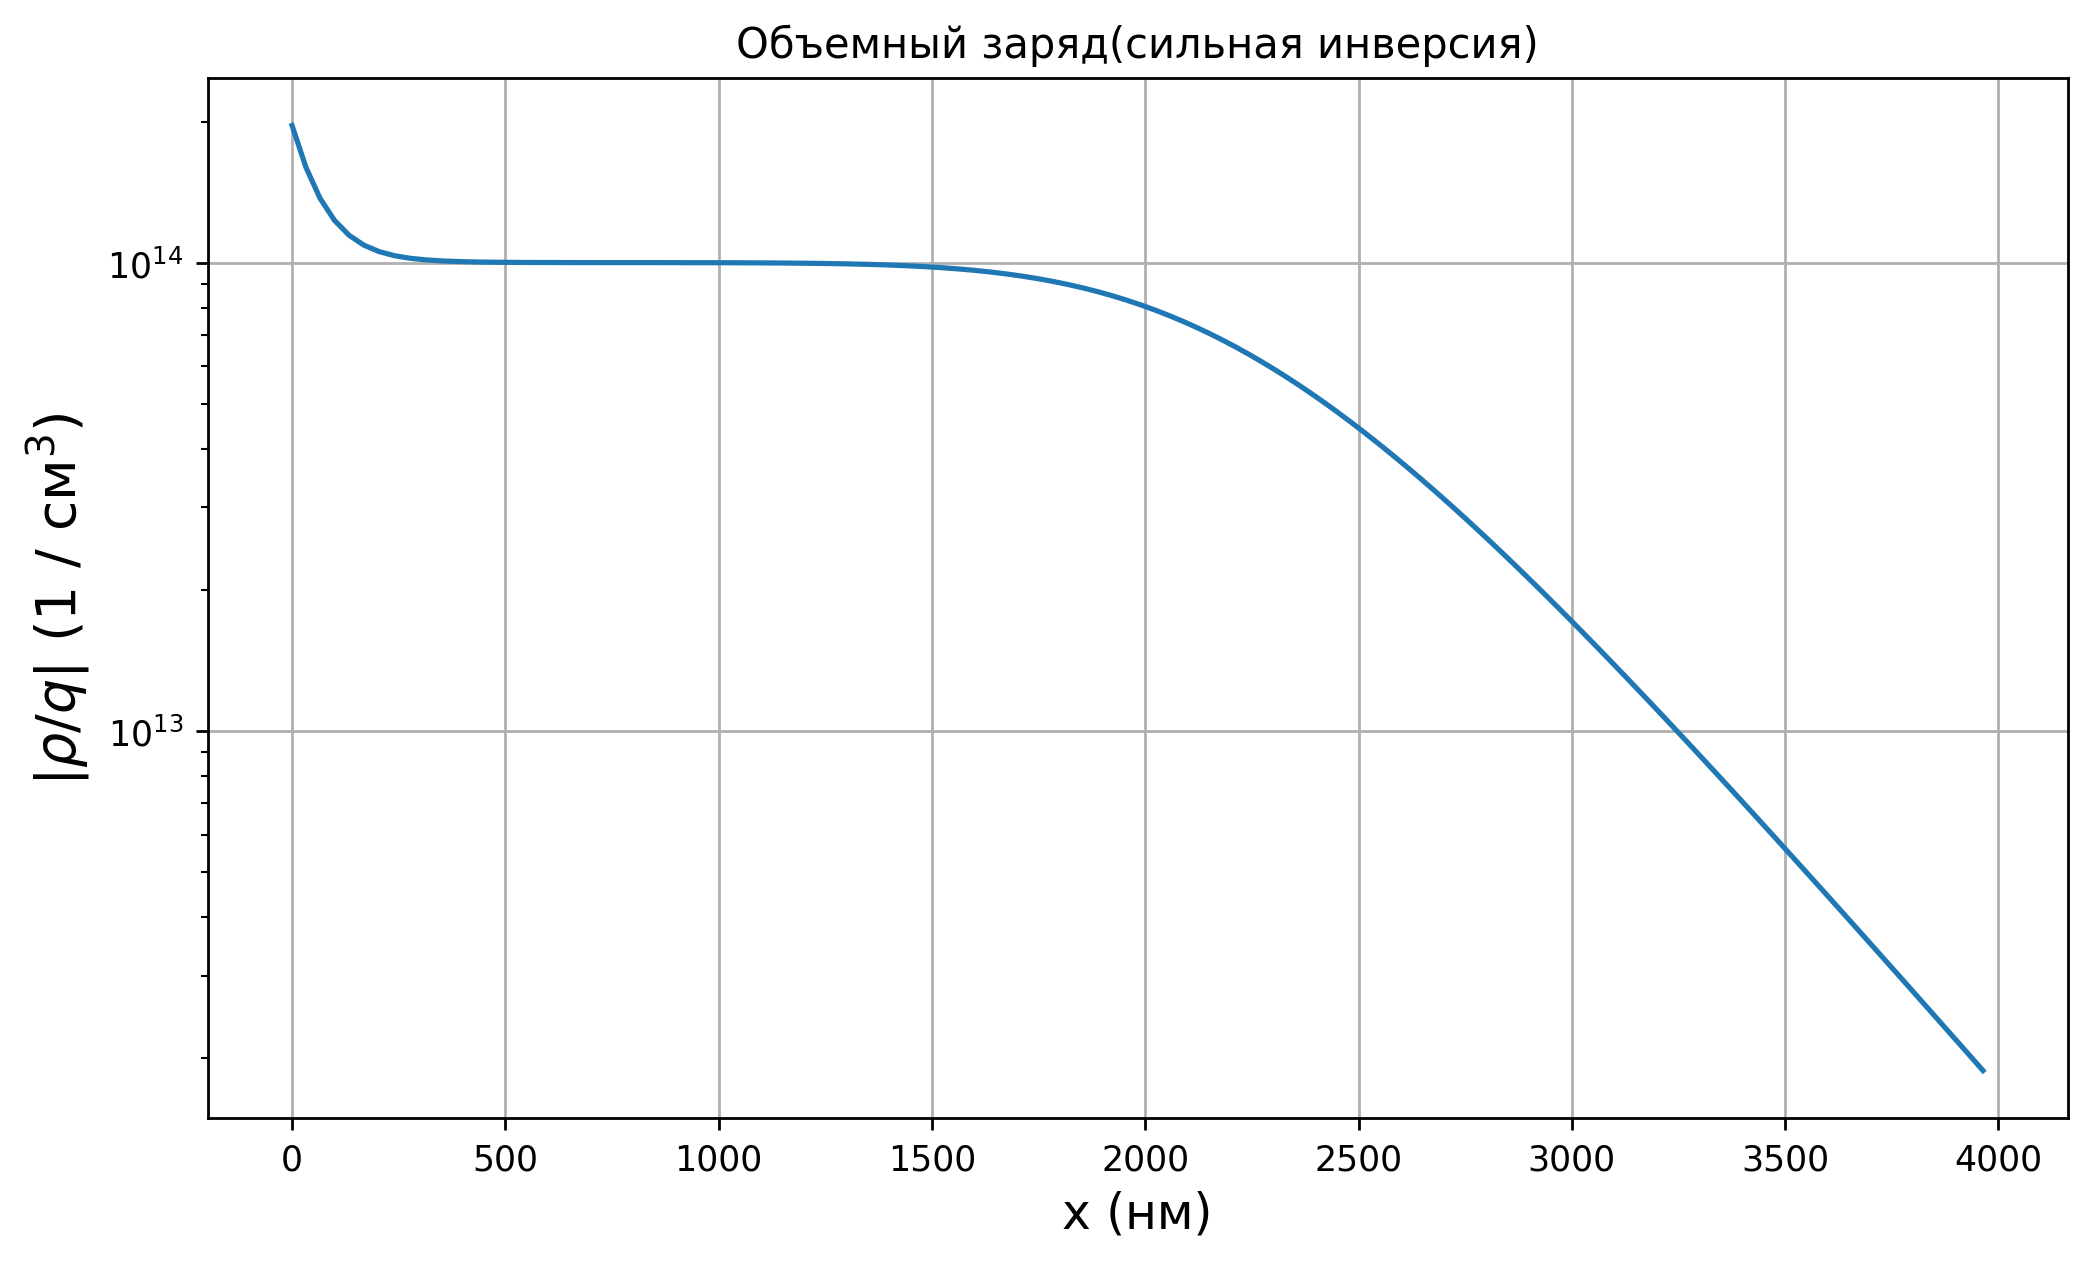

In [21]:


psis = 2 * (Ei_mas[499] - F_mas[499])                                     #сильная инверсия


# график для зонной диаграммы 
fig, ax = plt.subplots() 
plt.figure(1)
ax.set_title('Зонная диаграмма(сильная инверсия)')
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('Энергия , эВ', fontsize=14)
plt.grid(True)

# get psiox from the potential balance equation (see SPE derivation)
Vgb=SPE(psis,0)
psiox = Vgb - psis - Vfb

y, psi = compute_y_vs_psi(psis)
y = y / 100 * 1e9
toxnm = tox / 100 * 1e9

# зонная диаграмма п\п
plt.plot(y, Ev_mas[499] - psi, 'b')
plt.plot(y, Ei_mas[499] - psi, 'g--')
plt.plot(y, Ec_mas[499] - psi, 'orange')

# уровень ферми
plt.plot(y, 0 * y + F_mas[499], 'k')

#диаграмма оксида
plt.plot([0, 0], [Ev_mas[499] - psis - VBO, Ec_mas[499] - psis + CBO], 'r')
plt.plot([-toxnm, -toxnm],[Ev_mas[499] - psis - VBO - psiox, Ec_mas[499] - psis + CBO - psiox],  'r')
plt.plot([-toxnm, 0], [Ev_mas[499] - psis - VBO - psiox, Ev_mas[499] - psis - VBO], 'r')
plt.plot([-toxnm, 0], [Ec_mas[499] - psis + CBO - psiox, Ec_mas[499] - psis + CBO], 'r')

# уровень ферми метала
plt.plot(
    [-toxnm - 15, -toxnm], 
    [F_mas[499] - Vfb - psis - psiox, F_mas[499] - Vfb - psis - psiox],
    'k'
)
# концентрации
n = n_mas[499] * np.exp(psi / 0.026)
p = p_mas[499] * np.exp(-psi / 0.026)
rho_by_q = p - n + Nd - Na

fig, ax = plt.subplots() 
plt.figure(2)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('(1 / см$^3$)', fontsize=14)
plt.grid(True)
ax.set_title('Концентрации(сильная инверсия)')
plt.semilogy(y, n, label='n', linewidth=2)
plt.semilogy(y, p, label='p', linewidth=2)
plt.semilogy(y, Nd + 0 * y, label='$N_d$')
plt.legend(loc='best', prop={'size': 16})
#обемный заряд
fig, ax = plt.subplots() 
ax.set_title('Объемный заряд(сильная инверсия)')
plt.figure(3)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('$|\\rho/q|$ (1 / см$^3$)', fontsize=16)
plt.grid(True)
tmp = plt.semilogy(y, np.abs(rho_by_q), label='$\\rho/q$')

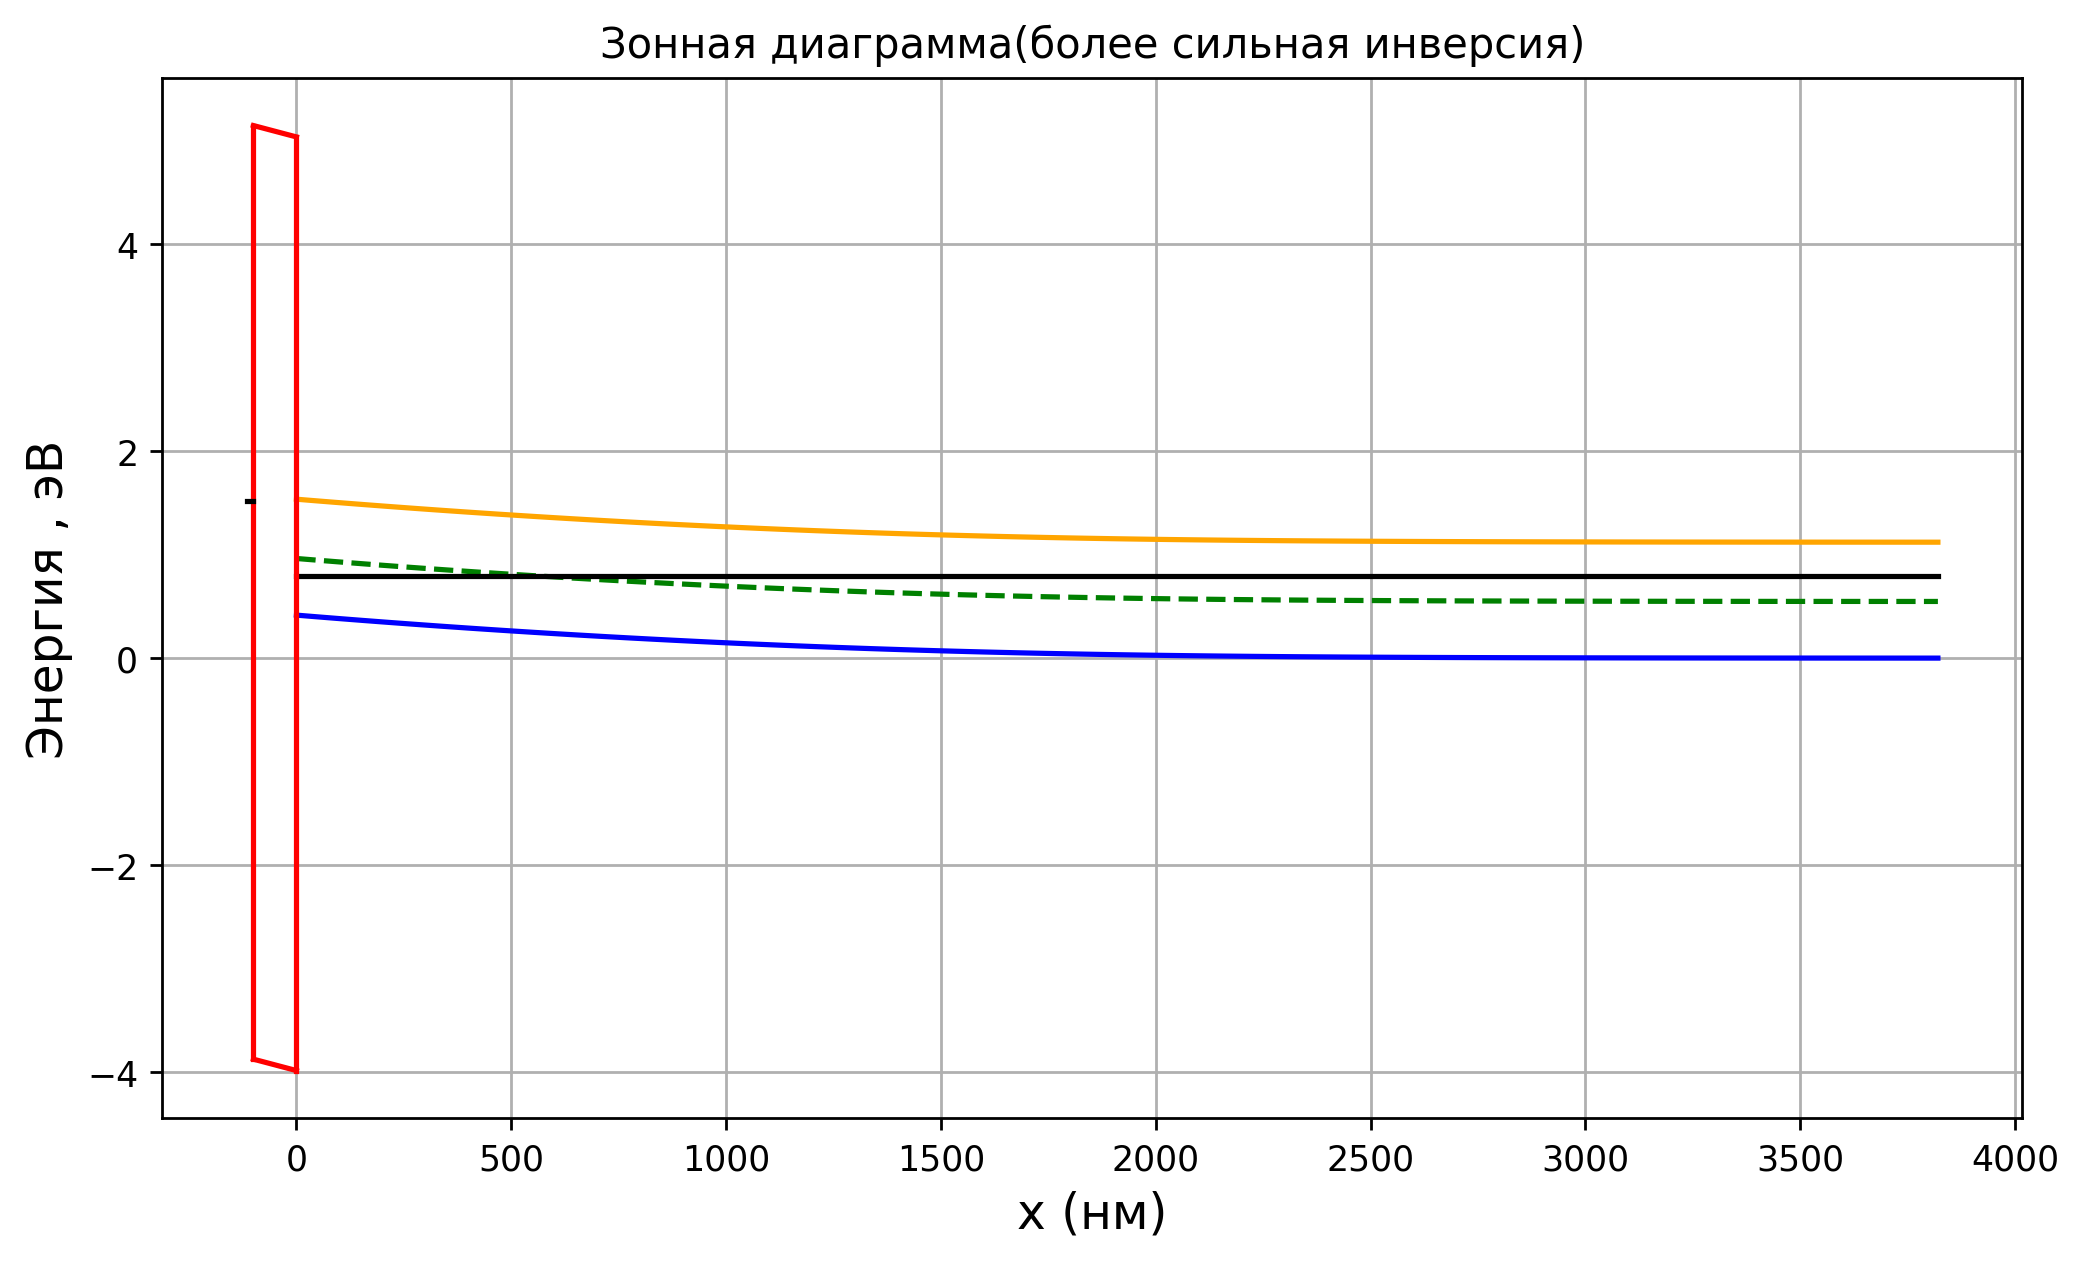

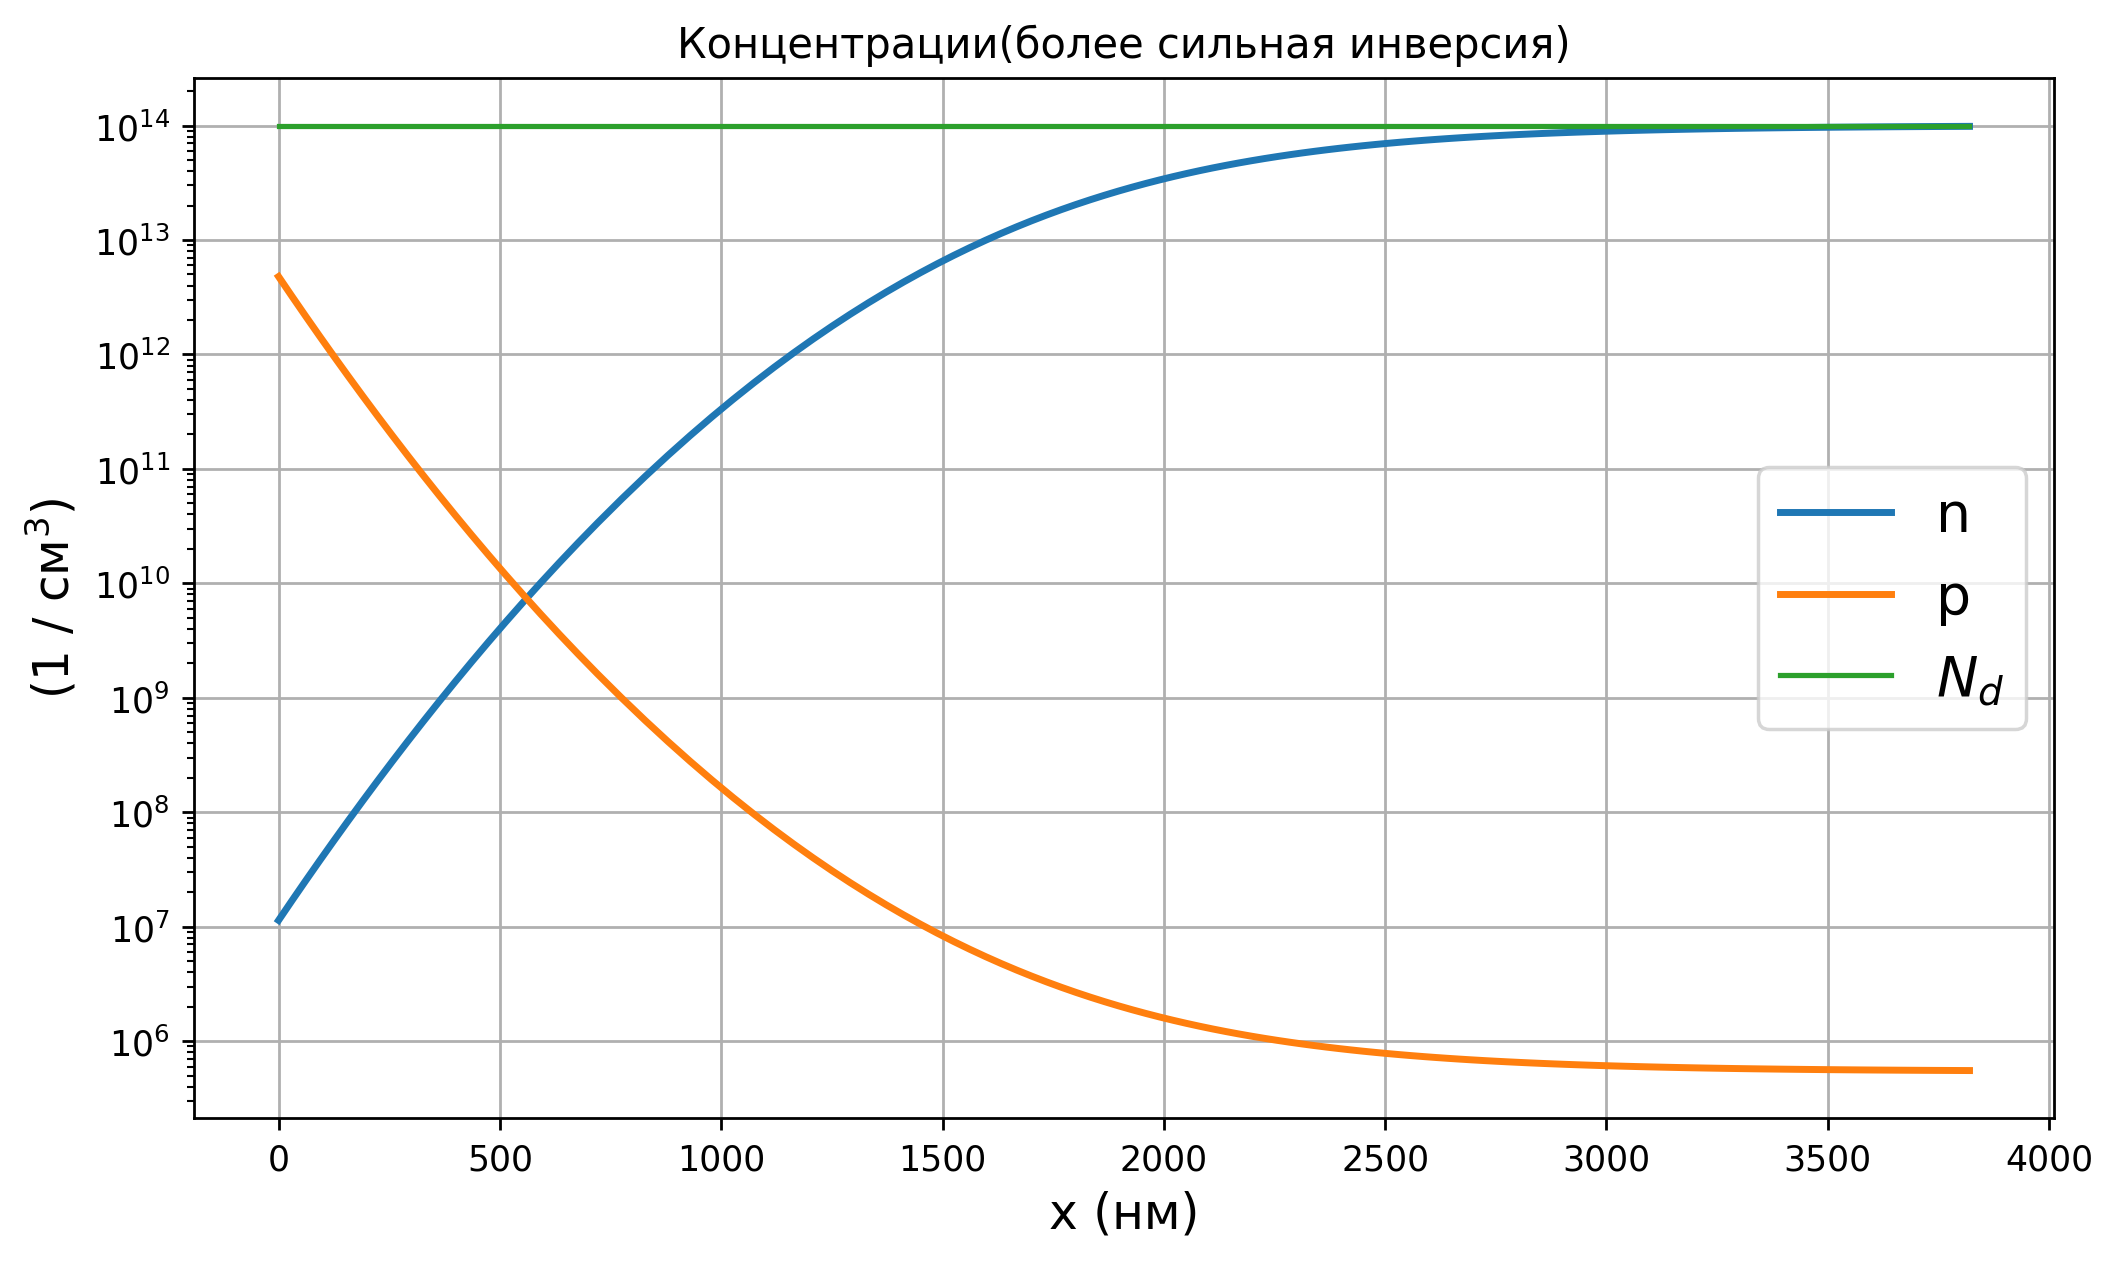

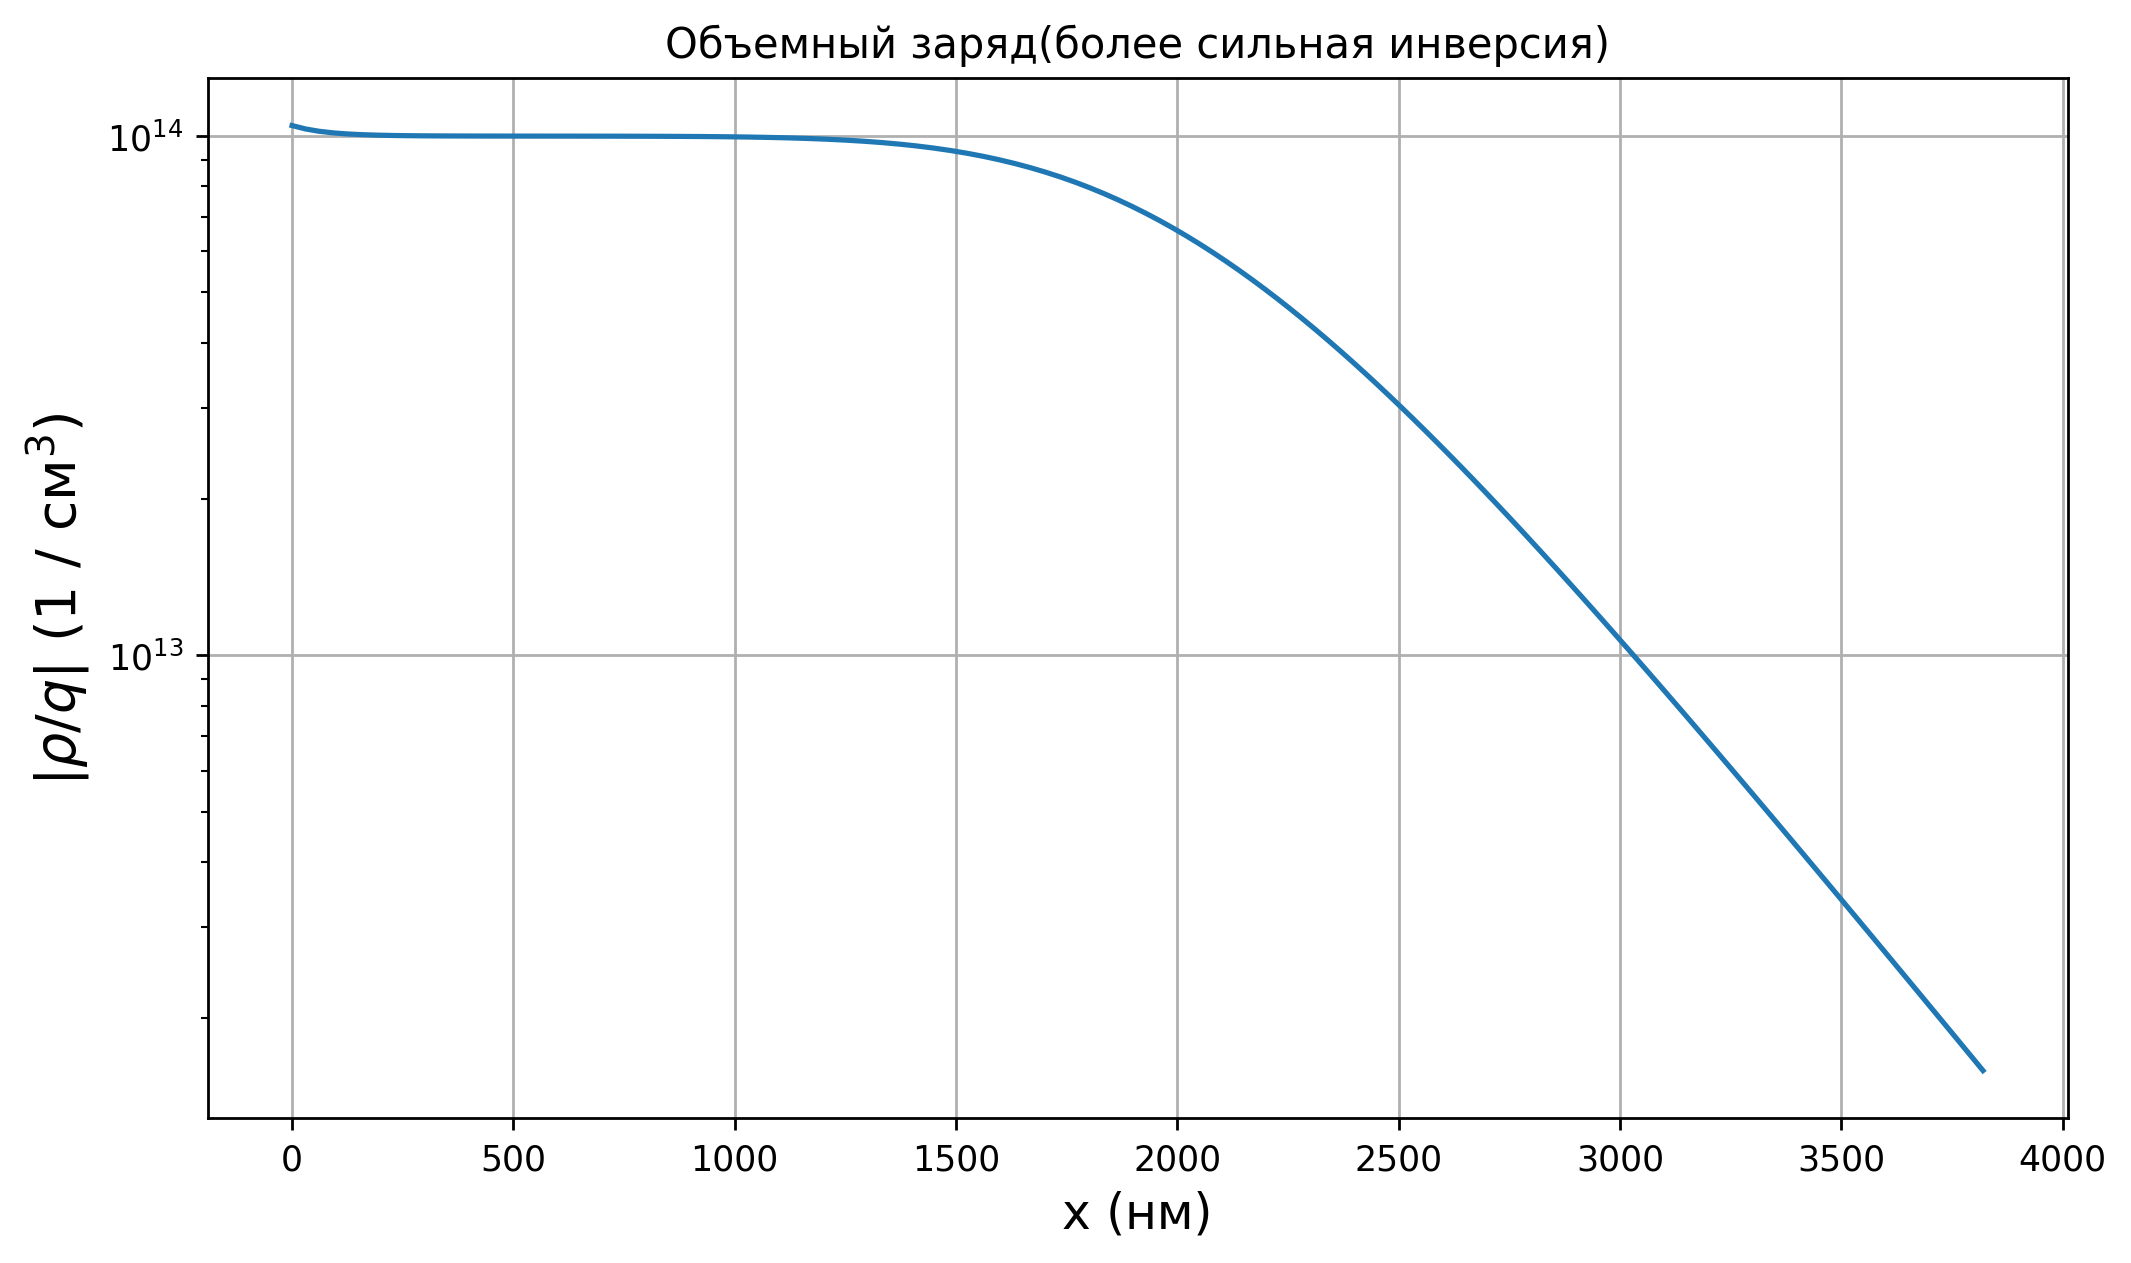

In [22]:



psis = 2 * (Ei_mas[499] - F_mas[499]) + 3 * 0.026                         #более сильная инверсия

# график для зонной диаграммы 
fig, ax = plt.subplots() 
plt.figure(1)
ax.set_title('Зонная диаграмма(более сильная инверсия)')
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('Энергия , эВ', fontsize=14)
plt.grid(True)

# get psiox from the potential balance equation (see SPE derivation)
Vgb=SPE(psis,0)
psiox = Vgb - psis - Vfb

y, psi = compute_y_vs_psi(psis)
y = y / 100 * 1e9
toxnm = tox / 100 * 1e9

# зонная диаграмма п\п
plt.plot(y, Ev_mas[499] - psi, 'b')
plt.plot(y, Ei_mas[499] - psi, 'g--')
plt.plot(y, Ec_mas[499] - psi, 'orange')

# уровень ферми
plt.plot(y, 0 * y + F_mas[499], 'k')

#диаграмма оксида
plt.plot([0, 0], [Ev_mas[499] - psis - VBO, Ec_mas[499] - psis + CBO], 'r')
plt.plot([-toxnm, -toxnm],[Ev_mas[499] - psis - VBO - psiox, Ec_mas[499] - psis + CBO - psiox],  'r')
plt.plot([-toxnm, 0], [Ev_mas[499] - psis - VBO - psiox, Ev_mas[499] - psis - VBO], 'r')
plt.plot([-toxnm, 0], [Ec_mas[499] - psis + CBO - psiox, Ec_mas[499] - psis + CBO], 'r')

# уровень ферми метала
plt.plot(
    [-toxnm - 15, -toxnm], 
    [F_mas[499] - Vfb - psis - psiox, F_mas[499] - Vfb - psis - psiox],
    'k'
)
# концентрации
n = n_mas[499] * np.exp(psi / 0.026)
p = p_mas[499] * np.exp(-psi / 0.026)
rho_by_q = p - n + Nd - Na

fig, ax = plt.subplots() 
plt.figure(2)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('(1 / см$^3$)', fontsize=14)
plt.grid(True)
ax.set_title('Концентрации(более сильная инверсия)')
plt.semilogy(y, n, label='n', linewidth=2)
plt.semilogy(y, p, label='p', linewidth=2)
plt.semilogy(y, Nd + 0 * y, label='$N_d$')
plt.legend(loc='best', prop={'size': 16})
#обемный заряд
fig, ax = plt.subplots() 
ax.set_title('Объемный заряд(более сильная инверсия)')
plt.figure(3)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('$|\\rho/q|$ (1 / см$^3$)', fontsize=16)
plt.grid(True)
tmp = plt.semilogy(y, np.abs(rho_by_q), label='$\\rho/q$')

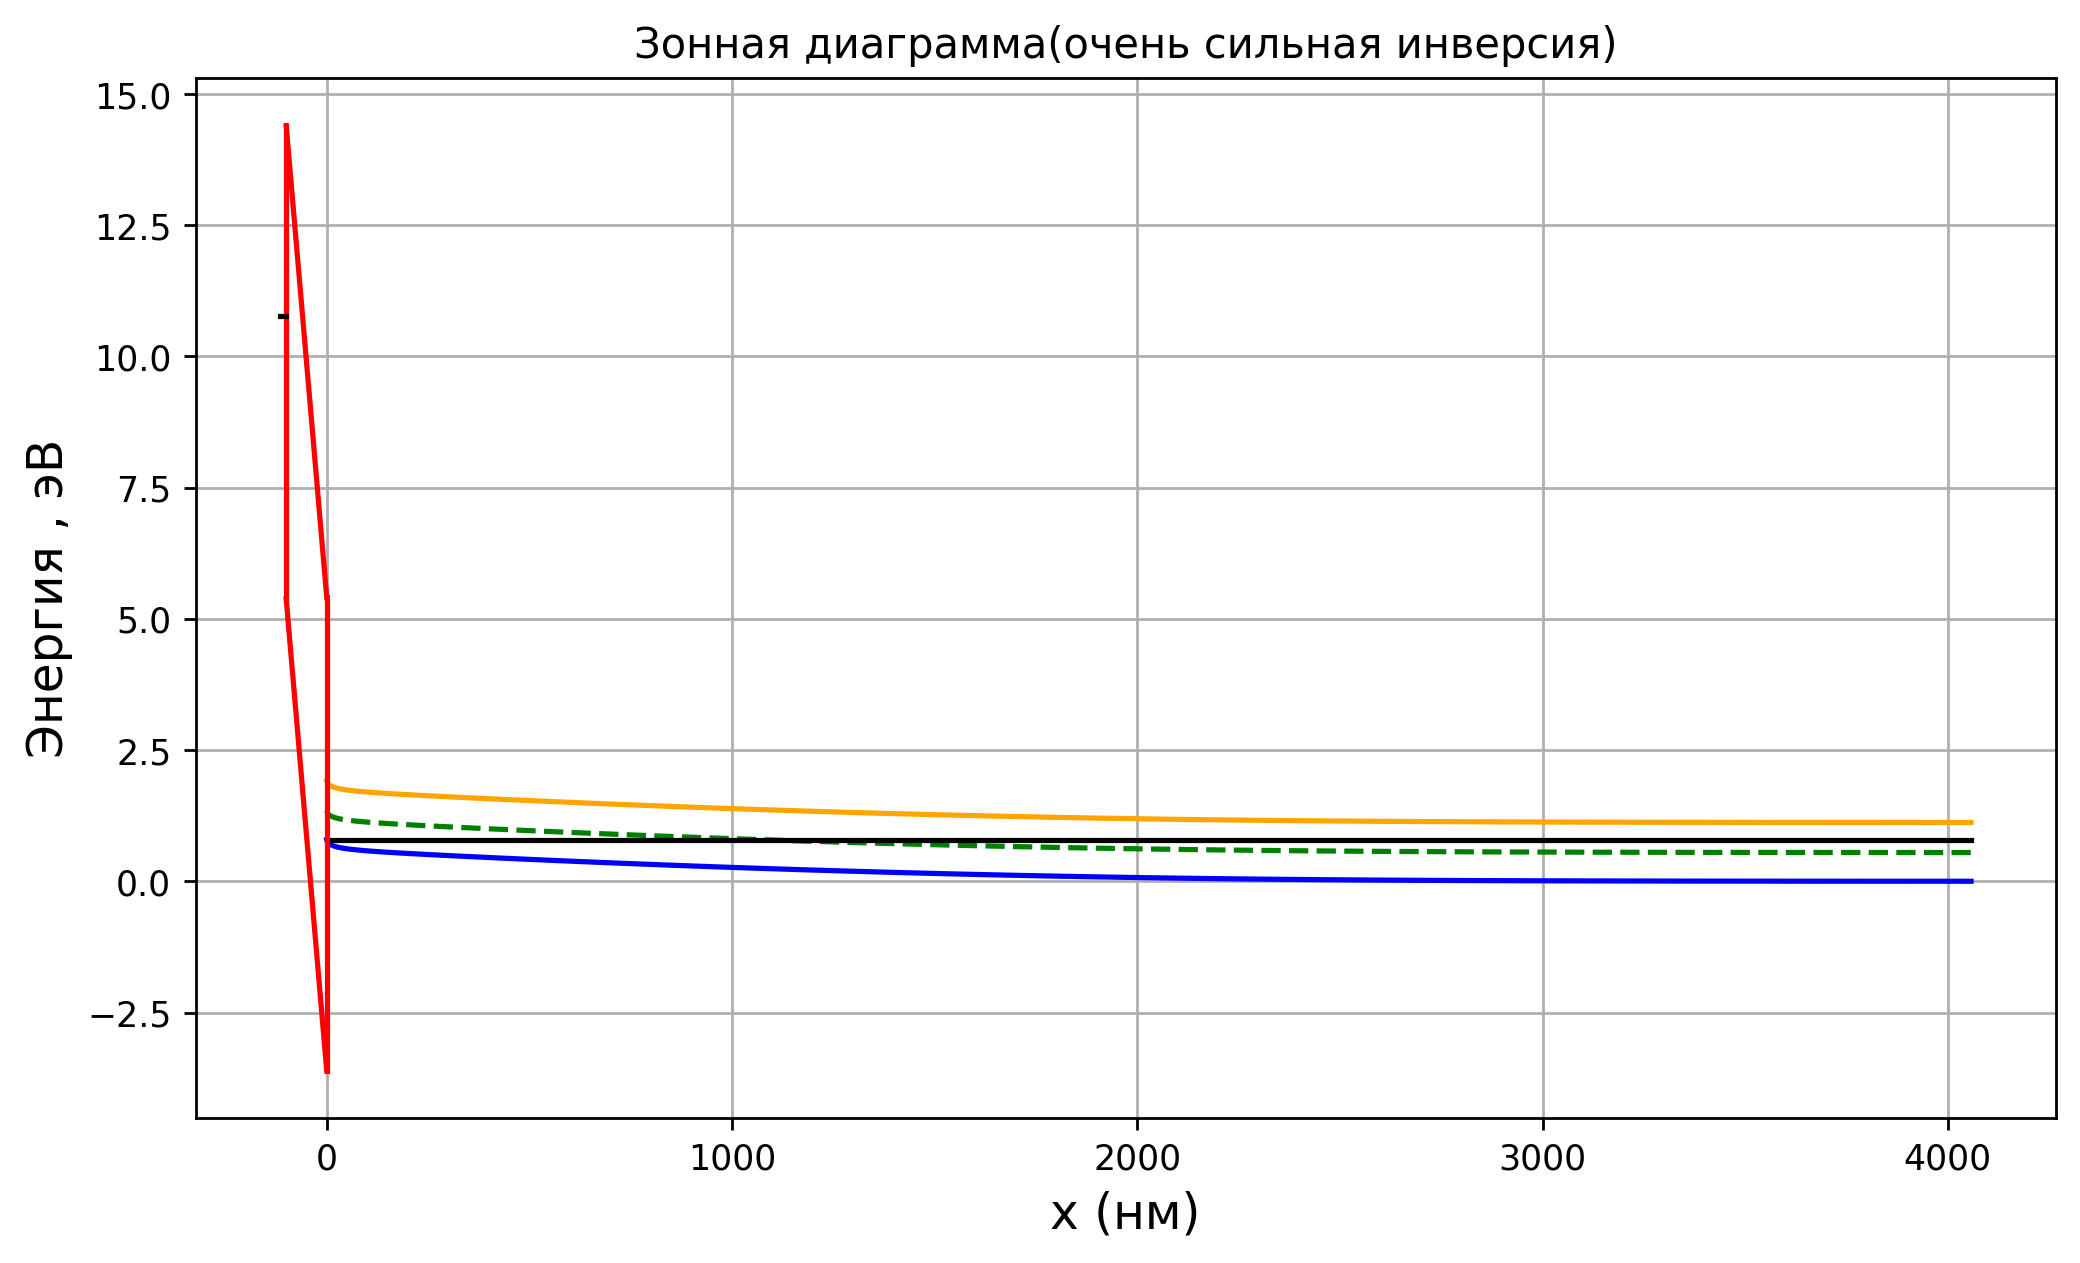

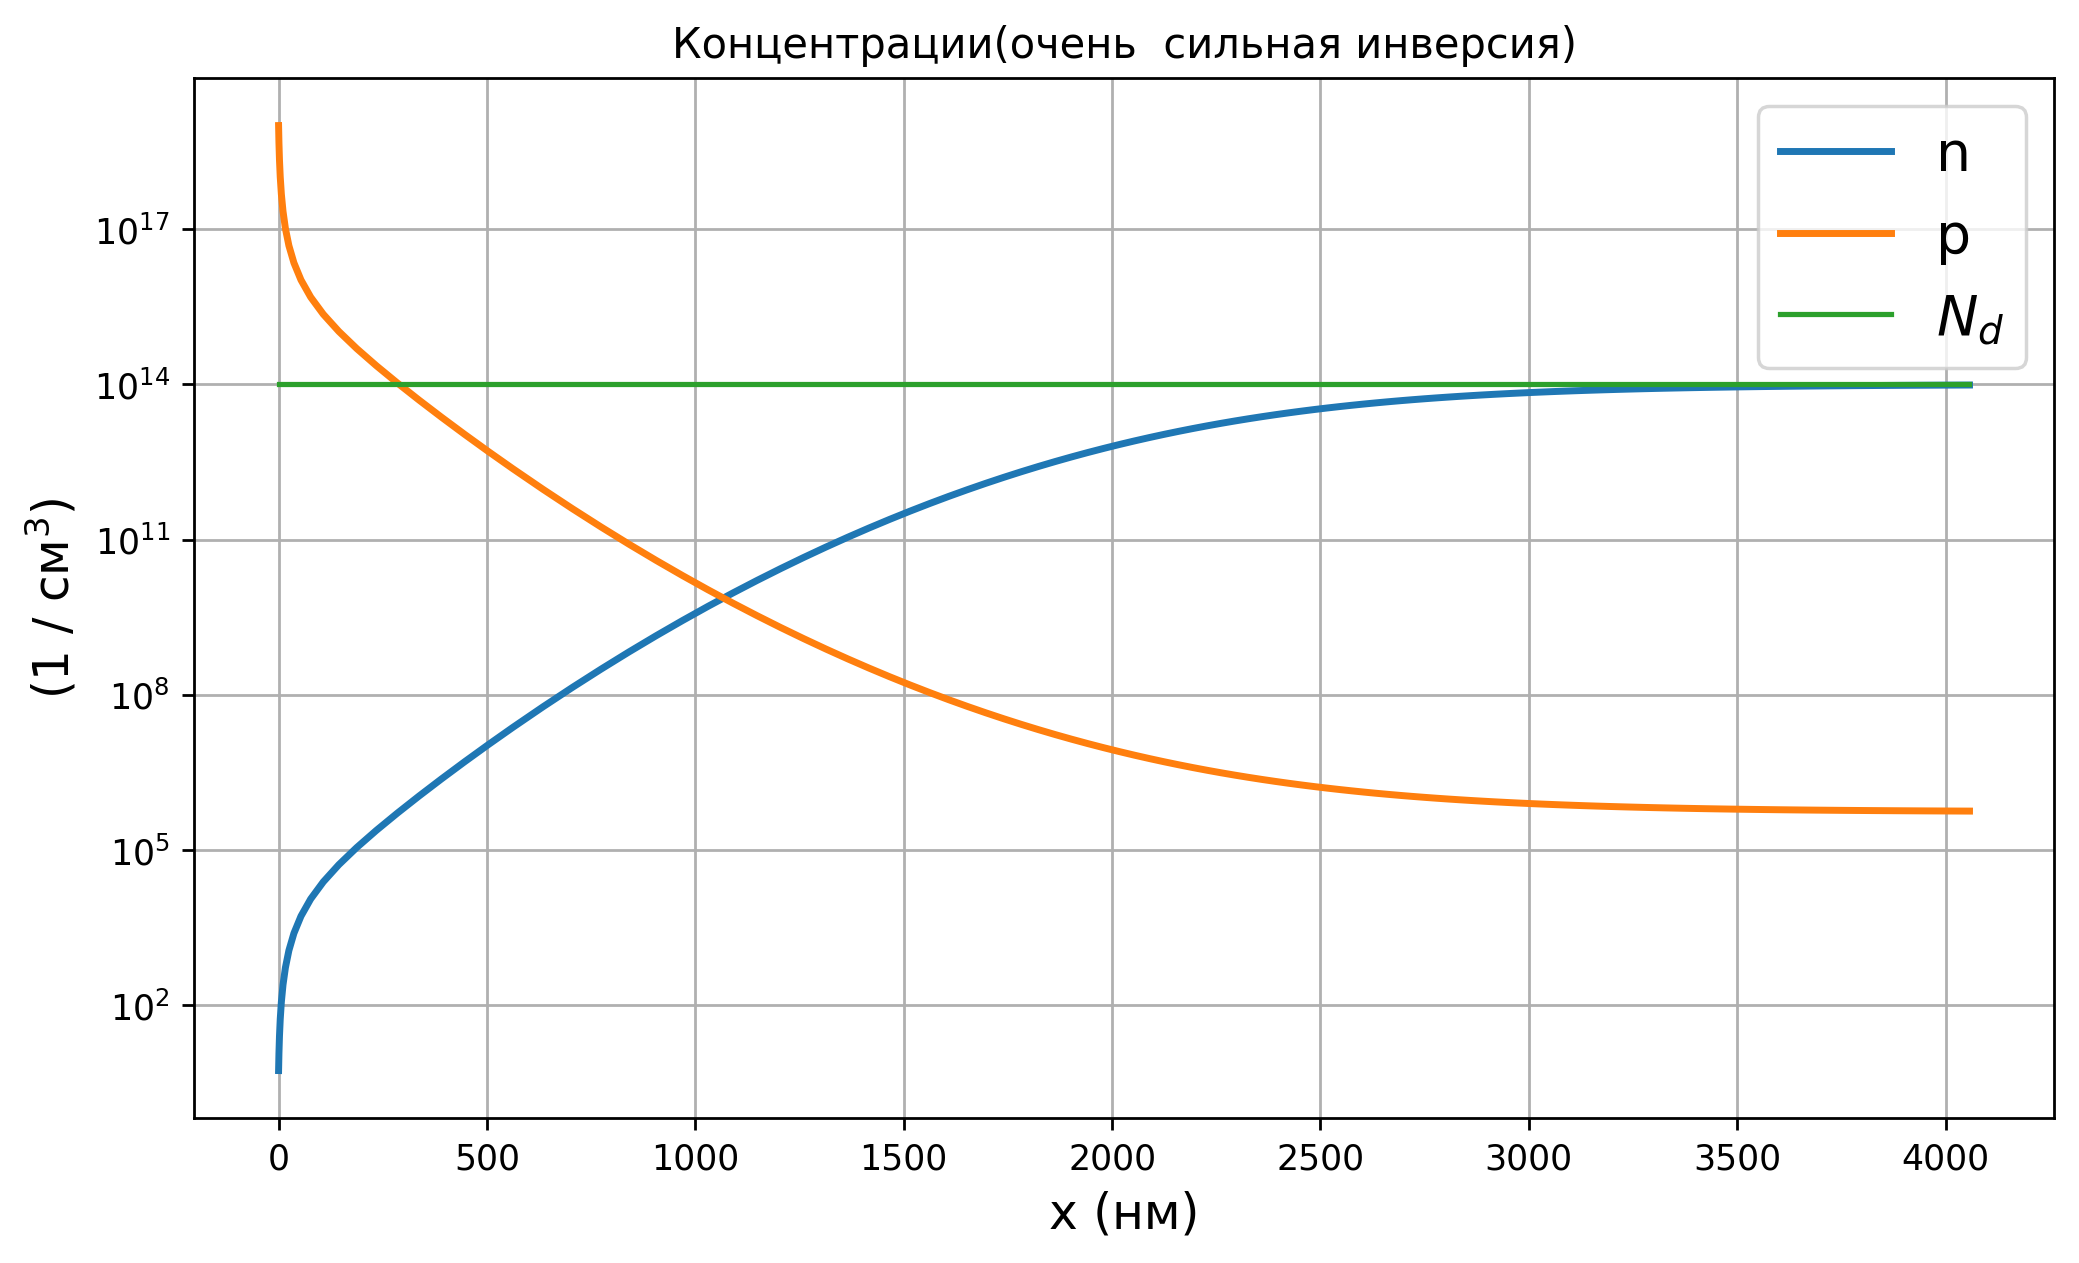

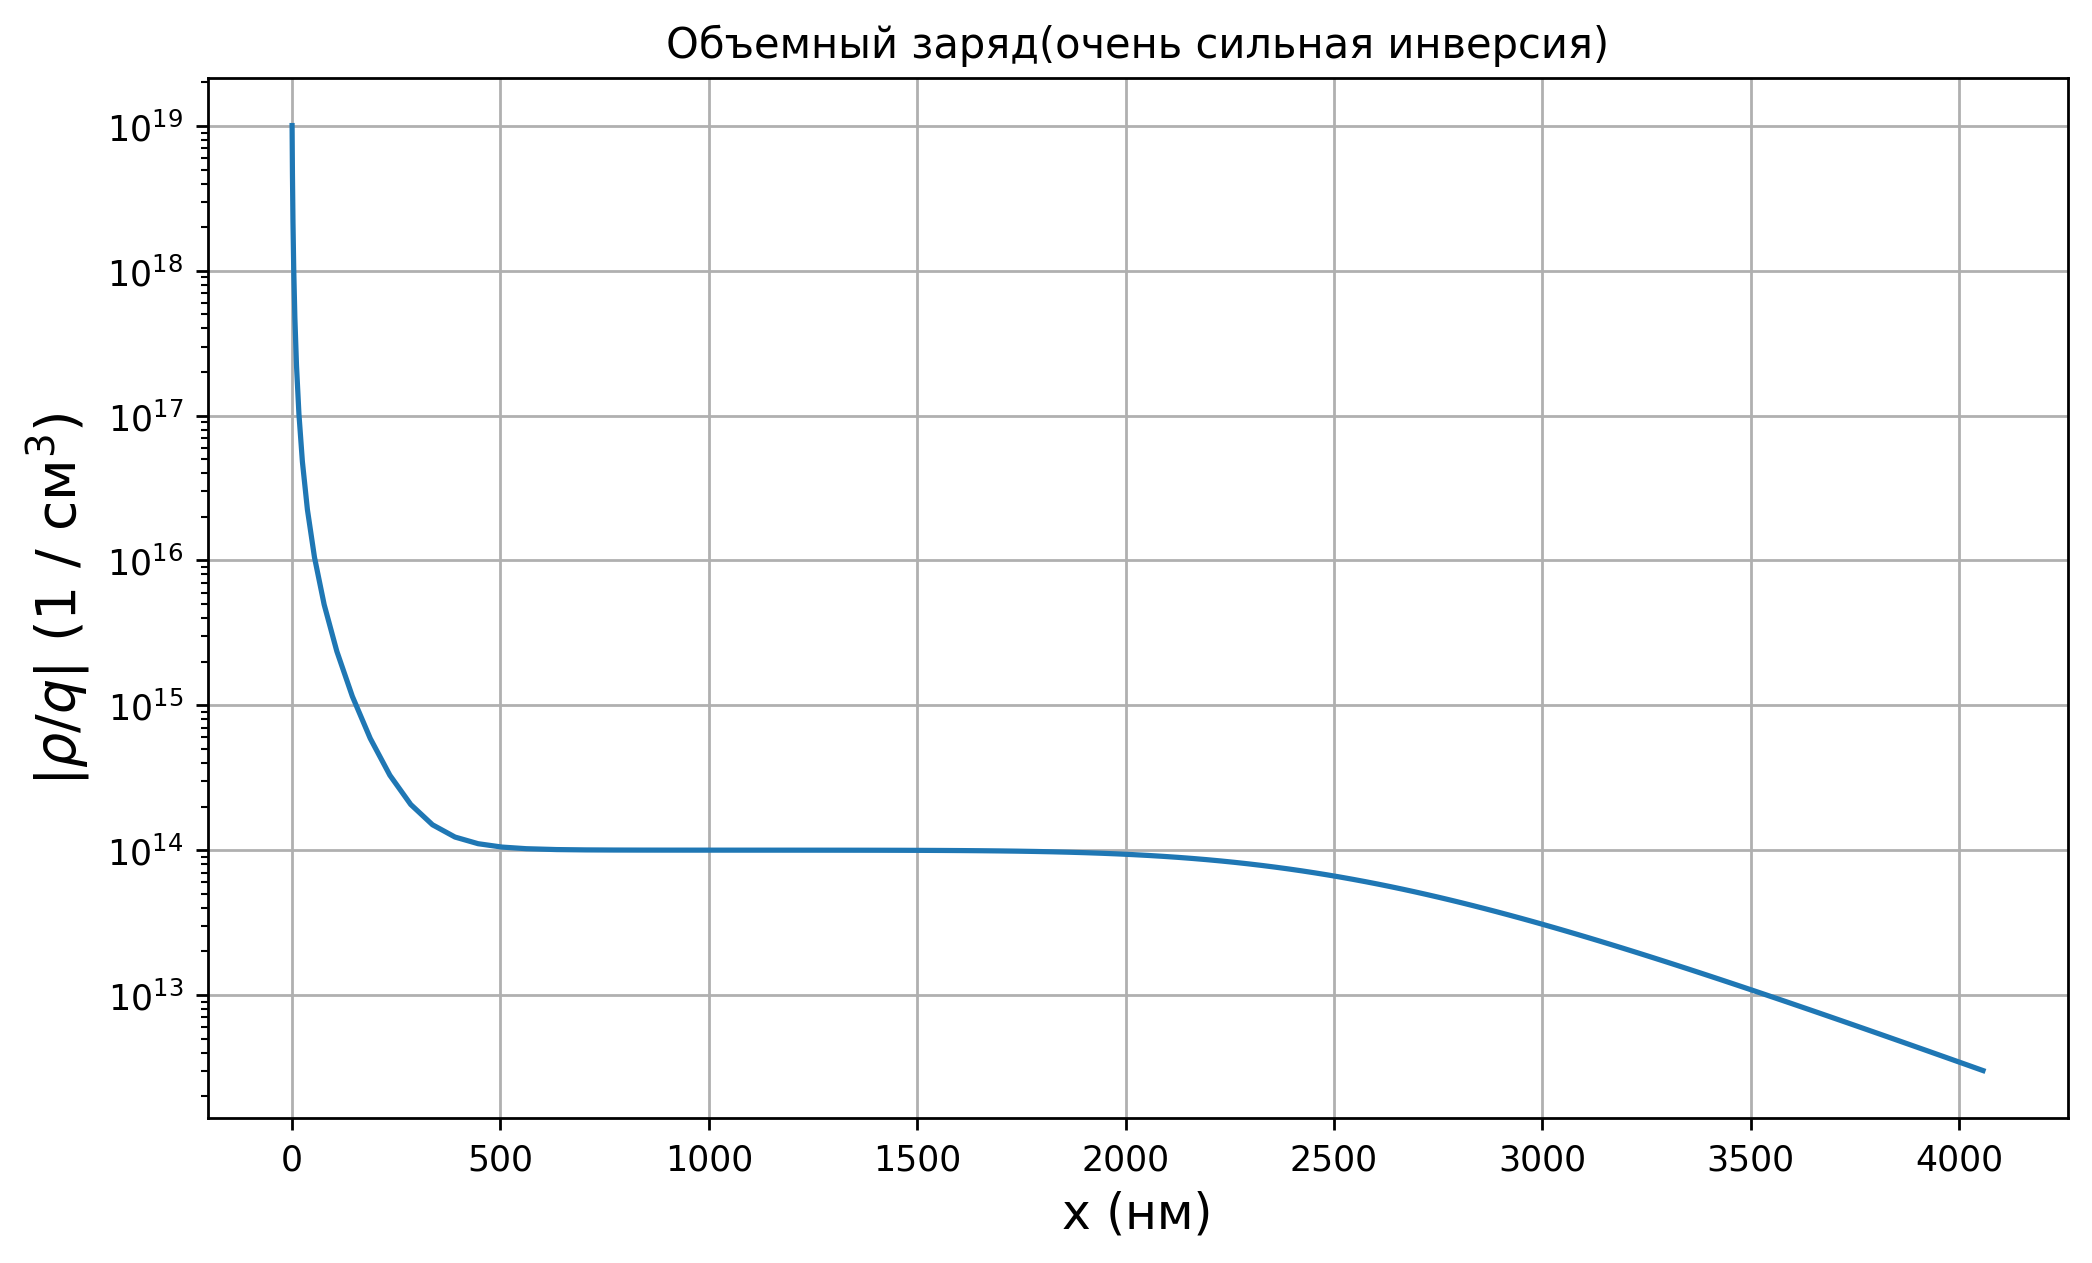

In [23]:
psis = Ev_mas[499] - F_mas[499]                                           #очень сильная инверсия

# график для зонной диаграммы 
fig, ax = plt.subplots() 
plt.figure(1)
ax.set_title('Зонная диаграмма(очень сильная инверсия)')
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('Энергия , эВ', fontsize=14)
plt.grid(True)

# get psiox from the potential balance equation (see SPE derivation)
Vgb=SPE(psis,0)
psiox = Vgb - psis - Vfb

y, psi = compute_y_vs_psi(psis)
y = y / 100 * 1e9
toxnm = tox / 100 * 1e9

# зонная диаграмма п\п
plt.plot(y, Ev_mas[499] - psi, 'b')
plt.plot(y, Ei_mas[499] - psi, 'g--')
plt.plot(y, Ec_mas[499] - psi, 'orange')

# уровень ферми
plt.plot(y, 0 * y + F_mas[499], 'k')

#диаграмма оксида
plt.plot([0, 0], [Ev_mas[499] - psis - VBO, Ec_mas[499] - psis + CBO], 'r')
plt.plot([-toxnm, -toxnm],[Ev_mas[499] - psis - VBO - psiox, Ec_mas[499] - psis + CBO - psiox],  'r')
plt.plot([-toxnm, 0], [Ev_mas[499] - psis - VBO - psiox, Ev_mas[499] - psis - VBO], 'r')
plt.plot([-toxnm, 0], [Ec_mas[499] - psis + CBO - psiox, Ec_mas[499] - psis + CBO], 'r')

# уровень ферми метала
plt.plot(
    [-toxnm - 15, -toxnm], 
    [F_mas[499] - Vfb - psis - psiox, F_mas[499] - Vfb - psis - psiox],
    'k'
)
# концентрации
n = n_mas[499] * np.exp(psi / 0.026)
p = p_mas[499] * np.exp(-psi / 0.026)
rho_by_q = p - n + Nd - Na

fig, ax = plt.subplots() 
plt.figure(2)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('(1 / см$^3$)', fontsize=14)
plt.grid(True)
ax.set_title('Концентрации(очень  сильная инверсия)')
plt.semilogy(y, n, label='n', linewidth=2)
plt.semilogy(y, p, label='p', linewidth=2)
plt.semilogy(y, Nd + 0 * y, label='$N_d$')
plt.legend(loc='best', prop={'size': 16})
#обемный заряд
fig, ax = plt.subplots() 
ax.set_title('Объемный заряд(очень сильная инверсия)')
plt.figure(3)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('$|\\rho/q|$ (1 / см$^3$)', fontsize=16)
plt.grid(True)
tmp = plt.semilogy(y, np.abs(rho_by_q), label='$\\rho/q$')

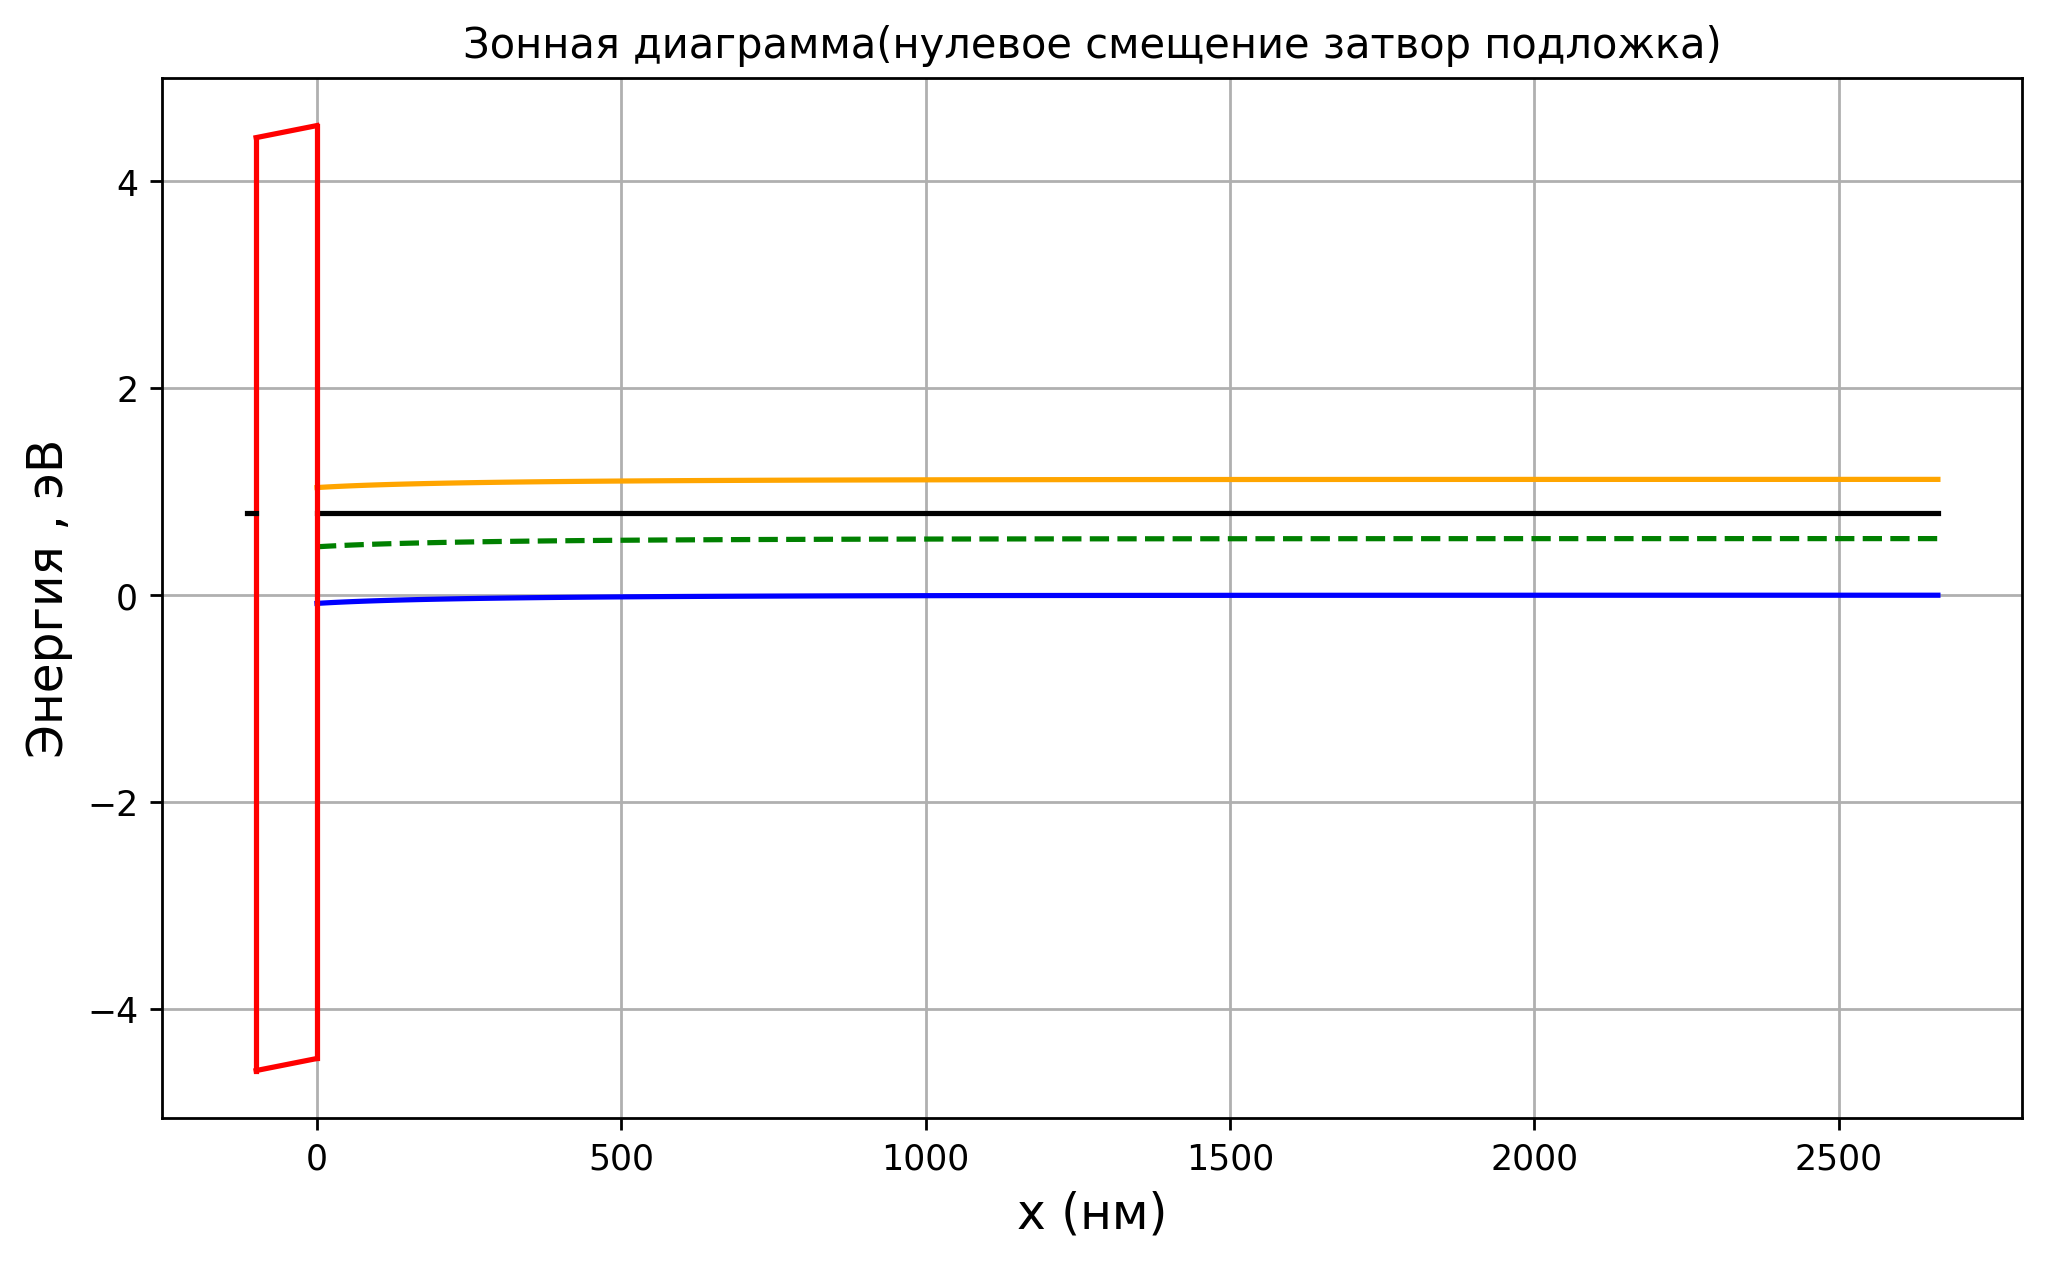

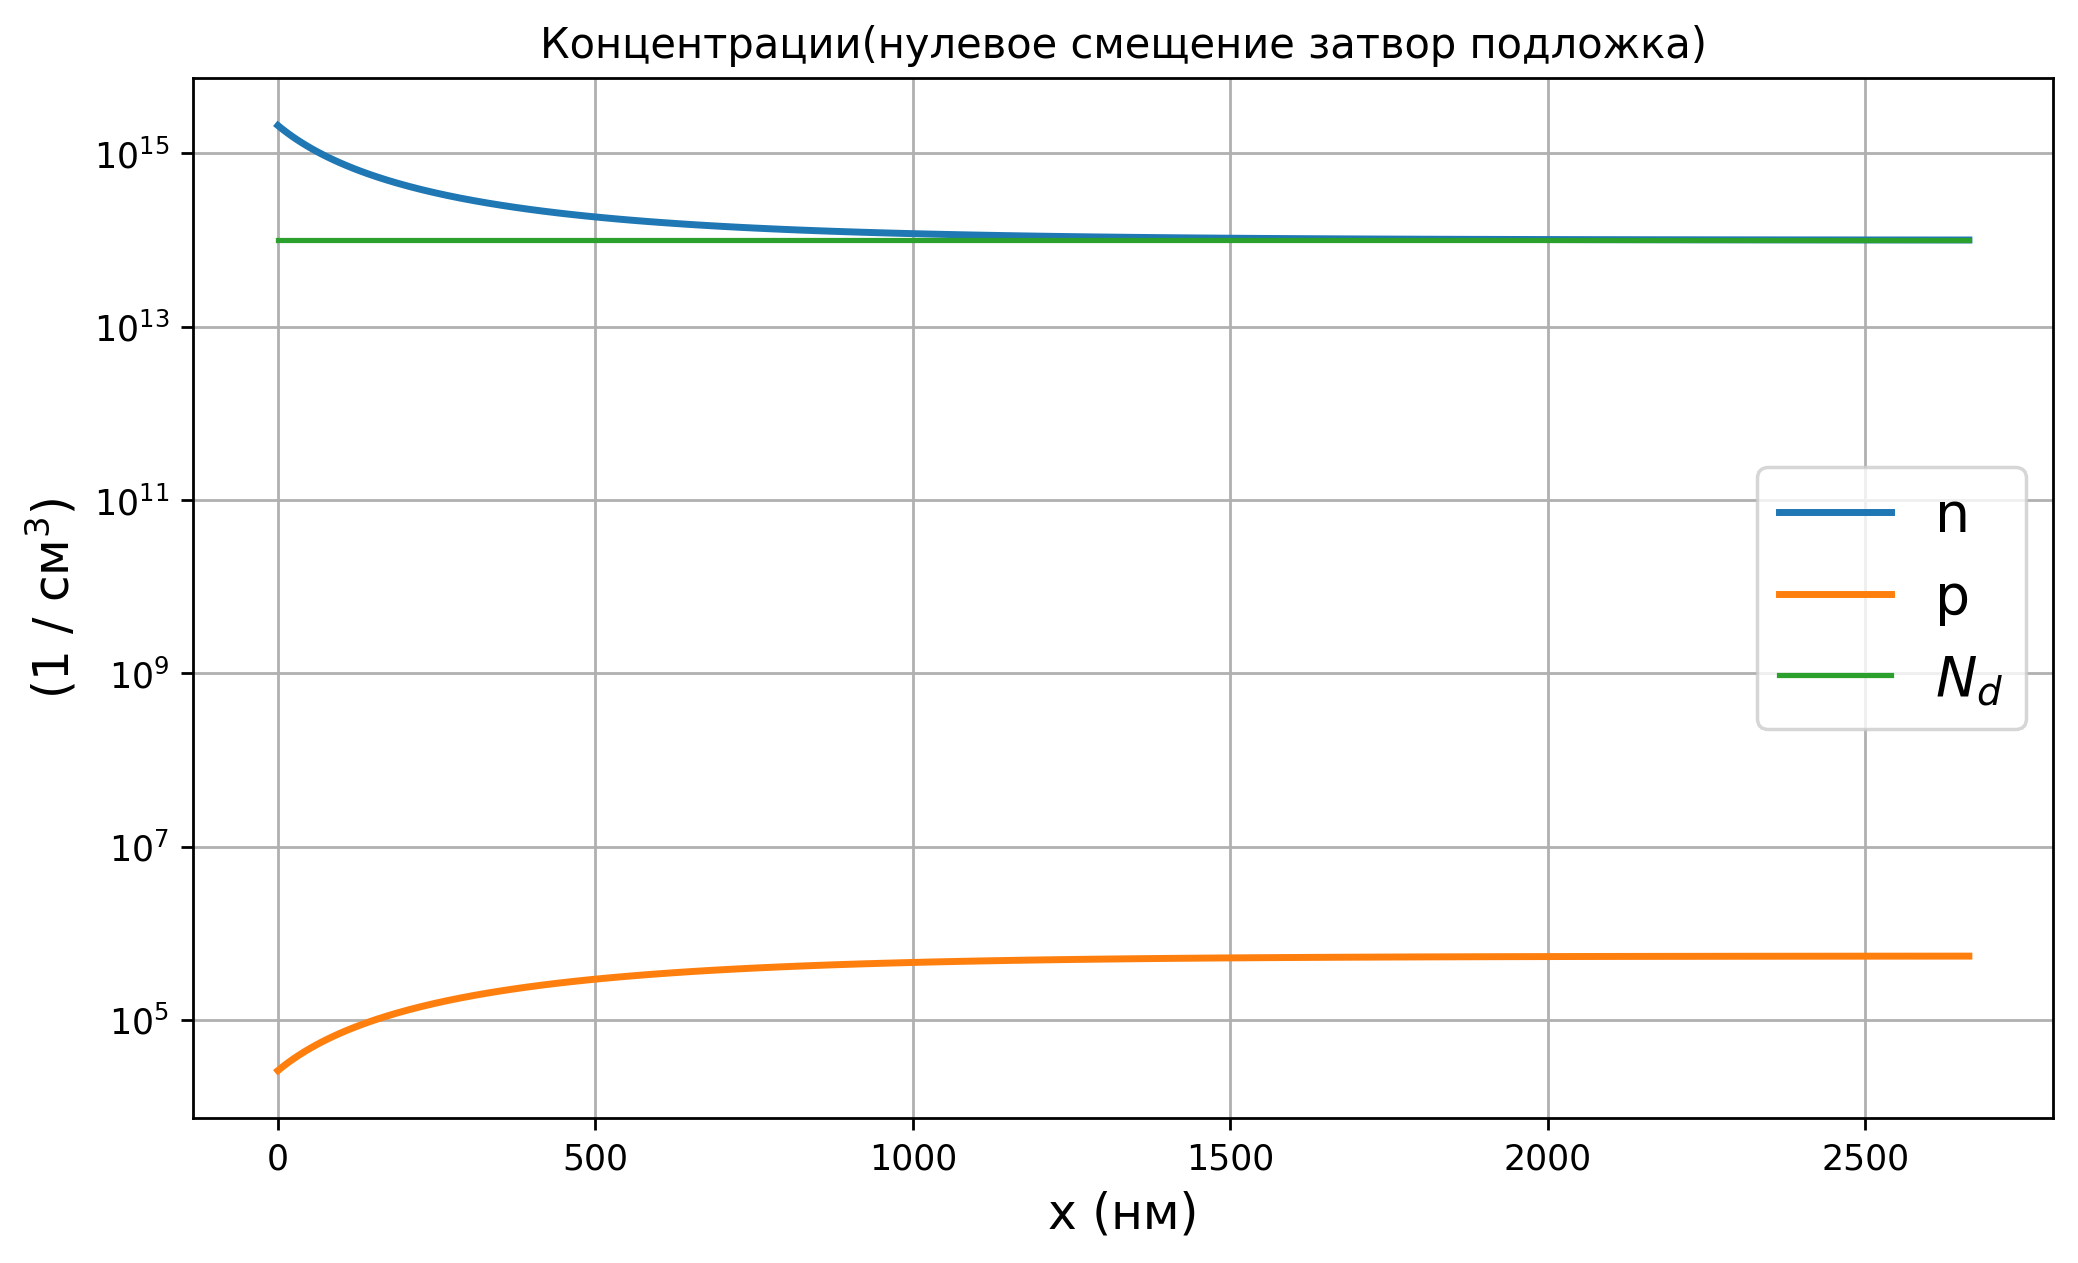

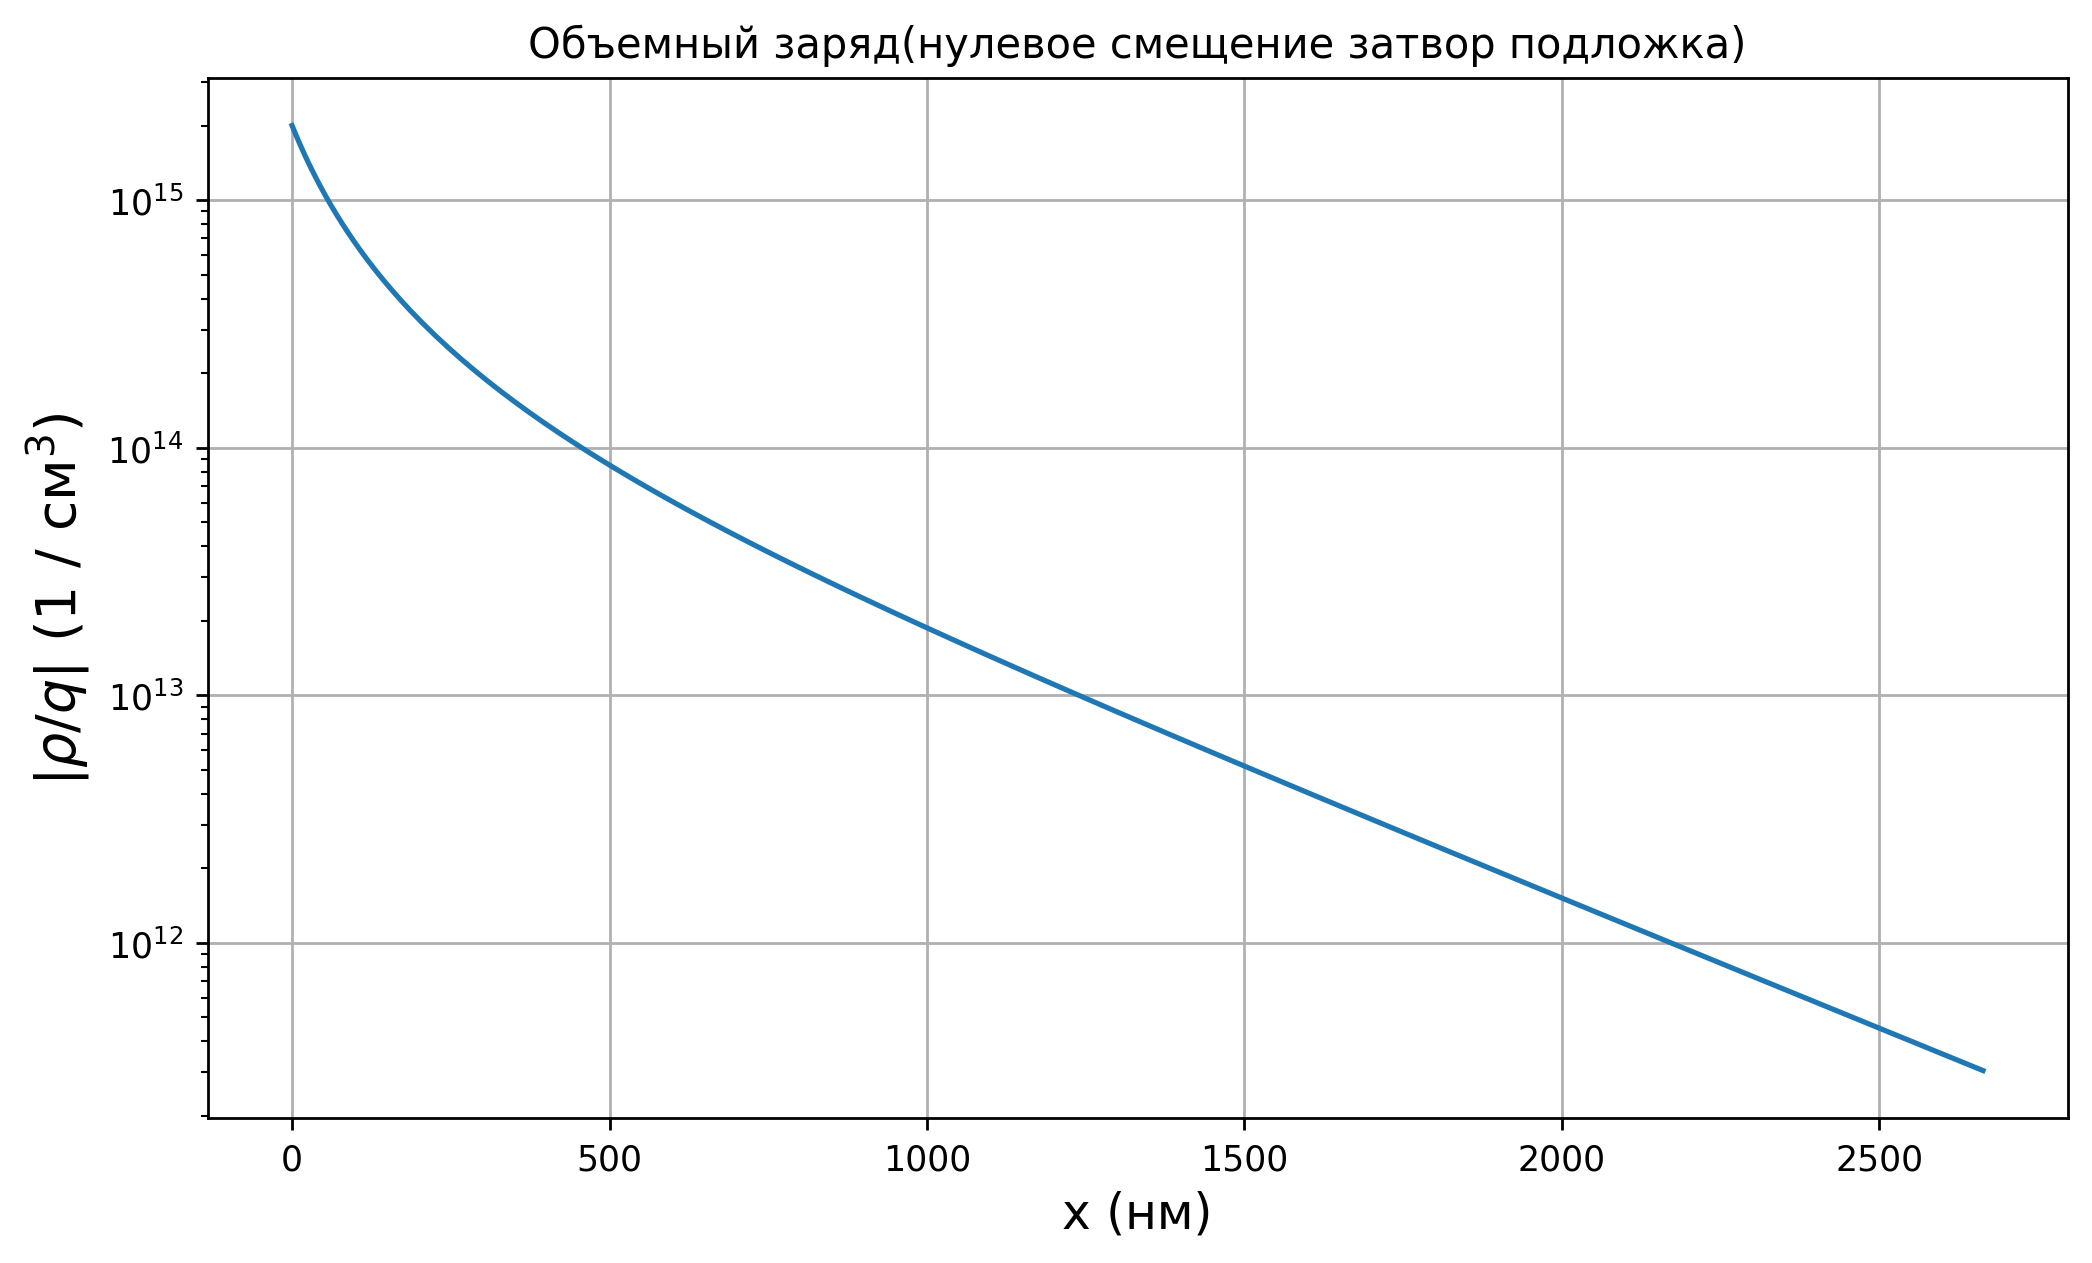

In [24]:

psis = bisect(SPE, Ev_mas[499] - F_mas[499], Ec_mas[499] - F_mas[499],0)  #нулевое смещение затвор подложка


# график для зонной диаграммы 
fig, ax = plt.subplots() 
plt.figure(1)
ax.set_title('Зонная диаграмма(нулевое смещение затвор подложка)')
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('Энергия , эВ', fontsize=14)
plt.grid(True)

# get psiox from the potential balance equation (see SPE derivation)
Vgb=SPE(psis,0)
psiox = Vgb - psis - Vfb

y, psi = compute_y_vs_psi(psis)
y = y / 100 * 1e9
toxnm = tox / 100 * 1e9

# зонная диаграмма п\п
plt.plot(y, Ev_mas[499] - psi, 'b')
plt.plot(y, Ei_mas[499] - psi, 'g--')
plt.plot(y, Ec_mas[499] - psi, 'orange')

# уровень ферми
plt.plot(y, 0 * y + F_mas[499], 'k')

#диаграмма оксида
plt.plot([0, 0], [Ev_mas[499] - psis - VBO, Ec_mas[499] - psis + CBO], 'r')
plt.plot([-toxnm, -toxnm],[Ev_mas[499] - psis - VBO - psiox, Ec_mas[499] - psis + CBO - psiox],  'r')
plt.plot([-toxnm, 0], [Ev_mas[499] - psis - VBO - psiox, Ev_mas[499] - psis - VBO], 'r')
plt.plot([-toxnm, 0], [Ec_mas[499] - psis + CBO - psiox, Ec_mas[499] - psis + CBO], 'r')

# уровень ферми метала
plt.plot(
    [-toxnm - 15, -toxnm], 
    [F_mas[499] - Vfb - psis - psiox, F_mas[499] - Vfb - psis - psiox],
    'k'
)
# концентрации
n = n_mas[499] * np.exp(psi / 0.026)
p = p_mas[499] * np.exp(-psi / 0.026)
rho_by_q = p - n + Nd - Na

fig, ax = plt.subplots() 
plt.figure(2)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('(1 / см$^3$)', fontsize=14)
plt.grid(True)
ax.set_title('Концентрации(нулевое смещение затвор подложка)')
plt.semilogy(y, n, label='n', linewidth=2)
plt.semilogy(y, p, label='p', linewidth=2)
plt.semilogy(y, Nd + 0 * y, label='$N_d$')
plt.legend(loc='best', prop={'size': 16})
#обемный заряд
fig, ax = plt.subplots() 
ax.set_title('Объемный заряд(нулевое смещение затвор подложка)')
plt.figure(3)
plt.xlabel('x (нм)', fontsize=14)
plt.ylabel('$|\\rho/q|$ (1 / см$^3$)', fontsize=16)
plt.grid(True)
tmp = plt.semilogy(y, np.abs(rho_by_q), label='$\\rho/q$')